# STEP 1: Import The Following Relevant Scientific and Computational Libraries for Data Manipulation, Modelling, Interpretation, Visualization ETC

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, Flatten, multiply, Concatenate, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# STEP 2: Data Preparation and Preprocessing

# Preamble

Prior to synthetic data generation, data preprocessing steps were meticulously applied to each dataset, ensuring data cleanliness, normalization, and partitioning into the said two main component data. The original dataset, comprising 80% of the total data, served as the foundation for generating synthetic data. In contrast, the remaining 20%, referred to as control data, was reserved for evaluating both the privacy risks associated with the synthetic dataset and the utility as well.

# Ensuring Privacy Preservation and Data Utility
1. Privacy Preservation: By using an autoencoder to generate synthetic data, we minimize the risk of exposing original data entries. The classifier's role is solely to provide labels for synthetic instances, further abstracting the process from direct data duplication.

2. Data Utility: The utility of the synthetic data is maintained through the autoencoder's ability to capture and replicate the complex relationships in the original data. The trained classifier ensures that synthetic data receives labels that are consistent with the learned patterns, making the synthetic dataset useful for downstream tasks.


# Purpose of the Control Dataset
1. Benchmarking Privacy Leakage: The control dataset (control_data_df) is used to differentiate what an attacker learns purely from the synthetic dataset's utility versus what constitutes an actual privacy leak. By comparing the success of attacks on the control dataset against those on the original dataset, one can more accurately assess the extent of privacy risk.

2. Ensuring Fair Evaluation: It ensures that the assessment accounts for the possibility that the synthetic dataset might inadvertently reveal specific patterns or information that could lead to re-identification or information inference not due to the inherent utility of the synthetic data but due to direct data leakage.

# Creating a Control Dataset
The control dataset should consist of records that are not included in the synthetic dataset's generation process. Here's how to create or obtain a control dataset:

1. Splitting Original Data: Before generating your synthetic dataset, split your original dataset into two parts. One part is used to generate the synthetic dataset (original_data_df), and the other part serves as the control dataset (control_data_df). This way, the control dataset contains real data points that were not used to train the model creating the synthetic data, ensuring they share similar distributions without direct overlaps.



# Anonymeter Tool
Anonymeter’s development as an open-source tool underlines Anonos’s commitment to enhancing privacy technologies’ accessibility. It is crafted to be adaptable, ensuring it remains relevant amid evolving privacy regulations and research advancements. The Anonymeter framework plays a pivotal role in the field of synthetic data by providing a structured approach to evaluate and mitigate privacy risks. By assessing singling-out, linkability, and inference risks, Anonymeter helps researchers and practitioners balance the trade-offs between maintaining data utility and ensuring privacy. This is particularly relevant in the era of big data and machine learning, where the use of synthetic data is becoming increasingly prevalent. For more information on this tool, including its installation and configurations, do visit their website and github via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [2]:
# Load the Obesity dataset
obesity_df = pd.read_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\obesity.csv')
obesity_df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6

# Partioning the Original Data () into 80% and 20% respectiively as shown below

In [3]:
obesity_train_dataframe, control_dataframe = train_test_split(obesity_df, test_size=0.2, random_state=42)
# obesity_train_dataframe is 80% while control_dataframe is 20%

In [4]:
obesity_train_dataframe.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
162        0  21.000000  1.630000   60.000000                               1   
2001       0  20.924956  1.752531  133.618706                               1   
1435       0  22.899740  1.661715   82.595793                               1   
649        0  21.837996  1.588046   44.236067                               0   
1280       1  25.994746  1.811602  106.042142                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
162      1  3.000000  3.000000     0      1  2.000000    0  2.000000   
2001     1  3.000000  3.000000     2      0  2.887659    0  1.480919   
1435     1  1.203754  1.355354     2      0  2.765593    0  0.128342   
649      0  3.000000  1.696080     1      0  2.550307    0  1.098862   
1280     1  3.000000  3.000000     2      0  2.858171    0  1.813318   

           TUE  CALC  MTRANS  NObeyesdad  
162   0.000000     2       3           1  
2001  0.779641     2       3           4  
1435  1.659476     2       3           2  
649   0.000000     3       3           0  
1280  0.680215     2       3           2

In [5]:
obesity_train_dataframe.tail()

Gender        Age    Height      Weight  family_history_with_overweight  \
1638       1  32.290160  1.754956  120.098812                               1   
1095       1  23.000000  1.718981   81.669950                               1   
1130       0  22.989846  1.650000   80.000000                               1   
1294       0  23.000000  1.628168   84.497980                               1   
860        1  20.000000  1.817480   85.000000                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
1638     1  2.967300  3.000000     2      0  2.530035    0  0.955317   
1095     1  2.000000  1.729553     2      0  1.400247    0  0.887923   
1130     1  2.000000  3.000000     2      0  2.000000    0  0.146919   
1294     1  2.058687  2.962004     2      0  2.010596    0  0.851059   
860      1  2.951180  3.000000     2      0  3.000000    0  2.433918   

           TUE  CALC  MTRANS  NObeyesdad  
1638  1.339232     2       0           3  
1095  1.011983     2       3           6  
1130  2.000000     3       3           6  
1294  0.630866     3       3           2  
860   0.561602     2       3           5

In [6]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = obesity_train_dataframe['NObeyesdad'].value_counts()
total_counts = len(obesity_train_dataframe)
print(total_counts) 

1688


# SAVING THE PARTITIONED DATASETS TO CSV FOR FUTURE USE

In [ ]:
control_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\control_dataframe.csv', index=False)

In [ ]:
obesity_train_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\obesity_train_dataframe.csv', index=False)


In [7]:
obesity_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 162 to 860
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1688 non-null   int64  
 1   Age                             1688 non-null   float64
 2   Height                          1688 non-null   float64
 3   Weight                          1688 non-null   float64
 4   family_history_with_overweight  1688 non-null   int64  
 5   FAVC                            1688 non-null   int64  
 6   FCVC                            1688 non-null   float64
 7   NCP                             1688 non-null   float64
 8   CAEC                            1688 non-null   int64  
 9   SMOKE                           1688 non-null   int64  
 10  CH2O                            1688 non-null   float64
 11  SCC                             1688 non-null   int64  
 12  FAF                             1

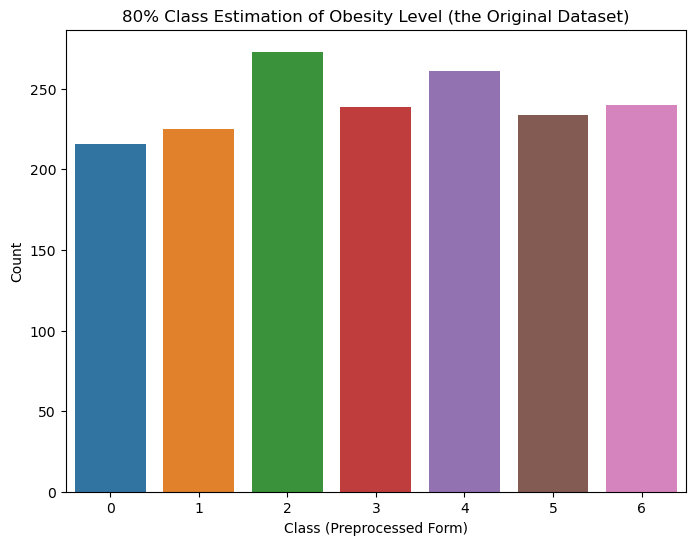

In [8]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = obesity_train_dataframe['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Class Estimation of Obesity Level (the Original Dataset)')
plt.show()

# STEP 3: DEFINING AND TRAINING VARIATIONAL AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

In [53]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier

# Separate features and target
features2 = obesity_train_dataframe.drop('NObeyesdad', axis=1)
labels2 = obesity_train_dataframe['NObeyesdad']

# Split the balanced dataset into training and testing sets
X_train_real_new, X_test_real_new, y_train_real_new, y_test_real_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# We Normalize features 
scaler = MinMaxScaler()
X_train_real_scaled = scaler.fit_transform(X_train_real_new)
X_test_real_scaled = scaler.transform(X_test_real_new)

# Assuming features and labels have been prepared and scaled
input_dim = X_train_real_scaled.shape[1]
num_classes = len(np.unique(y_train_real_new))

latent_dim = 16  # Latent space dimension

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder network
inputs = Input(shape=(input_dim, ))
labels_input = Input(shape=(1,), dtype='int32')
labels_embedding = Flatten()(Embedding(num_classes, input_dim)(labels_input))
inputs_cond = Concatenate(axis=-1)([inputs, labels_embedding])
x = Dense(64, activation='relu')(inputs_cond)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
latent_inputs = Input(shape=(latent_dim,))
labels_embedding_dec = Flatten()(Embedding(num_classes, latent_dim)(labels_input))
latent_cond = Concatenate(axis=-1)([latent_inputs, labels_embedding_dec])
x_decoded = Dense(64, activation='relu')(latent_cond)
outputs = Dense(input_dim, activation='sigmoid')(x_decoded)

# Instantiate encoder and decoder models
encoder = Model([inputs, labels_input], [z_mean, z_log_var, z], name='encoder')
decoder = Model([latent_inputs, labels_input], outputs, name='decoder')

# VAE model
outputs_vae = decoder([encoder([inputs, labels_input])[2], labels_input])
vae_obesity = Model([inputs, labels_input], outputs_vae, name='vae_obesity')

# Define VAE loss
reconstruction_loss = K.sum(K.binary_crossentropy(inputs, outputs_vae), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_obesity.add_loss(vae_loss)
vae_obesity.compile(optimizer='adam')

# Training the VAE 
vae_obesity.fit([X_train_real_scaled, y_train_real_new], features2, epochs=1500, batch_size=32, validation_split=0.2)

# Generating synthetic data
def generate_synthetic_data(num_samples, num_classes):
    latent_samples = np.random.normal(size=(num_samples, latent_dim))
    sampled_labels_new = np.random.randint(0, num_classes, num_samples)
    synthetic_data_new = vae_obesity.predict([latent_samples, sampled_labels_new])
    return synthetic_data_new, sampled_labels_new

synthetic_data_new, synthetic_labels_new = generate_synthetic_data(1688, num_classes)

# Transform synthetic data back to original space (if features were scaled)
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data_new)

# Convert to DataFrame and Series for ease of use
vae_synthetic_data_df = pd.DataFrame(synthetic_data_rescaled, columns=features2.columns)
vae_synthetic_labels_series = pd.Series(synthetic_labels_new, name='NObeyesdad')

print(vae_synthetic_data_df.head())
print(vae_synthetic_labels_series.head())

Epoch 1/1500
34/34 [==============================] - 1s 10ms/step - loss: 10.6685 - val_loss: 9.9766
Epoch 2/1500
34/34 [==============================] - 0s 3ms/step - loss: 9.6624 - val_loss: 9.4504
Epoch 3/1500
34/34 [==============================] - 0s 4ms/step - loss: 9.2633 - val_loss: 9.1115
Epoch 4/1500
34/34 [==============================] - 0s 5ms/step - loss: 9.0479 - val_loss: 8.9202
Epoch 5/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.8870 - val_loss: 8.7836
Epoch 6/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.7445 - val_loss: 8.6635
Epoch 7/1500
34/34 [==============================] - 0s 5ms/step - loss: 8.5968 - val_loss: 8.5516
Epoch 8/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.5077 - val_loss: 8.4609
Epoch 9/1500
34/34 [==============================] - 0s 5ms/step - loss: 8.4222 - val_loss: 8.3820
Epoch 10/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.3625 - val_loss: 8.35

34/34 [==============================] - 0s 3ms/step - loss: 8.1418 - val_loss: 8.1173
Epoch 83/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1555 - val_loss: 8.1289
Epoch 84/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1551 - val_loss: 8.1054
Epoch 85/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1256 - val_loss: 8.0984
Epoch 86/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.1557 - val_loss: 8.0974
Epoch 87/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.1180 - val_loss: 8.1428
Epoch 88/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1653 - val_loss: 8.1030
Epoch 89/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.1384 - val_loss: 8.1540
Epoch 90/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.1394 - val_loss: 8.1259
Epoch 91/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1464 - val_loss: 8.1607
Epoc

34/34 [==============================] - 0s 4ms/step - loss: 8.1330 - val_loss: 8.0454
Epoch 163/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1239 - val_loss: 8.1227
Epoch 164/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1244 - val_loss: 8.1054
Epoch 165/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1280 - val_loss: 8.1137
Epoch 166/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1402 - val_loss: 8.0920
Epoch 167/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.1308 - val_loss: 8.0607
Epoch 168/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1349 - val_loss: 8.1109
Epoch 169/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.1385 - val_loss: 8.1213
Epoch 170/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1058 - val_loss: 8.0807
Epoch 171/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1088 - val_loss: 8.

34/34 [==============================] - 0s 3ms/step - loss: 8.0688 - val_loss: 8.0588
Epoch 243/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0979 - val_loss: 8.1532
Epoch 244/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0733 - val_loss: 8.0246
Epoch 245/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0431 - val_loss: 8.0369
Epoch 246/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0821 - val_loss: 8.0238
Epoch 247/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0589 - val_loss: 8.1089
Epoch 248/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.1022 - val_loss: 8.0279
Epoch 249/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0818 - val_loss: 8.0626
Epoch 250/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0836 - val_loss: 8.0600
Epoch 251/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0973 - val_loss: 8.

34/34 [==============================] - 0s 3ms/step - loss: 8.0673 - val_loss: 8.0436
Epoch 323/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0500 - val_loss: 8.0245
Epoch 324/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0906 - val_loss: 8.0852
Epoch 325/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0496 - val_loss: 8.0706
Epoch 326/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0627 - val_loss: 8.0428
Epoch 327/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0111 - val_loss: 8.0278
Epoch 328/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0777 - val_loss: 7.9840
Epoch 329/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0710 - val_loss: 8.0938
Epoch 330/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0627 - val_loss: 8.1422
Epoch 331/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0359 - val_loss: 8.

34/34 [==============================] - 0s 3ms/step - loss: 8.0622 - val_loss: 8.0941
Epoch 403/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0165 - val_loss: 8.0231
Epoch 404/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0836 - val_loss: 8.0257
Epoch 405/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0560 - val_loss: 8.0636
Epoch 406/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0301 - val_loss: 8.1114
Epoch 407/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0909 - val_loss: 8.0511
Epoch 408/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0419 - val_loss: 7.9816
Epoch 409/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0469 - val_loss: 8.0616
Epoch 410/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0711 - val_loss: 8.0038
Epoch 411/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0158 - val_loss: 8.

34/34 [==============================] - 0s 4ms/step - loss: 8.0332 - val_loss: 7.9988
Epoch 483/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0389 - val_loss: 8.0300
Epoch 484/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0403 - val_loss: 8.0327
Epoch 485/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0562 - val_loss: 8.1040
Epoch 486/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0401 - val_loss: 8.0799
Epoch 487/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0524 - val_loss: 8.0451
Epoch 488/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0487 - val_loss: 8.0432
Epoch 489/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0332 - val_loss: 8.0333
Epoch 490/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0449 - val_loss: 8.1258
Epoch 491/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0862 - val_loss: 7.

34/34 [==============================] - 0s 4ms/step - loss: 8.0680 - val_loss: 8.1005
Epoch 563/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0356 - val_loss: 8.0067
Epoch 564/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0520 - val_loss: 8.0107
Epoch 565/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0146 - val_loss: 8.1952
Epoch 566/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0583 - val_loss: 8.0774
Epoch 567/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0608 - val_loss: 8.0136
Epoch 568/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0493 - val_loss: 8.1068
Epoch 569/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0256 - val_loss: 8.1885
Epoch 570/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0219 - val_loss: 8.0323
Epoch 571/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9955 - val_loss: 8.

34/34 [==============================] - 0s 4ms/step - loss: 7.9980 - val_loss: 8.0614
Epoch 643/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0303 - val_loss: 7.9801
Epoch 644/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0614 - val_loss: 8.0857
Epoch 645/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0231 - val_loss: 8.1438
Epoch 646/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0268 - val_loss: 8.0362
Epoch 647/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0287 - val_loss: 8.0563
Epoch 648/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0597 - val_loss: 8.1025
Epoch 649/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0564 - val_loss: 8.0631
Epoch 650/1500
34/34 [==============================] - 0s 5ms/step - loss: 8.0160 - val_loss: 7.9602
Epoch 651/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0009 - val_loss: 8.

34/34 [==============================] - 0s 4ms/step - loss: 7.9978 - val_loss: 8.0217
Epoch 723/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0531 - val_loss: 8.0038
Epoch 724/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0289 - val_loss: 8.0122
Epoch 725/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0200 - val_loss: 8.0499
Epoch 726/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0414 - val_loss: 8.0425
Epoch 727/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0363 - val_loss: 8.0434
Epoch 728/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0497 - val_loss: 8.1347
Epoch 729/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0340 - val_loss: 7.9944
Epoch 730/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0144 - val_loss: 8.0676
Epoch 731/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0340 - val_loss: 8.

34/34 [==============================] - 0s 4ms/step - loss: 8.0211 - val_loss: 8.0069
Epoch 803/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0522 - val_loss: 7.9615
Epoch 804/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9933 - val_loss: 7.9829
Epoch 805/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0411 - val_loss: 8.0445
Epoch 806/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0213 - val_loss: 8.0721
Epoch 807/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0218 - val_loss: 8.0485
Epoch 808/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0063 - val_loss: 8.0869
Epoch 809/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9984 - val_loss: 8.0595
Epoch 810/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0349 - val_loss: 8.0130
Epoch 811/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9849 - val_loss: 8.

34/34 [==============================] - 0s 3ms/step - loss: 8.0333 - val_loss: 8.0324
Epoch 883/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0414 - val_loss: 7.9894
Epoch 884/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0336 - val_loss: 7.9800
Epoch 885/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0238 - val_loss: 8.0117
Epoch 886/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0232 - val_loss: 8.0694
Epoch 887/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9776 - val_loss: 8.0676
Epoch 888/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0403 - val_loss: 8.0224
Epoch 889/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9996 - val_loss: 8.0891
Epoch 890/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0348 - val_loss: 8.0642
Epoch 891/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0066 - val_loss: 8.

34/34 [==============================] - 0s 4ms/step - loss: 8.0061 - val_loss: 8.0433
Epoch 963/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0073 - val_loss: 8.0568
Epoch 964/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0533 - val_loss: 7.9867
Epoch 965/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0249 - val_loss: 8.0462
Epoch 966/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0420 - val_loss: 8.0859
Epoch 967/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9936 - val_loss: 8.0640
Epoch 968/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0348 - val_loss: 8.0018
Epoch 969/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0414 - val_loss: 8.0667
Epoch 970/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0023 - val_loss: 8.0290
Epoch 971/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0148 - val_loss: 8.

34/34 [==============================] - 0s 4ms/step - loss: 8.0208 - val_loss: 8.0109
Epoch 1043/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9923 - val_loss: 8.0421
Epoch 1044/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0091 - val_loss: 8.0335
Epoch 1045/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0368 - val_loss: 8.0136
Epoch 1046/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0351 - val_loss: 8.0609
Epoch 1047/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9884 - val_loss: 8.0273
Epoch 1048/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9936 - val_loss: 8.0420
Epoch 1049/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0331 - val_loss: 8.1360
Epoch 1050/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0526 - val_loss: 8.0423
Epoch 1051/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0073 - val

34/34 [==============================] - 0s 4ms/step - loss: 8.0161 - val_loss: 8.0676
Epoch 1122/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0218 - val_loss: 8.1507
Epoch 1123/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0380 - val_loss: 8.0324
Epoch 1124/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9904 - val_loss: 8.0379
Epoch 1125/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0227 - val_loss: 8.0181
Epoch 1126/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0096 - val_loss: 8.0596
Epoch 1127/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9970 - val_loss: 8.0187
Epoch 1128/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0388 - val_loss: 7.9983
Epoch 1129/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0499 - val_loss: 8.0435
Epoch 1130/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0275 - val

34/34 [==============================] - 0s 4ms/step - loss: 8.0251 - val_loss: 8.0356
Epoch 1201/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0007 - val_loss: 7.9936
Epoch 1202/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9907 - val_loss: 8.0125
Epoch 1203/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9877 - val_loss: 8.0830
Epoch 1204/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0052 - val_loss: 8.0365
Epoch 1205/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0228 - val_loss: 8.0726
Epoch 1206/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0121 - val_loss: 8.0769
Epoch 1207/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0076 - val_loss: 8.0771
Epoch 1208/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0189 - val_loss: 8.0292
Epoch 1209/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9965 - val

34/34 [==============================] - 0s 3ms/step - loss: 8.0252 - val_loss: 7.9617
Epoch 1280/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0162 - val_loss: 8.1052
Epoch 1281/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0391 - val_loss: 8.0952
Epoch 1282/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0076 - val_loss: 8.0497
Epoch 1283/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9975 - val_loss: 8.0157
Epoch 1284/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0503 - val_loss: 8.1071
Epoch 1285/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0182 - val_loss: 7.9671
Epoch 1286/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9971 - val_loss: 7.9697
Epoch 1287/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0386 - val_loss: 8.0050
Epoch 1288/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9849 - val

34/34 [==============================] - 0s 3ms/step - loss: 8.0396 - val_loss: 8.0529
Epoch 1359/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9912 - val_loss: 8.0037
Epoch 1360/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0711 - val_loss: 7.9940
Epoch 1361/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0336 - val_loss: 8.0188
Epoch 1362/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0356 - val_loss: 7.9995
Epoch 1363/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9954 - val_loss: 8.0381
Epoch 1364/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0227 - val_loss: 8.0171
Epoch 1365/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0013 - val_loss: 8.0032
Epoch 1366/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0129 - val_loss: 8.0907
Epoch 1367/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9967 - val

34/34 [==============================] - 0s 4ms/step - loss: 7.9556 - val_loss: 8.0762
Epoch 1438/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9978 - val_loss: 7.9844
Epoch 1439/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0455 - val_loss: 8.0443
Epoch 1440/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0041 - val_loss: 7.9432
Epoch 1441/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9842 - val_loss: 8.0842
Epoch 1442/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9751 - val_loss: 8.0693
Epoch 1443/1500
34/34 [==============================] - 0s 4ms/step - loss: 8.0232 - val_loss: 8.0139
Epoch 1444/1500
34/34 [==============================] - 0s 3ms/step - loss: 8.0124 - val_loss: 8.0307
Epoch 1445/1500
34/34 [==============================] - 0s 3ms/step - loss: 7.9996 - val_loss: 8.0700
Epoch 1446/1500
34/34 [==============================] - 0s 4ms/step - loss: 7.9898 - val

# SAVE THE ABOVE CREATED GENERATIVE VARIATIONAL AUTOENCODER MODEL

In [54]:
from tensorflow.keras.models import load_model

# Assume 'autoencoder' is your trained model
vae_obesity.save('vae_obesity.keras')  # Saves the model to an HDF5 file


# Join the above Generated Synthetic Data and labels

In [55]:

# Join the labels with the synthetic data
vae_synthetic_obesity_data_with_labels_df = vae_synthetic_data_df.assign(NObeyesdad=vae_synthetic_labels_series.values)

In [29]:
vae_synthetic_obesity_data_with_labels_df.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
0  0.082308  25.368534  1.640278   71.065559                        0.710559   
1  0.008902  19.684748  1.629877   47.023766                        0.054330   
2  0.999844  25.697807  1.758769   88.492439                        0.999413   
3  0.961180  23.135532  1.758391  101.564209                        0.999999   
4  0.410754  21.315989  1.663446   61.350658                        0.525687   

       FAVC      FCVC       NCP      CAEC         SMOKE      CH2O  \
0  0.585854  2.304718  2.564015  1.863735  1.535520e-02  1.972407   
1  0.942874  2.458019  2.600285  1.455120  4.559726e-06  1.686428   
2  0.999890  2.191509  2.360873  1.944360  7.108986e-07  2.196581   
3  0.999712  2.151346  2.547219  1.897215  6.481012e-09  2.362102   
4  0.941379  2.265976  2.678874  1.578874  2.997638e-04  1.829437   

            SCC       FAF       TUE      CALC    MTRANS  NObeyesdad  
0  1.496080e-01  0.942811  0.550626  2.155925  1.977473           5  
1  3.264732e-02  1.099597  0.763772  2.328377  3.130874           0  
2  3.196356e-09  0.946502  0.767821  2.163329  2.437503           6  
3  1.541719e-10  1.184501  0.936453  2.471842  2.445737           2  
4  1.098483e-05  1.083704  0.771424  2.209151  2.775534           1

In [30]:
vae_synthetic_obesity_data_with_labels_df_new1.tail()

Gender        Age    Height      Weight  \
1683  0.996375  29.215006  1.783965  119.572830   
1684  0.316898  22.088091  1.647335   60.550758   
1685  0.218692  21.991650  1.635404   59.330048   
1686  0.719293  19.484734  1.738586   53.231110   
1687  0.000143  22.791910  1.683474  120.470551   

      family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
1683                        0.999834  0.913202  2.445244  2.743430  1.974355   
1684                        0.314497  0.609431  2.353724  2.748036  1.489066   
1685                        0.440470  0.865961  2.339060  2.749872  1.527371   
1686                        0.820247  0.997205  2.284591  3.187284  1.666831   
1687                        0.999988  0.995625  2.999374  2.957338  1.980266   

             SMOKE      CH2O           SCC       FAF       TUE      CALC  \
1683  2.170304e-01  1.669483  6.971459e-04  0.932189  0.625843  2.247131   
1684  2.508539e-03  1.912612  6.107034e-03  1.124211  0.606296  2.283132   
1685  6.706943e-04  1.832040  8.572629e-04  1.088018  0.707084  2.266379   
1686  1.137703e-07  2.057806  7.070736e-06  1.211018  1.245393  2.409585   
1687  7.544624e-04  2.173617  4.909533e-07  0.612435  0.691420  2.000447   

        MTRANS  NObeyesdad  
1683  2.106523           3  
1684  2.638707           1  
1685  2.663111           1  
1686  2.664215           0  
1687  3.055000           4

# SAVING THE GENERATED AE SYNTHETIC DATASET TO CSV

In [56]:
# Save the generated synthetic data to a CSV file

vae_synthetic_obesity_data_with_labels_df.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\vae_synthetic_obesity_data_with_labels.csv', index=False)

In [32]:
control_dataframe.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
544        0  20.406871  1.755978   53.699561                               1   
1987       0  26.000000  1.624950  111.004920                               1   
420        1  18.000000  1.850000   60.000000                               1   
527        0  21.000000  1.520000   42.000000                               0   
196        1  22.000000  1.750000   74.000000                               1   

      FAVC  FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  \
544      1   2.0  3.891994     1      0  1.863930    0  2.870127  2.000000   
1987     1   3.0  3.000000     2      0  2.704315    0  0.000000  0.322666   
420      1   3.0  4.000000     2      0  2.000000    1  2.000000  0.000000   
527      1   3.0  1.000000     1      0  1.000000    0  0.000000  0.000000   
196      0   2.0  3.000000     2      0  2.000000    0  1.000000  2.000000   

      CALC  MTRANS  NObeyesdad  
544      3       3           0  
1987     2       3           4  
420      2       0           0  
527      2       3           0  
196      2       1           1

In [33]:
control_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 544 to 1103
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          423 non-null    int64  
 1   Age                             423 non-null    float64
 2   Height                          423 non-null    float64
 3   Weight                          423 non-null    float64
 4   family_history_with_overweight  423 non-null    int64  
 5   FAVC                            423 non-null    int64  
 6   FCVC                            423 non-null    float64
 7   NCP                             423 non-null    float64
 8   CAEC                            423 non-null    int64  
 9   SMOKE                           423 non-null    int64  
 10  CH2O                            423 non-null    float64
 11  SCC                             423 non-null    int64  
 12  FAF                             4

In [57]:
vae_synthetic_data_df.head()

Gender        Age    Height     Weight  \
0  2.267251e-10  23.728167  1.476751  65.658760   
1  5.354878e-10  17.943552  1.476730  48.122982   
2  5.189815e-02  26.170309  1.667075  93.192886   
3  7.637332e-01  20.785498  1.618438  66.802132   
4  4.824957e-05  18.965897  1.493617  65.197044   

   family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
0                        1.000000  0.000457  2.997612  2.270657  2.457060   
1                        1.000000  0.000040  2.999403  3.125198  1.843989   
2                        0.574237  0.424042  2.707538  2.757799  1.173968   
3                        0.169509  0.281776  2.347784  2.328883  1.776491   
4                        0.999968  0.000074  2.940628  2.792207  2.177866   

      SMOKE      CH2O       SCC       FAF       TUE      CALC    MTRANS  
0  0.583920  2.734134  0.006982  0.444380  0.074329  2.906165  1.901326  
1  0.634370  2.905391  0.984281  1.330256  0.179375  2.916677  3.304971  
2  0.010527  1.354607  0.001907  0.962502  0.492025  2.535801  2.708288  
3  0.008214  2.193719  0.920980  1.365498  0.817395  2.099407  2.464854  
4  0.124676  2.222504  0.064552  1.104638  0.510697  2.857515  3.457331

In [58]:
vae_synthetic_data_df.tail()

Gender        Age    Height      Weight  \
1683  4.162419e-04  20.556673  1.578000   44.438526   
1684  1.003232e-02  21.111595  1.623164   46.452271   
1685  6.128945e-02  25.576677  1.660127   95.111885   
1686  5.648399e-09  23.586716  1.652286  112.785156   
1687  1.033233e-01  21.911905  1.561527   69.471855   

      family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
1683                        0.291138  0.002182  2.920218  2.683103  1.448922   
1684                        0.125877  0.513936  2.614075  2.538603  1.466474   
1685                        0.520534  0.417695  2.706943  2.756950  1.179027   
1686                        1.000000  0.222505  2.999990  3.165633  2.063935   
1687                        0.991820  0.015223  2.251955  2.643811  1.891611   

         SMOKE      CH2O       SCC       FAF       TUE      CALC    MTRANS  
1683  0.121794  2.186167  0.873768  1.409798  0.105044  2.447672  2.977060  
1684  0.004498  1.804851  0.137241  1.139053  0.441351  2.358905  2.981326  
1685  0.008190  1.350828  0.001900  0.996154  0.526856  2.541114  2.707200  
1686  0.367486  2.611096  0.000361  0.702670  0.338143  2.109064  2.661171  
1687  0.037720  1.724142  0.028590  1.188183  0.729506  2.625073  3.132222

In [36]:
obesity_train_dataframe.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
162        0  21.000000  1.630000   60.000000                               1   
2001       0  20.924956  1.752531  133.618706                               1   
1435       0  22.899740  1.661715   82.595793                               1   
649        0  21.837996  1.588046   44.236067                               0   
1280       1  25.994746  1.811602  106.042142                               1   

      FAVC      FCVC       NCP  CAEC  SMOKE      CH2O  SCC       FAF  \
162      1  3.000000  3.000000     0      1  2.000000    0  2.000000   
2001     1  3.000000  3.000000     2      0  2.887659    0  1.480919   
1435     1  1.203754  1.355354     2      0  2.765593    0  0.128342   
649      0  3.000000  1.696080     1      0  2.550307    0  1.098862   
1280     1  3.000000  3.000000     2      0  2.858171    0  1.813318   

           TUE  CALC  MTRANS  NObeyesdad  
162   0.000000     2       3           1  
2001  0.779641     2       3           4  
1435  1.659476     2       3           2  
649   0.000000     3       3           0  
1280  0.680215     2       3           2

In [59]:
vae_synthetic_obesity_data_with_labels_df.head()

Gender        Age    Height     Weight  \
0  2.267251e-10  23.728167  1.476751  65.658760   
1  5.354878e-10  17.943552  1.476730  48.122982   
2  5.189815e-02  26.170309  1.667075  93.192886   
3  7.637332e-01  20.785498  1.618438  66.802132   
4  4.824957e-05  18.965897  1.493617  65.197044   

   family_history_with_overweight      FAVC      FCVC       NCP      CAEC  \
0                        1.000000  0.000457  2.997612  2.270657  2.457060   
1                        1.000000  0.000040  2.999403  3.125198  1.843989   
2                        0.574237  0.424042  2.707538  2.757799  1.173968   
3                        0.169509  0.281776  2.347784  2.328883  1.776491   
4                        0.999968  0.000074  2.940628  2.792207  2.177866   

      SMOKE      CH2O       SCC       FAF       TUE      CALC    MTRANS  \
0  0.583920  2.734134  0.006982  0.444380  0.074329  2.906165  1.901326   
1  0.634370  2.905391  0.984281  1.330256  0.179375  2.916677  3.304971   
2  0.010527  1.354607  0.001907  0.962502  0.492025  2.535801  2.708288   
3  0.008214  2.193719  0.920980  1.365498  0.817395  2.099407  2.464854   
4  0.124676  2.222504  0.064552  1.104638  0.510697  2.857515  3.457331   

   NObeyesdad  
0           2  
1           1  
2           3  
3           5  
4           6

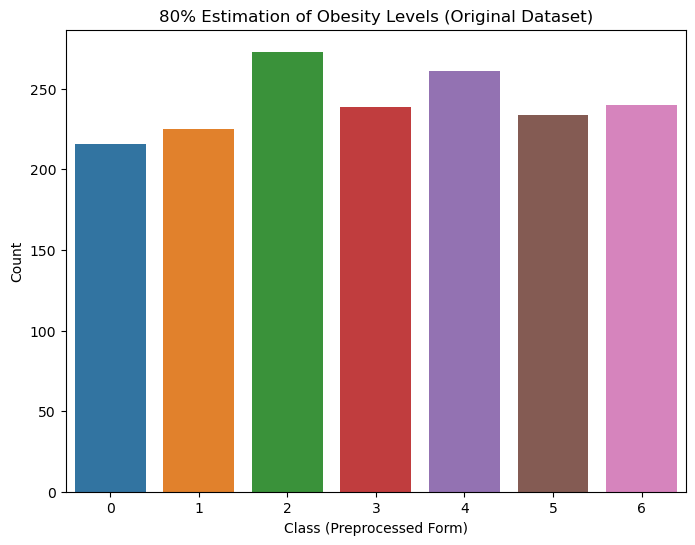

In [33]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = obesity_train_dataframe['NObeyesdad'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Estimation of Obesity Levels (Original Dataset)')
plt.show()

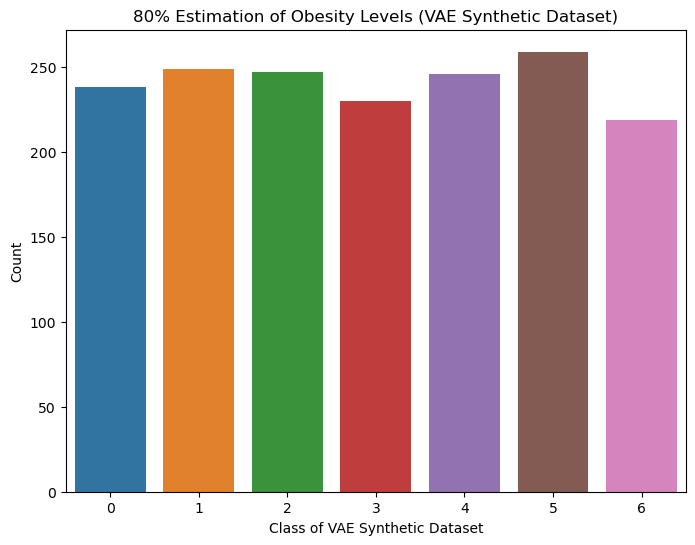

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'Class_att' is your target column
class_counts = vae_synthetic_obesity_data_with_labels_df_new1['NObeyesdad'].value_counts()

# If ae_synthetic_labels_df is a DataFrame with a column named 'PredictedLabels'
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('80% Estimation of Obesity Levels (VAE Synthetic Dataset)')
plt.xlabel('Class of VAE Synthetic Dataset')
plt.ylabel('Count')
plt.show()

In [38]:
features2 = obesity_train_dataframe.drop('NObeyesdad', axis=1)
labels2 = obesity_train_dataframe['NObeyesdad']

# Split the balanced dataset into training and testing sets
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Confirm the shapes   
print("X_train_syn shape:", X_train_orig_new.shape)
print("X_test_syn shape:", X_test_orig_new.shape)
print("y_train_syn shape:", y_train_orig_new.shape)
print("y_test_syn shape:", y_test_orig_new.shape)

X_train_syn shape: (1350, 16)
X_test_syn shape: (338, 16)
y_train_syn shape: (1350,)
y_test_syn shape: (338,)


In [40]:
featuresVAE = vae_synthetic_obesity_data_with_labels_df.drop('NObeyesdad', axis=1)
labelsVAE = vae_synthetic_obesity_data_with_labels_df['NObeyesdad']

# Split the dataset into training and testing sets
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn_vae shape:", X_train_syn_vae.shape)
print("X_test_syn_vae shape:", X_test_syn_vae.shape)
print("y_train_syn_vae shape:", y_train_syn_vae.shape)
print("y_test_syn_vae shape:", y_test_syn_vae.shape)

X_train_syn_vae shape: (1350, 16)
X_test_syn_vae shape: (338, 16)
y_train_syn_vae shape: (1350,)
y_test_syn_vae shape: (338,)


In [41]:
featuresCONT = control_dataframe.drop('NObeyesdad', axis=1)
labelsCONT = control_dataframe['NObeyesdad']

# Split the dataset into training and testing sets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont shape:", X_train_cont.shape)
print("X_test_cont shape:", X_test_cont.shape)
print("y_train_cont shape:", y_train_cont.shape)
print("y_test_cont shape:", y_test_cont.shape)

X_train_cont shape: (338, 16)
X_test_cont shape: (85, 16)
y_train_cont shape: (338,)
y_test_cont shape: (85,)


# CLASSIFICATION REPORT (f1-score, accuracy, recall, precision)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("LGR on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
classifier_syn.fit(X_train_syn_vae, y_train_syn_vae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("LGR on 80% VAE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.90      0.69      0.78        13
           2       0.62      0.71      0.67         7
           3       1.00      1.00      1.00        19
           4       0.93      1.00      0.96        13
           5       0.57      0.44      0.50         9
           6       0.57      0.67      0.62        12

    accuracy                           0.82        85
   macro avg       0.79      0.79      0.78        85
weighted avg       0.83      0.82      0.82        85

LGR on 80% VAE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.71      0.38      0.50        13
           2       0.44      0.57      0.50         7
           3       0.56      0.47      0.51        19

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=200, random_state=42)
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("MLP on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = MLPClassifier()
classifier_syn.fit(X_train_syn_vae, y_train_syn_vae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("MLP on 80% VAE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.80      0.62      0.70        13
           2       1.00      0.71      0.83         7
           3       0.95      0.95      0.95        19
           4       1.00      1.00      1.00        13
           5       0.60      0.33      0.43         9
           6       0.60      1.00      0.75        12

    accuracy                           0.84        85
   macro avg       0.84      0.80      0.80        85
weighted avg       0.85      0.84      0.83        85

MLP on 80% VAE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.75      0.69      0.72        13
           2       0.36      0.57      0.44         7
           3       0.89      0.42      0.57        19

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = RandomForestClassifier()
classifier_orig.fit(X_train_orig_new, y_train_orig_new)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("RF on 80% Original Obesity/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = RandomForestClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_syn.fit(X_train_syn_vae, y_train_syn_vae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("RF on 80% VAE Synthetic Obesity/Tested on 20% Control Data (TSTR):\n", report)


RF on 80% Original Obesity/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        13
           5       1.00      0.78      0.88         9
           6       0.75      1.00      0.86        12

    accuracy                           0.94        85
   macro avg       0.95      0.93      0.93        85
weighted avg       0.95      0.94      0.94        85

RF on 80% VAE Synthetic Obesity/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.67      0.31      0.42        13
           2       0.21      0.43      0.29         7
           3       1.00      0.68      0.81        19
 

# Computation and Graphical Representations of AUC-ROC Curves by Classifiers

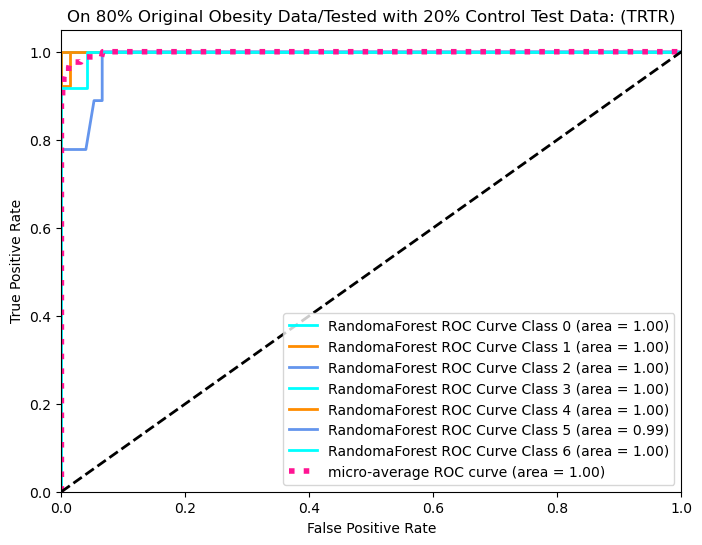

In [38]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_orig_new, y_train_orig_new)

# Assuming y_test_cont is your real test labels (unseen data)
# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = classifier_on_synthetic.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='RandomaForest ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


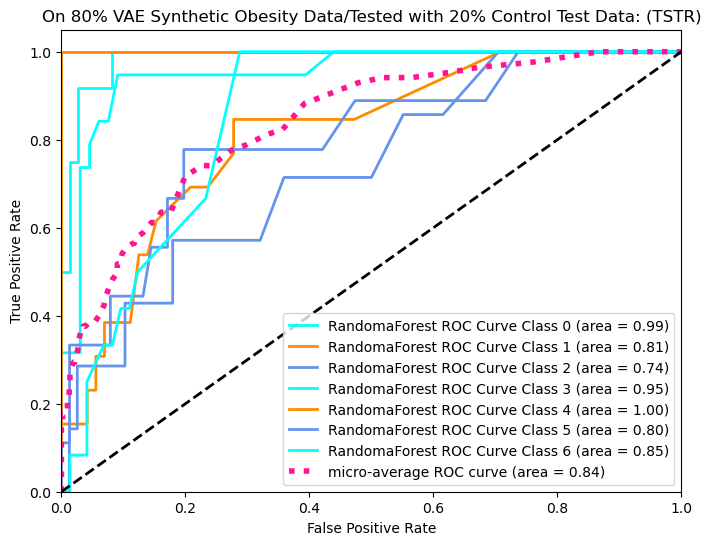

In [79]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


classifier_on_synthetic = RandomForestClassifier()
classifier_on_synthetic.fit(X_train_syn_vae, y_train_syn_vae)

# Assuming y_test_cont is your real test labels (unseen data)
# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = classifier_on_synthetic.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='RandomaForest ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


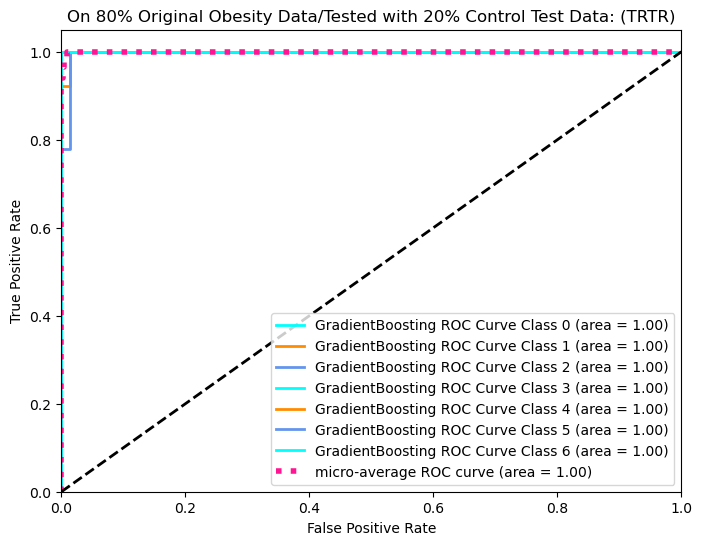

In [80]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = gb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='GradientBoosting ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


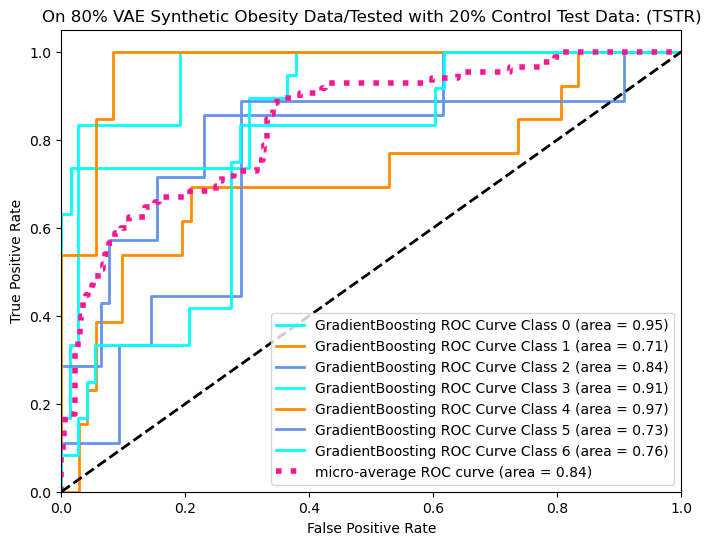

In [106]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae3, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train_syn_vae, y_train_syn_vae)

# Assuming y_test_cont is your control test labels (unseen data)
# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = gb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='GradientBoosting ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


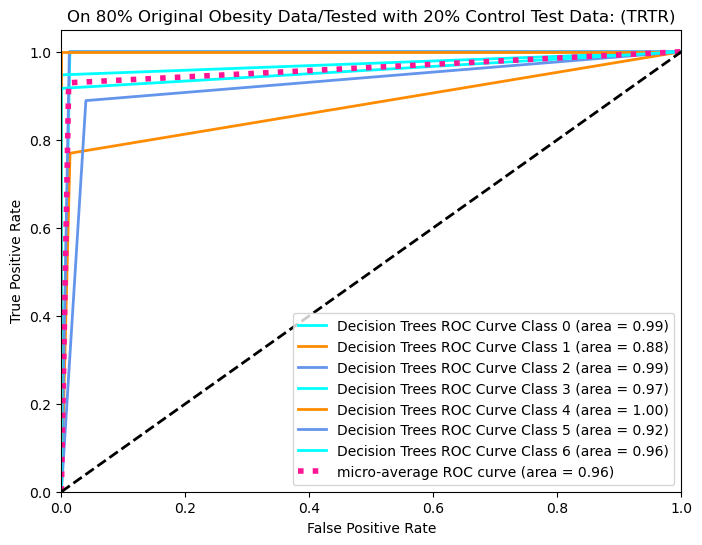

In [84]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


dct_classifier = DecisionTreeClassifier()
dct_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = dct_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Decision Trees ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


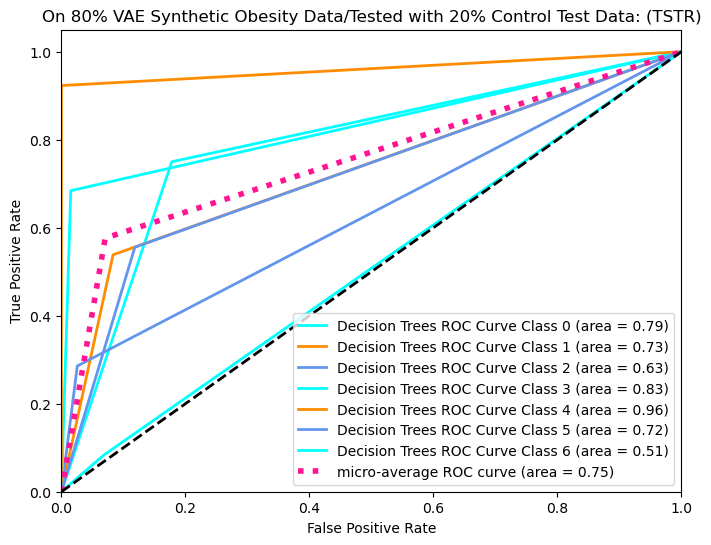

In [34]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# And X_train, X_test, y_train, y_test are your 20% Control obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


dct_classifier = DecisionTreeClassifier()
dct_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = dct_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Decision Trees ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


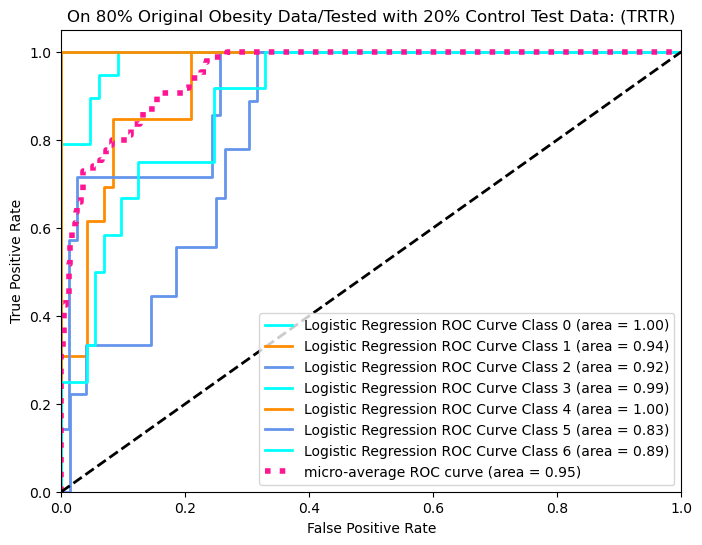

In [87]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


lgr_classifier = LogisticRegression()
lgr_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgr_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Logistic Regression ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


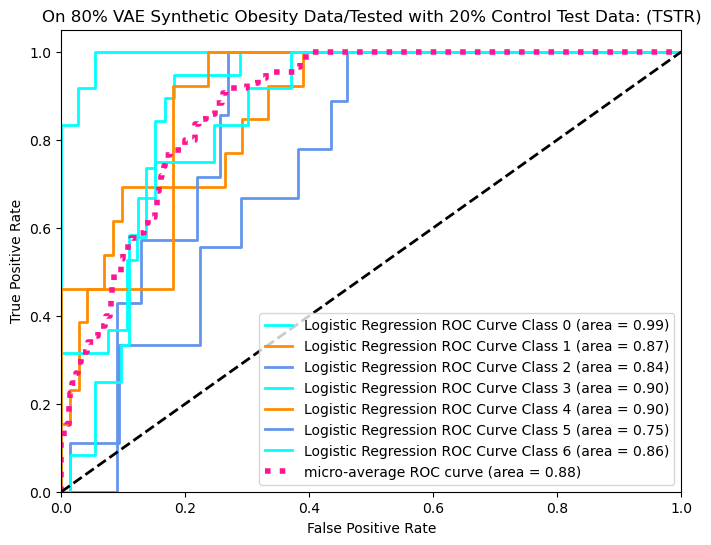

In [37]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


lgr_classifier = LogisticRegression(C=1.0, solver='lbfgs', random_state=42, max_iter=1500)
lgr_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgr_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Logistic Regression ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


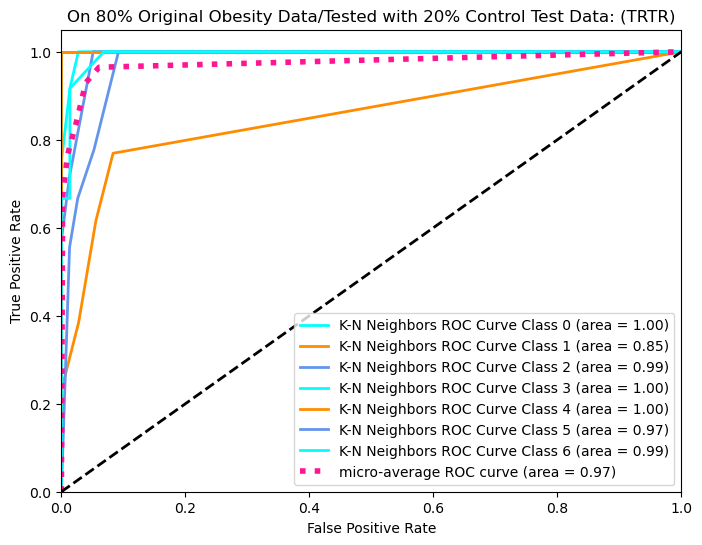

In [38]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = knn_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='K-N Neighbors ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


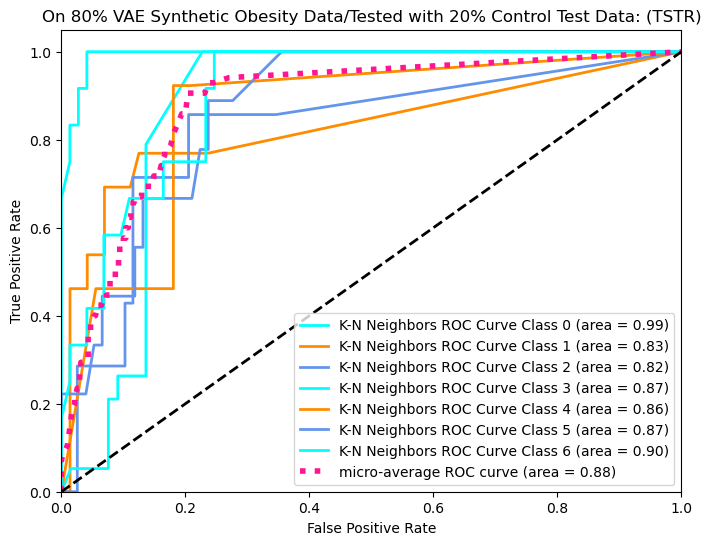

In [47]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


knn_classifier = KNeighborsClassifier(n_neighbors=200, weights='uniform', algorithm='auto')
knn_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = knn_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='K-N Neighbors ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


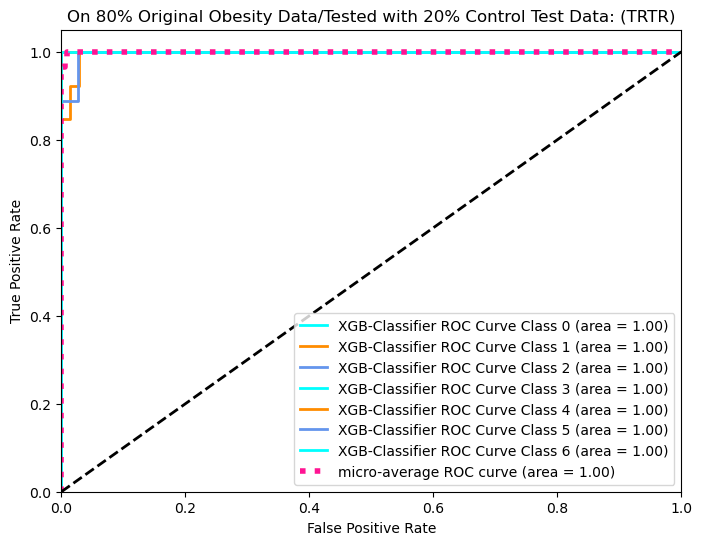

In [48]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = xgb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='XGB-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


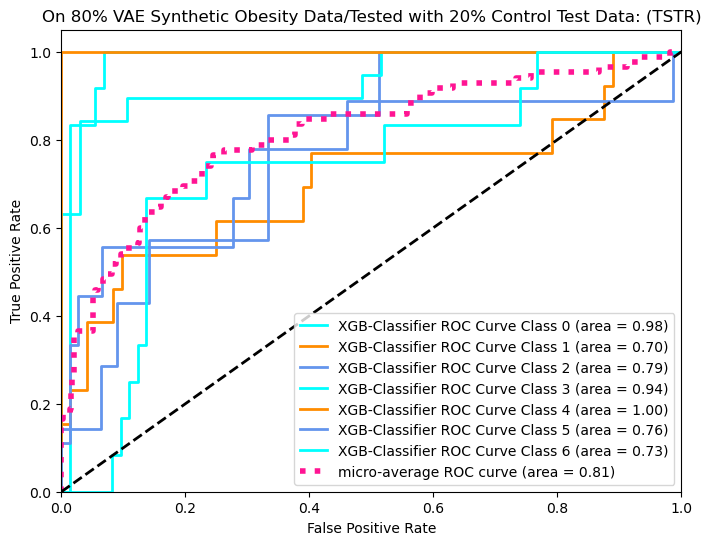

In [18]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = xgb_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='XGB-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


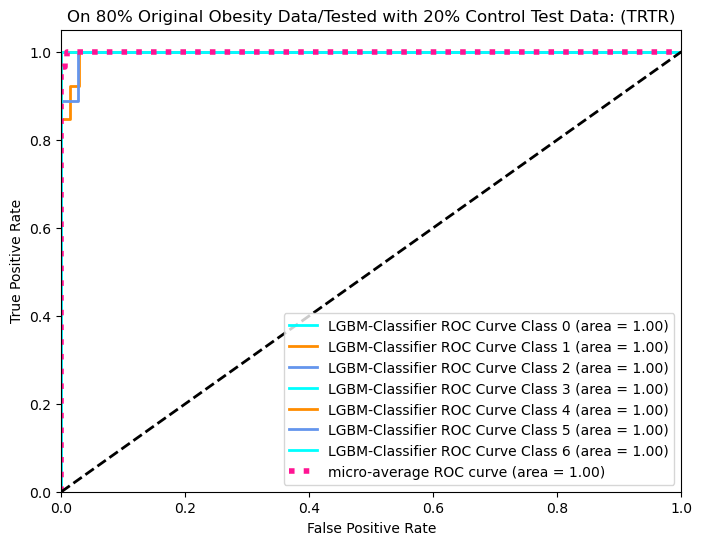

In [58]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


lgbm_classifier = XGBClassifier()
lgbm_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgbm_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='LGBM-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1350, number of used features: 16
[LightGBM] [Info] Start training from score -2.083896
[LightGBM] [Info] Start training from score -1.865526
[LightGBM] [Info] Start training from score -1.971418
[LightGBM] [Info] Start training from score -2.020474
[LightGBM] [Info] Start training from score -1.879984
[LightGBM] [Info] Start training from score -1.976751
[LightGBM] [Info] Start training from score -1.846568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

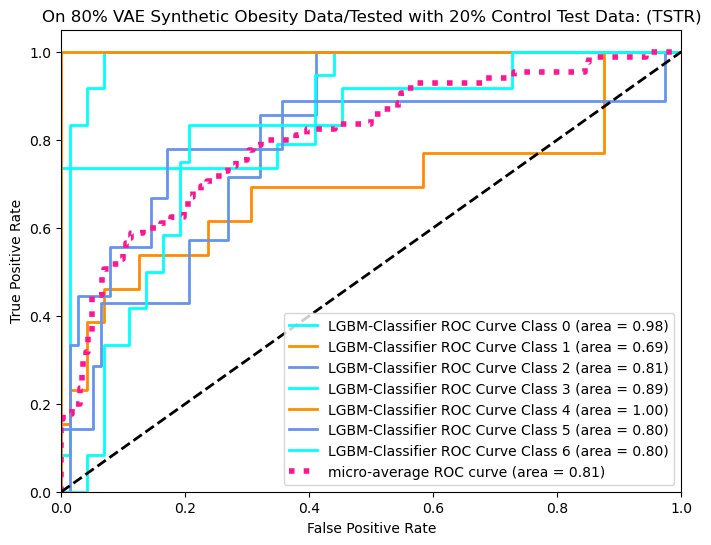

In [32]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgbm_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='LGBM-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1350, number of used features: 16
[LightGBM] [Info] Start training from score -2.083896
[LightGBM] [Info] Start training from score -1.865526
[LightGBM] [Info] Start training from score -1.971418
[LightGBM] [Info] Start training from score -2.020474
[LightGBM] [Info] Start training from score -1.879984
[LightGBM] [Info] Start training from score -1.976751
[LightGBM] [Info] Start training from score -1.846568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

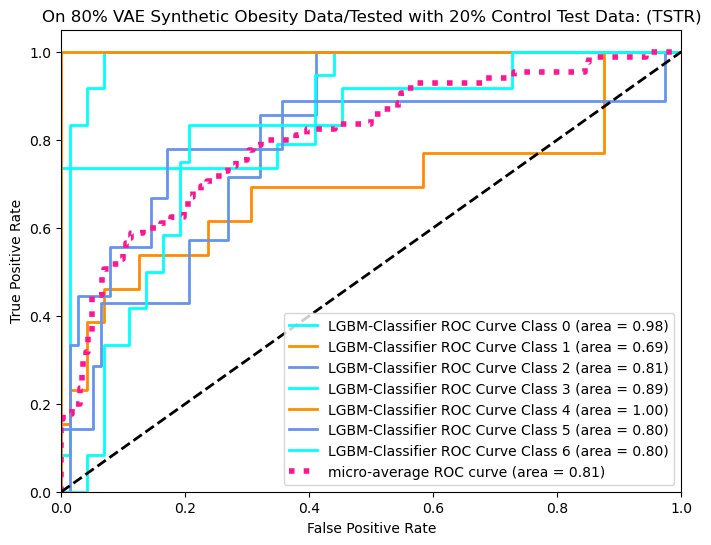

In [33]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = lgbm_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='LGBM-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


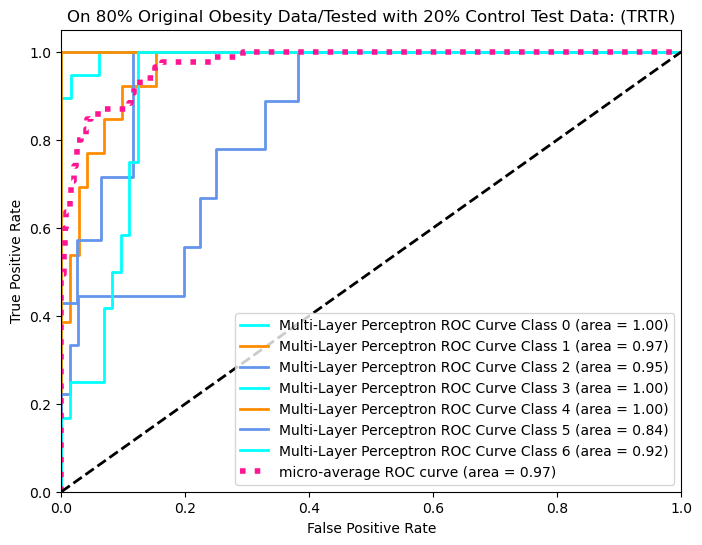

In [61]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = mlp_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Multi-Layer Perceptron ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


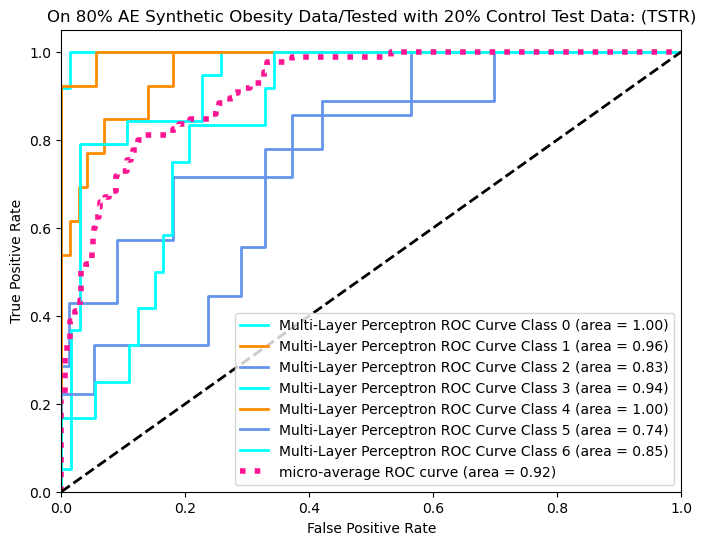

In [63]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = mlp_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Multi-Layer Perceptron ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% AE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


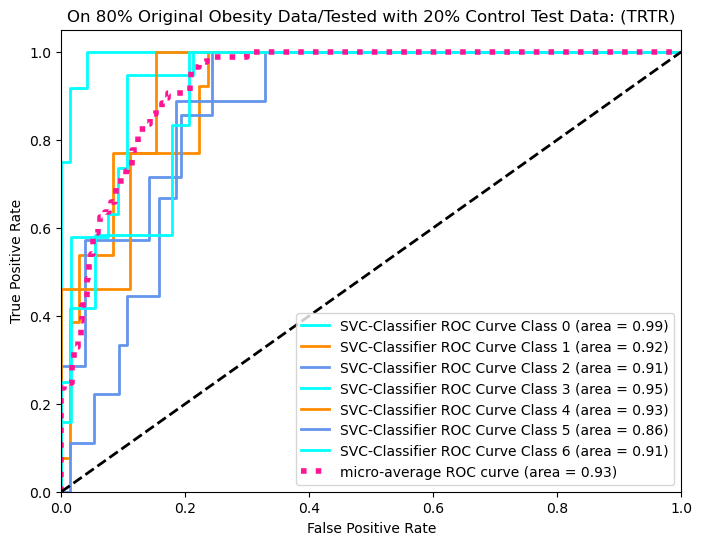

In [67]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% Original Obesity dataset split
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, labels2, test_size=0.2, random_state=42)


svc_classifier =  SVC(probability=True)
svc_classifier.fit(X_train_orig_new, y_train_orig_new)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = svc_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='SVC-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Original Obesity Data/Tested with 20% Control Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


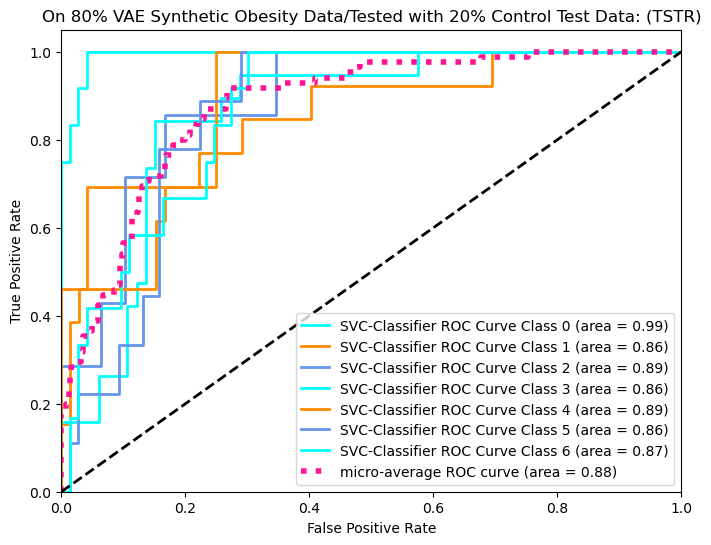

In [68]:
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# And X_train, X_test, y_train, y_test are your 20% Control Obesity dataset split
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# And X_train, X_test, y_train, y_test are your 80% AE Sythetic Obesity dataset split
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)


svc_classifier =  SVC(probability=True)
svc_classifier.fit(X_train_syn_vae, y_train_syn_vae)


# First, encode these labels numerically
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(np.unique(y_test_cont))  # Assuming y_test_cont is available
y_test_cont_encoded = label_encoder.transform(y_test_cont)

# Binarize the labels for multiclass scenario
y_test_binarized = label_binarize(y_test_cont_encoded, classes=np.unique(y_encoded))
n_classes = y_test_binarized.shape[1]

# Assuming classifier is your trained model and X_test_cont is your control test features
y_score = svc_classifier.predict_proba(X_test_cont)  # Ensure your classifier is trained with .fit() before this

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='SVC-Classifier ROC Curve Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4, label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% VAE Synthetic Obesity Data/Tested with 20% Control Test Data: (TSTR)')
plt.legend(loc="lower right")
plt.show()


# AUC-ROC Curve for 80% ORIGINAL AND VAE SYNTHETIC OBESITY DATASETS

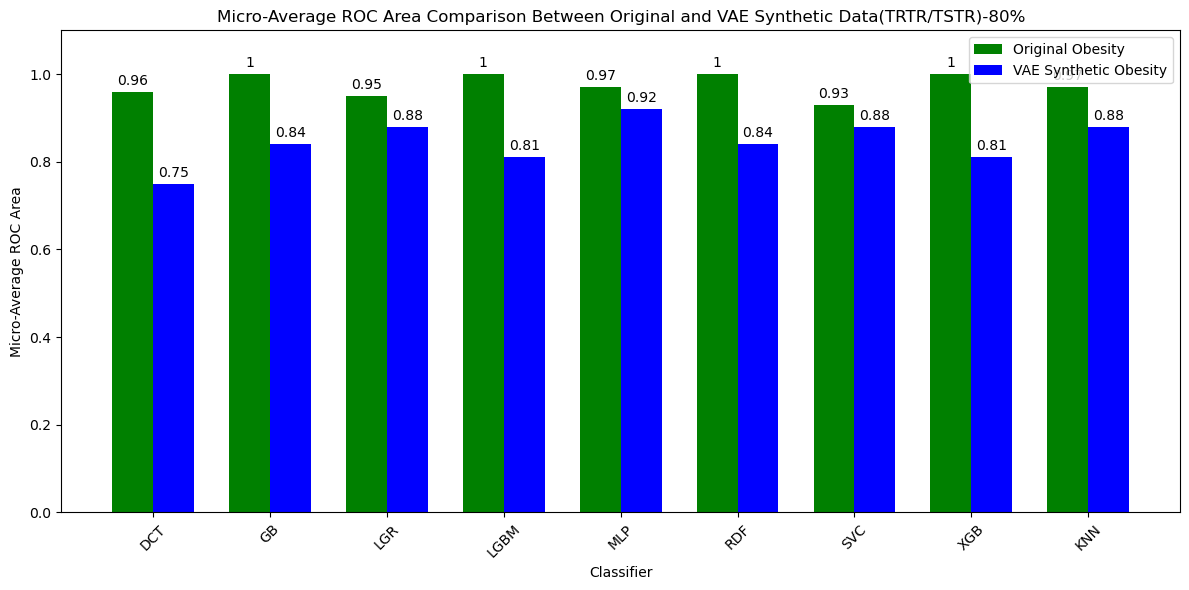

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Classifiers
classifiers = ['DCT', 'GB', 'LGR', 'LGBM', 'MLP', 'RDF', 'SVC', 'XGB', 'KNN']

# Micro-Average ROC Areas for Original and VAE Synthetic Datasets
micro_avg_roc_original = [0.96, 1.00, 0.95, 1.00, 0.97, 1.00, 0.93, 1.00, 0.97]
micro_avg_roc_vae_synthetic = [0.75, 0.84, 0.88, 0.81, 0.92, 0.84, 0.88, 0.81, 0.88]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, micro_avg_roc_original, width, label='Original Obesity', color='green')
rects2 = ax.bar(x + width/2, micro_avg_roc_vae_synthetic, width, label='VAE Synthetic Obesity', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifier')
ax.set_ylabel('Micro-Average ROC Area')
ax.set_title('Micro-Average ROC Area Comparison Between Original and VAE Synthetic Data(TRTR/TSTR)-80%')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()


ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(rotation=45)
plt.ylim(0, 1.1) # Extend y-axis to make room for labels
plt.tight_layout()
plt.show()


# Computing Numerical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

In [75]:
# X_train_vae_syn, X_test_vae_syn, y_train_vae_syn, y_test_vae_syn = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_series, test_size=0.2, random_state=42)

from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming `obesity_df` and `ae_synthetic_data_df` are properly aligned
for column in vae_synthetic_obesity_data_with_labels_df.columns:
    # KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(obesity_train_dataframe[column], vae_synthetic_obesity_data_with_labels_df[column])
    print(f"KS-Test for {column}: Stat={ks_stat}, P-Value={ks_pvalue}")
    
    # MSE, RMSE, and MAE for a column
    mse = mean_squared_error(obesity_train_dataframe[column], vae_synthetic_obesity_data_with_labels_df[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(obesity_train_dataframe[column], vae_synthetic_obesity_data_with_labels_df[column])
    print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}")
    
    # F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(obesity_train_dataframe[column], vae_synthetic_obesity_data_with_labels_df[column])
    t_stat, t_pvalue = ttest_ind(obesity_train_dataframe[column], vae_synthetic_obesity_data_with_labels_df[column])
    print(f"F-Test: Stat={f_stat}, P-Value={f_pvalue}")
    print(f"T-Test: Stat={t_stat}, P-Value={t_pvalue}")

    # Means and Standard Deviation
    orig_mean = obesity_train_dataframe[column].mean()
    vae_syn_mean = vae_synthetic_obesity_data_with_labels_df[column].mean()
    orig_std = obesity_train_dataframe[column].std()
    vae_syn_std = vae_synthetic_obesity_data_with_labels_df[column].std()
    print(f"Original Mean={orig_mean}, VAE_Synthetic Mean={vae_syn_mean}, Original Std={orig_std}, VAE_Synthetic Std={vae_syn_std}\n")


KS-Test for Gender: Stat=0.5065165876777251, P-Value=1.9128328888759265e-197
MSE: 0.39730648704753385, RMSE: 0.6303225262098237, MAE: 0.49737802076057536
F-Test: Stat=0.44705383280376637, P-Value=0.5037831131640823
T-Test: Stat=-0.6686194619382883, P-Value=0.5037839947877751
Original Mean=0.5065165876777251, VAE_Synthetic Mean=0.5168067216873169, Original Std=0.5001056897991678, VAE_Synthetic Std=0.3869558572769165

KS-Test for Age: Stat=0.23222748815165878, P-Value=2.5978393078148427e-40
MSE: 49.53159687599318, RMSE: 7.037868773712194, MAE: 5.289047742988551
F-Test: Stat=3.7560150077563192, P-Value=0.05270116541835449
T-Test: Stat=1.9380447718296552, P-Value=0.05270108576313884
Original Mean=24.448979086492884, VAE_Synthetic Mean=24.11374855041504, Original Std=6.477100151199148, VAE_Synthetic Std=2.924067497253418

KS-Test for Height: Stat=0.1990521327014218, P-Value=1.1711611472769468e-29
MSE: 0.011316475064438905, RMSE: 0.10637892208722038, MAE: 0.08604205545485076
F-Test: Stat=0.2

# Computing Graphical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

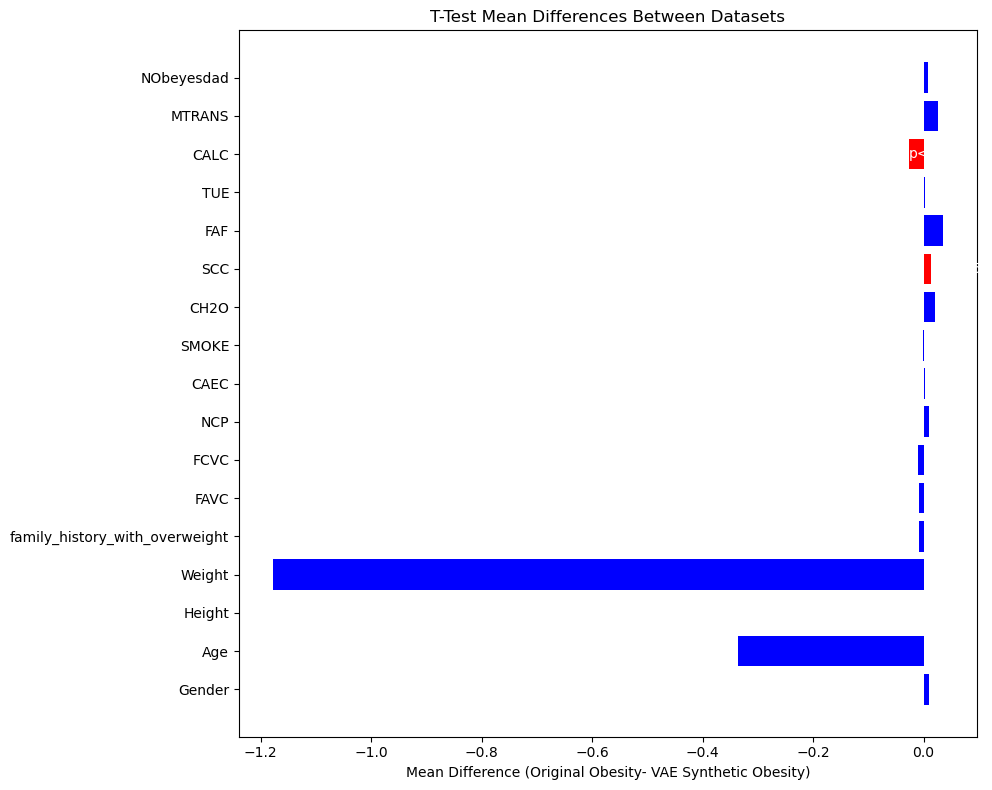

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Features list
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# T-Test Mean Differences and P-Values (fill in your actual values)
mean_diff = [0.0102901340105918, -0.335230536077844, 0.0013660387924381, -1.17889296910866, -0.0089109393092693, -0.0090332864585081, -0.0108112305986323, 0.0097094865326327, 0.0034687875006436, -0.0002985466977855, 0.0201572293133498, 0.0131575031101972, 0.0360651867746306, 0.0025839666251402, -0.0268282845121988, 0.0261041281912563, 0.0088862559241707]
t_pvalues = [0.5037839947877751, 0.05270108576313884, 0.6010132752827533, 0.1747620061699201, 0.42906189946510775, 0.31274970785851025, 0.4604508975192858, 0.6277092081278484, 0.7889900481908806, 0.9372014281172657, 0.19377983096773466, 0.03118880176174695, 0.09028913947661728, 0.8650511736074074, 0.04219322396515567, 0.42291890468373483, 0.8961250911088705]

# F-Test Variance Differences and P-Values (fill in your actual values)
var_diff = [-0.1131498325222513, -3.55203265394573, -0.0403109237502579, -1.76702776462265, -0.127585292610206, -0.1266675579311808, -0.2654657425427735, -0.5293824608346492, -0.2423318888855968, -0.1096269935717516, -0.4241342011777205, -0.0600534177751778, -0.5955163453783134, -0.4382590566518775, -0.3505467466695843, -0.8578975208106103, -0.0373987020511232]
f_pvalues = [0.5037831131640823, 0.05270116541835449, 0.6010331539275076, 0.17476327050872098, 0.42905950736124165, 0.31275138732973806, 0.46044874196479657, 0.6277151290283591, 0.7889867259603053, 0.937201424243717, 0.19378037942685802, 0.031188804138364758, 0.09028947643846517, 0.8650522921388077, 0.04219304796657146, 0.42291887578040765, 0.8961250911093316]


plt.figure(figsize=(10, 8))
colors = ['red' if p < 0.05 else 'blue' for p in t_pvalues]
plt.barh(features, mean_diff, color=colors)
plt.xlabel('Mean Difference (Original Obesity- VAE Synthetic Obesity)')
plt.title('T-Test Mean Differences Between Datasets')

# Adding significance markers
for i, p in enumerate(t_pvalues):
    if p < 0.05:
        plt.text(mean_diff[i], i, 'p<0.05', fontsize=10, va='center', color='white')

plt.tight_layout()
plt.show()


# Plotting the Variance Differences (F-Test Analysis)

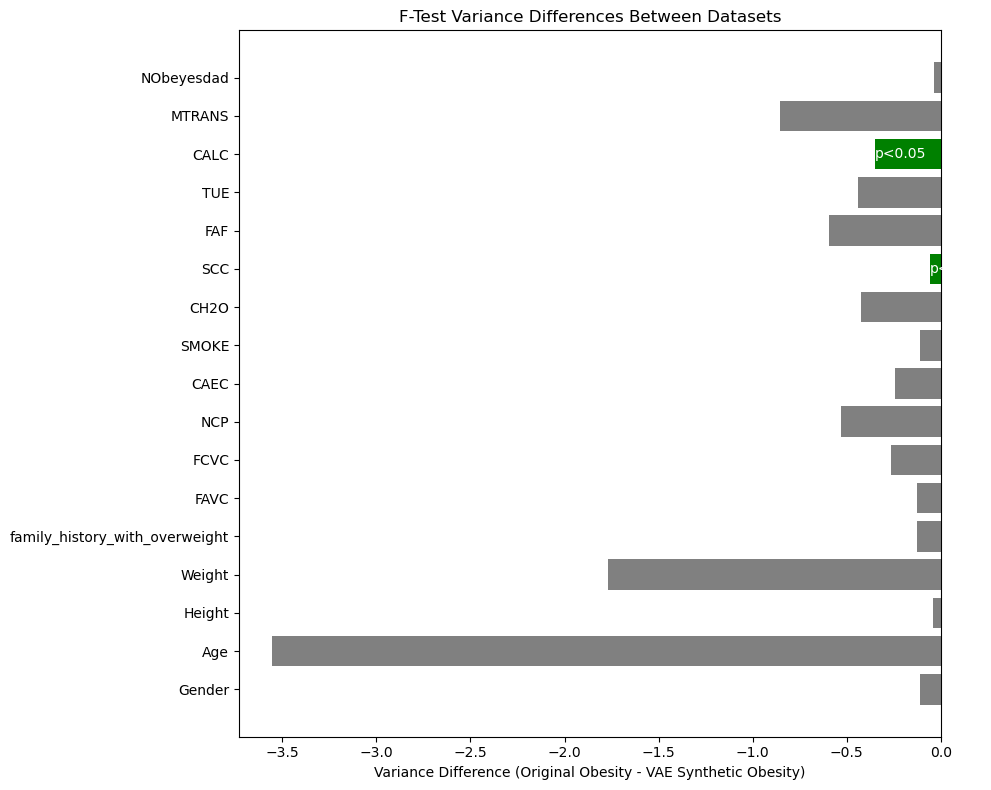

In [42]:
plt.figure(figsize=(10, 8))
colors = ['green' if p < 0.05 else 'grey' for p in f_pvalues]
plt.barh(features, var_diff, color=colors)
plt.xlabel('Variance Difference (Original Obesity - VAE Synthetic Obesity)')
plt.title('F-Test Variance Differences Between Datasets')

# Adding significance markers
for i, p in enumerate(f_pvalues):
    if p < 0.05:
        plt.text(var_diff[i], i, 'p<0.05', fontsize=10, va='center', color='white')

plt.tight_layout()
plt.show()


# Visualizing MSE, RMSE, and MAE

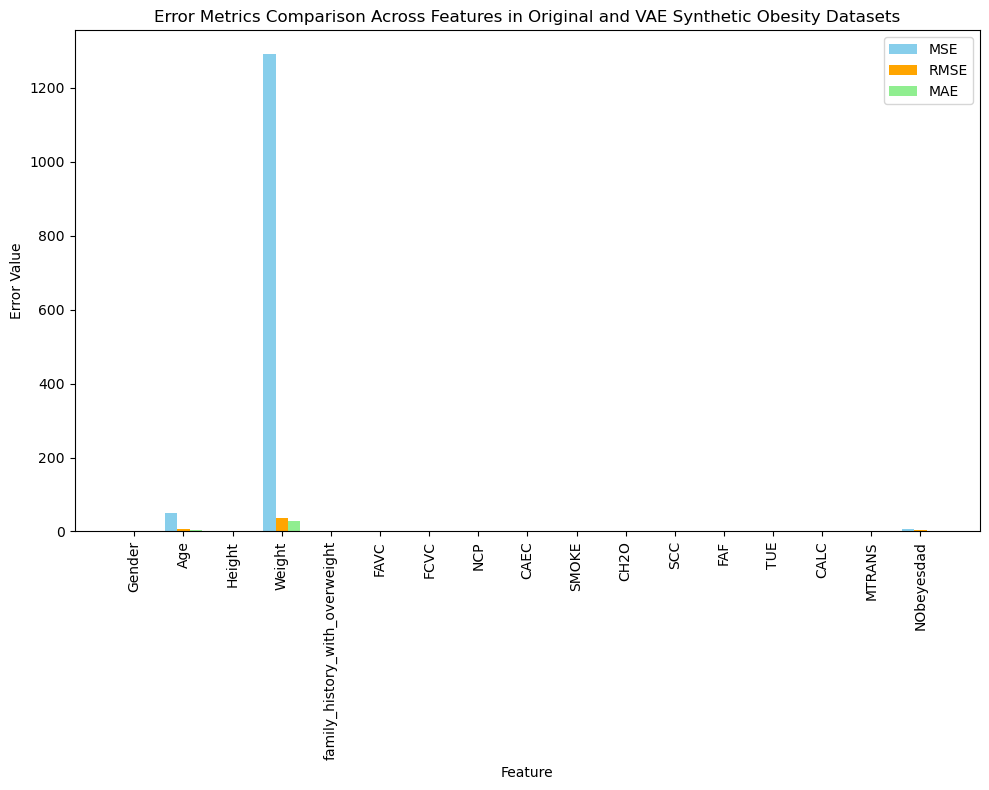

In [46]:
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Actual MSE, RMSE, and MAE values obtained from your analysis
mse_values = [0.39730648704753385, 49.53159687599318, 0.011316475064438905, 1291.089800535629, 0.2136068824620787, 0.13412153122562617, 0.36307238787517493, 0.6546831124876754, 0.27877662508806406, 0.024136759616686137, 0.40584298392527796, 0.06434182917654607, 0.7779221547925714, 0.3884773729035628, 0.2980205247306367, 1.7767295630059836, 7.552725118483412]
rmse_values = [np.sqrt(mse) for mse in mse_values]
mae_values = [0.49737802076057536, 5.289047742988551, 0.08604205545485076, 29.082153273654164, 0.30110043473541737, 0.20487423847932634, 0.5042016544371872, 0.6162049947921879, 0.3150682464877576, 0.044770740604955304, 0.5172631408083586, 0.09715125836048154, 0.7307781976138042, 0.5179542895722729, 0.441118441416189, 1.03789338893235, 2.2031990521327014]

import matplotlib.pyplot as plt
import numpy as np

# Setting the positions and width for the bars
positions = np.arange(len(features))
bar_width = 0.25

# Plotting MSE, RMSE, and MAE
plt.figure(figsize=(10, 8))
mse_bars = plt.bar(positions - bar_width, mse_values, bar_width, label='MSE', color='skyblue')
rmse_bars = plt.bar(positions, rmse_values, bar_width, label='RMSE', color='orange')
mae_bars = plt.bar(positions + bar_width, mae_values, bar_width, label='MAE', color='lightgreen')

plt.xlabel('Feature')
plt.ylabel('Error Value')
plt.title('Error Metrics Comparison Across Features in Original and VAE Synthetic Obesity Datasets')
plt.xticks(positions, features, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


# Visualizing KS-Test Results

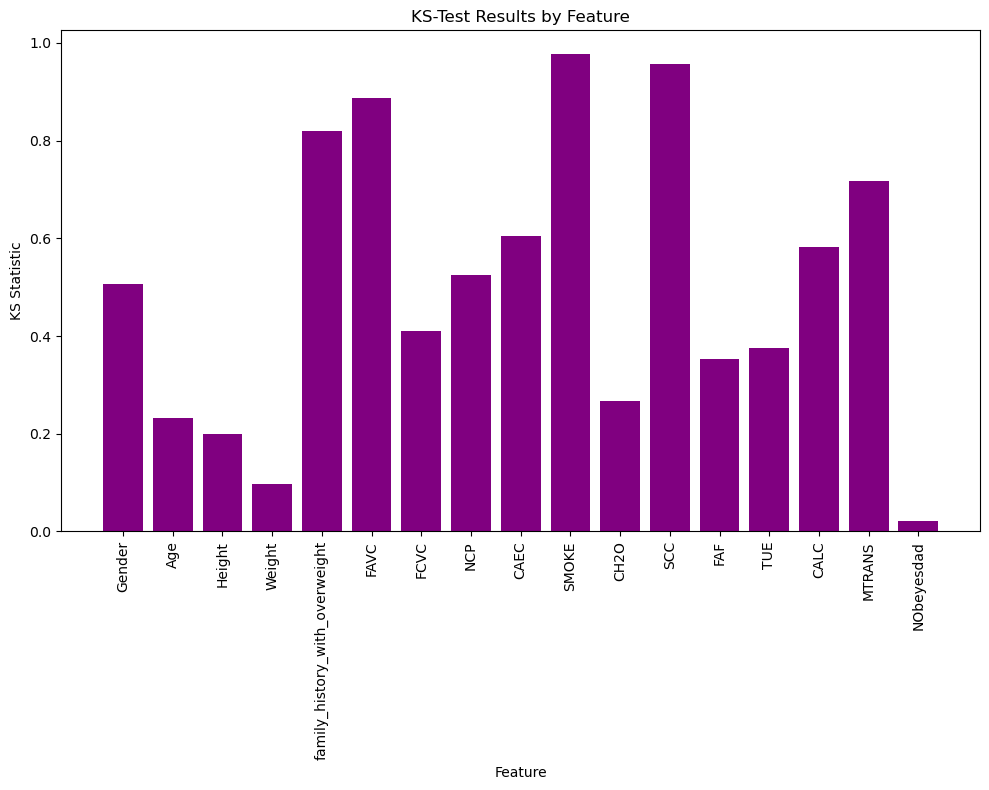

In [49]:
import matplotlib.pyplot as plt
import numpy as np

features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
ks_stats = [0.5065165876777251, 0.23222748815165878, 0.1990521327014218, 0.09774881516587677, 0.8193127962085308, 0.8880331753554502, 0.4099526066350711, 0.5248815165876777, 0.6048578199052133, 0.9768957345971564, 0.2677725118483412, 0.9561611374407583, 0.35308056872037913, 0.375, 0.5829383886255924, 0.7180094786729858, 0.020734597156398103]


plt.figure(figsize=(10, 8))
bars = plt.bar(features, ks_stats, color='purple')

plt.xlabel('Feature')
plt.ylabel('KS Statistic')
plt.title('KS-Test Results by Feature')
plt.xticks(rotation=90)

# Adding the KS statistic values above each bar for clarity
for bar, stat in zip(bars, ks_stats):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(stat, 2), ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()


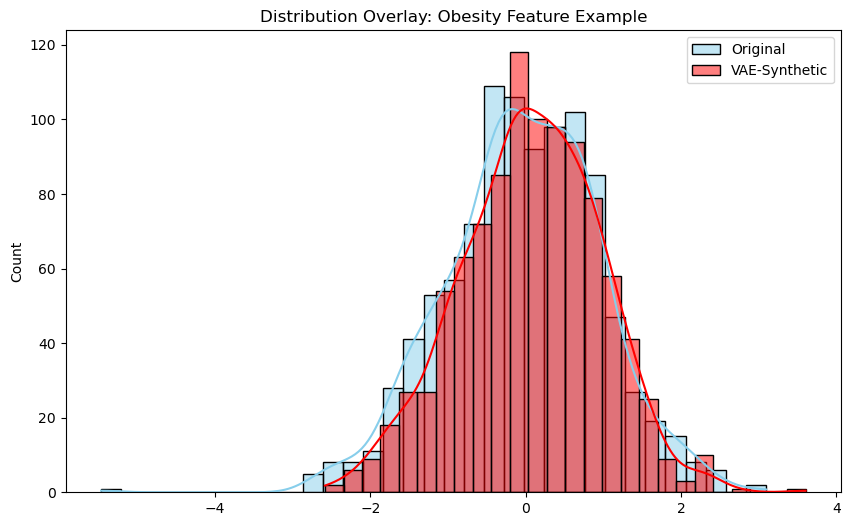

<Figure size 1000x600 with 0 Axes>

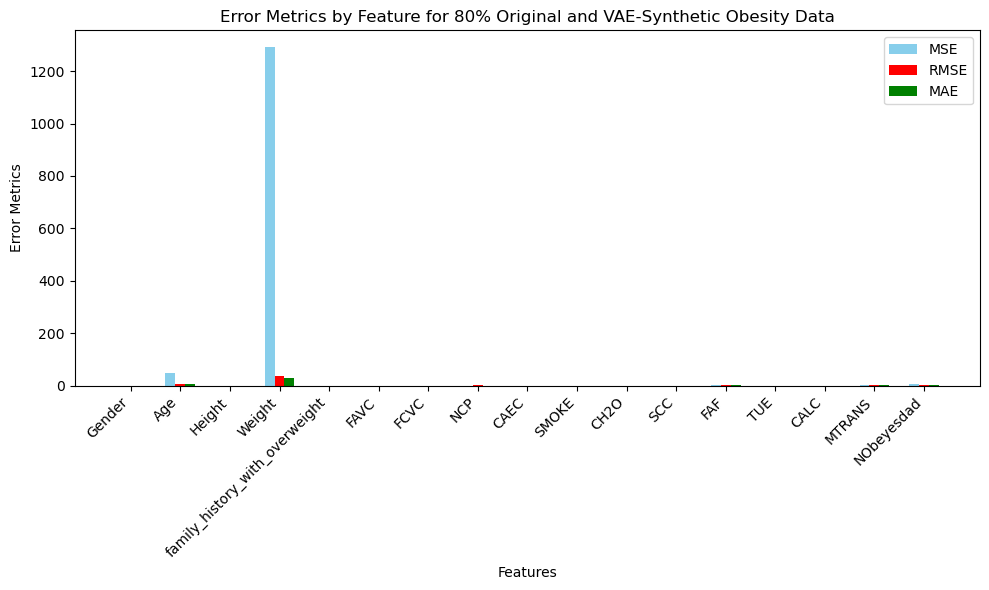

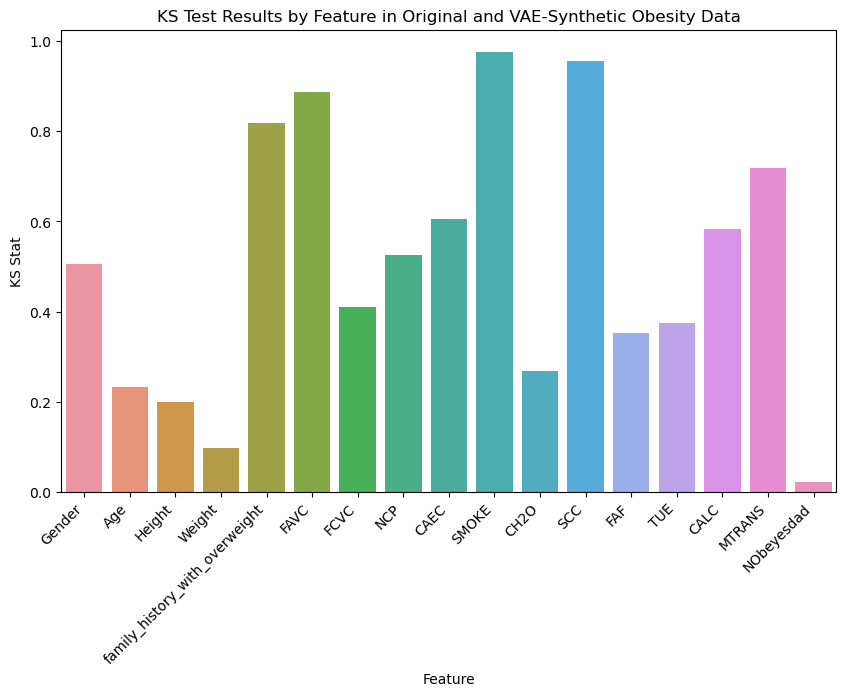

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming data for demonstration based on provided results
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
ks_stats = [0.5065, 0.2322, 0.1990, 0.0977, 0.8193, 0.8880, 0.4099, 0.5248, 0.6048, 0.9768, 0.2677, 0.9561, 0.3530, 0.3750, 0.5829, 0.7180, 0.0207]
p_values = [1.91e-197, 2.59e-40, 1.17e-29, 1.93e-07, 0.0, 0.0, 2.69e-127, 8.43e-213, 6.88e-288, 0.0, 1.27e-53, 0.0, 8.67e-94, 4.78e-106, 6.34e-266, 0.0, 0.8613]
mse_values = [0.3973, 49.5315, 0.0113, 1291.0898, 0.2136, 0.1341, 0.3630, 0.6546, 0.2787, 0.0241, 0.4058, 0.0643, 0.7779, 0.3884, 0.2980, 1.7767, 7.5527]
rmse_values = np.sqrt(mse_values)
mae_values = [0.4973, 5.2890, 0.0860, 29.0821, 0.3011, 0.2048, 0.5042, 0.6162, 0.3150, 0.0447, 0.5172, 0.0971, 0.7307, 0.5179, 0.4411, 1.0378, 2.2031]

# Create DataFrame for visualization
df_stats = pd.DataFrame({
    'Feature': features,
    'KS Stat': ks_stats,
    'P-Value': p_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values
})

obesity_train_dataframe = np.random.normal(0, 1, 1000)  # Replace with actual real data for 'Attribute'
vae_synthetic_obesity_data_with_labels_df_new1 = np.random.normal(0.1, 0.9, 1000)  # Replace with actual synthetic data for 'Attribute'

## Distribution Overlays for attributes
plt.figure(figsize=(10, 6))
sns.histplot(obesity_train_dataframe, color="skyblue", label="Original", kde=True)
sns.histplot(vae_synthetic_obesity_data_with_labels_df_new1, color="red", label="VAE-Synthetic", kde=True)
plt.title('Distribution Overlay: Obesity Feature Example')
plt.legend()
plt.show()

## Error Metrics Bar Charts for All Features
plt.figure(figsize=(10, 6))
x = np.arange(len(features))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mse_values, width, label='MSE', color='skyblue')
rects2 = ax.bar(x, rmse_values, width, label='RMSE', color='red')
rects3 = ax.bar(x + width, mae_values, width, label='MAE', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Error Metrics')
ax.set_title('Error Metrics by Feature for 80% Original and VAE-Synthetic Obesity Data')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()

## KS Test Results - Bar Chart for All Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='KS Stat', data=df_stats)
plt.title('KS Test Results by Feature in Original and VAE-Synthetic Obesity Data')
plt.xticks(rotation=45, ha="right")
plt.show()


#  Plotting Distribution Overlays

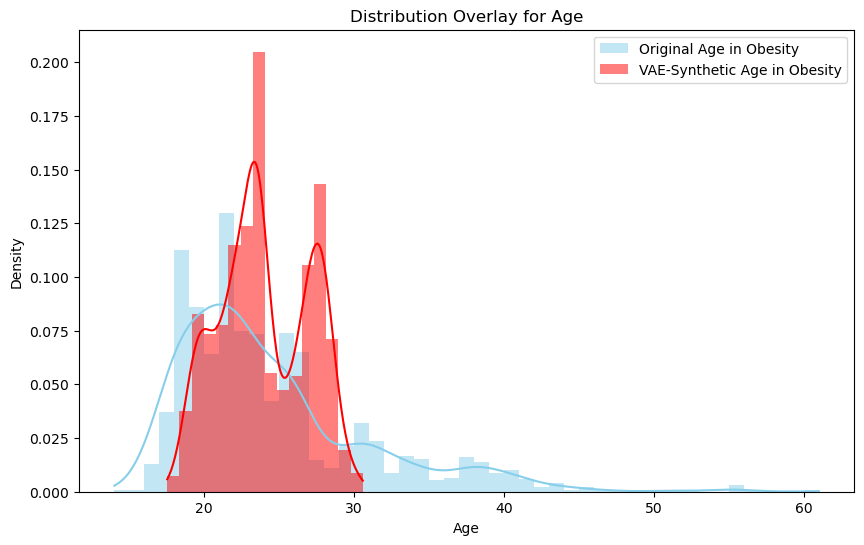

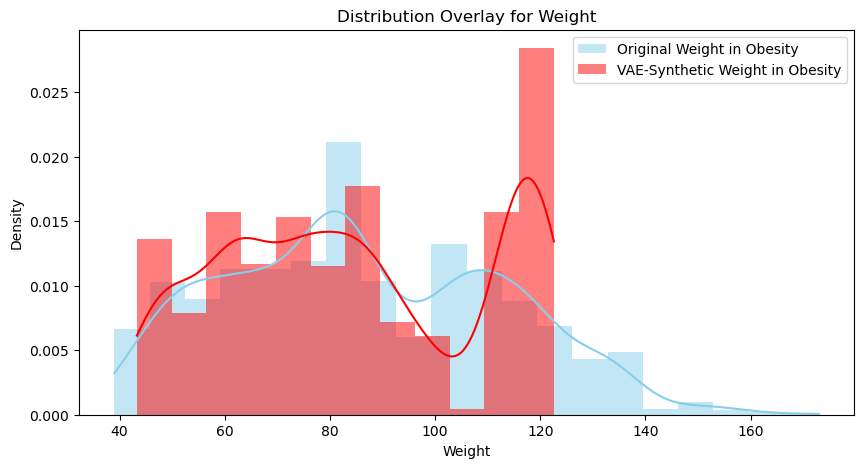

In [53]:
# Example plotting for the 'Age' feature
plt.figure(figsize=(10, 6))
sns.histplot(obesity_train_dataframe['Age'], color="skyblue", label="Original Age in Obesity", kde=True, stat="density", linewidth=0)
sns.histplot(vae_synthetic_obesity_data_with_labels_df['Age'], color="red", label="VAE-Synthetic Age in Obesity", kde=True, stat="density", linewidth=0)
plt.legend()
plt.title('Distribution Overlay for Age')
plt.show()

# Example plotting for the 'Weight' feature
plt.figure(figsize=(10, 5))
sns.histplot(obesity_train_dataframe['Weight'], color="skyblue", label="Original Weight in Obesity", kde=True, stat="density", linewidth=0)
sns.histplot(vae_synthetic_obesity_data_with_labels_df['Weight'], color="red", label="VAE-Synthetic Weight in Obesity", kde=True, stat="density", linewidth=0)
plt.legend()
plt.title('Distribution Overlay for Weight')
plt.show()


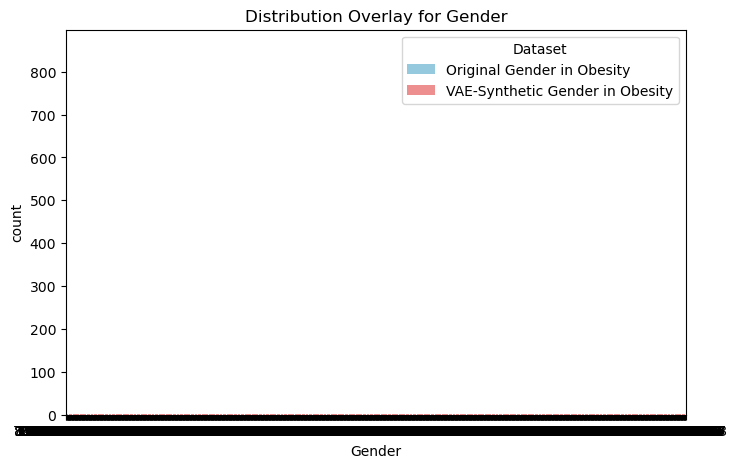

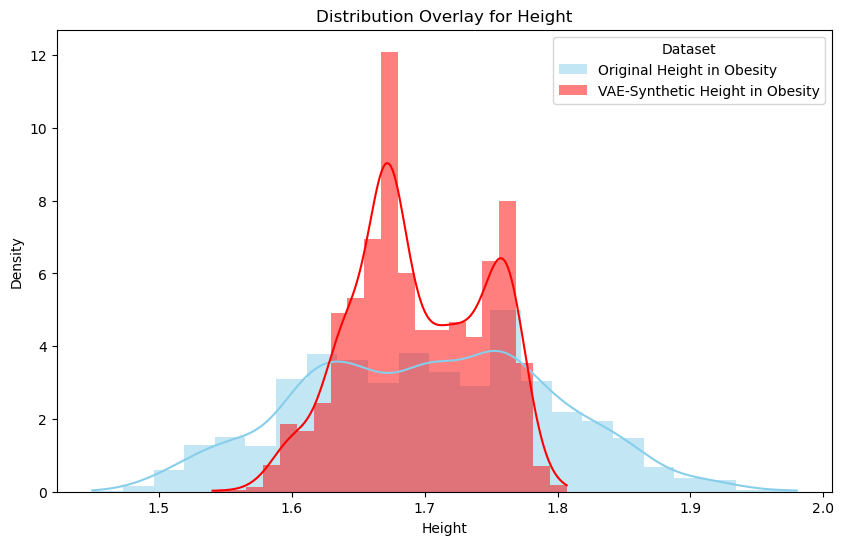

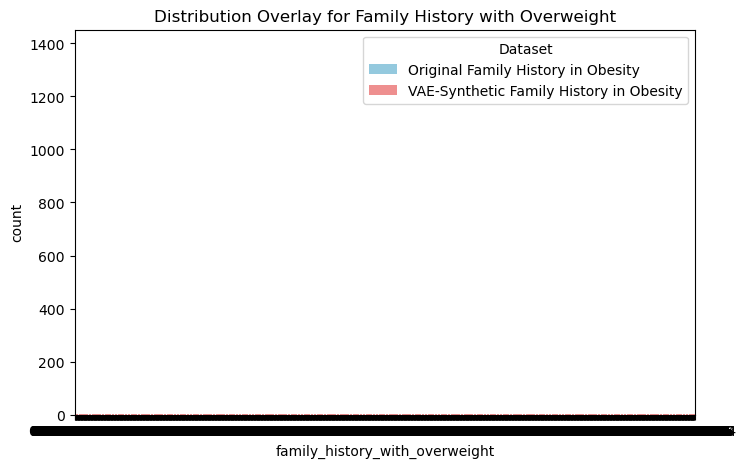

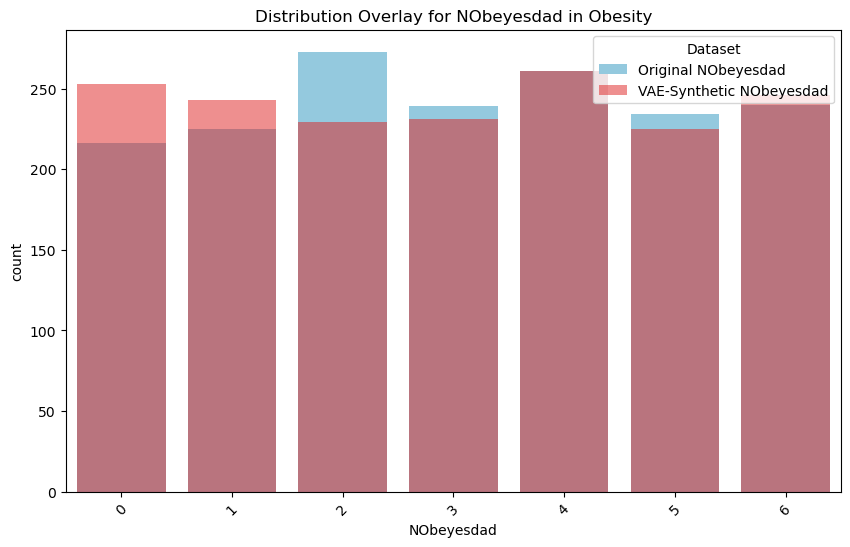

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender Distribution Overlay
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=obesity_train_dataframe, color="skyblue", label="Original Gender in Obesity")
sns.countplot(x='Gender', data=vae_synthetic_obesity_data_with_labels_df, color="red", alpha=0.5, label="VAE-Synthetic Gender in Obesity")
plt.legend(title='Dataset')
plt.title('Distribution Overlay for Gender')
plt.show()


# Height Distribution Overlay
plt.figure(figsize=(10, 6))
sns.histplot(obesity_train_dataframe['Height'], kde=True, color="skyblue", label="Original Height in Obesity", stat="density", linewidth=0)
sns.histplot(vae_synthetic_obesity_data_with_labels_df['Height'], kde=True, color="red", label="VAE-Synthetic Height in Obesity", stat="density", linewidth=0)
plt.legend(title='Dataset')
plt.title('Distribution Overlay for Height')
plt.show()


# Family History Distribution Overlay
plt.figure(figsize=(8, 5))
sns.countplot(x='family_history_with_overweight', data=obesity_train_dataframe, color="skyblue", label="Original Family History in Obesity")
sns.countplot(x='family_history_with_overweight', data=vae_synthetic_obesity_data_with_labels_df, color="red", alpha=0.5, label="VAE-Synthetic Family History in Obesity")
plt.legend(title='Dataset')
plt.title('Distribution Overlay for Family History with Overweight')
plt.show()


# NObeyesdad Distribution Overlay
plt.figure(figsize=(10, 6))
order = sorted(obesity_train_dataframe['NObeyesdad'].unique())
sns.countplot(x='NObeyesdad', data=obesity_train_dataframe, color="skyblue", label="Original NObeyesdad", order=order)
sns.countplot(x='NObeyesdad', data=vae_synthetic_obesity_data_with_labels_df, color="red", alpha=0.5, label="VAE-Synthetic NObeyesdad", order=order)
plt.legend(title='Dataset')
plt.title('Distribution Overlay for NObeyesdad in Obesity')
plt.xticks(rotation=45)
plt.show()


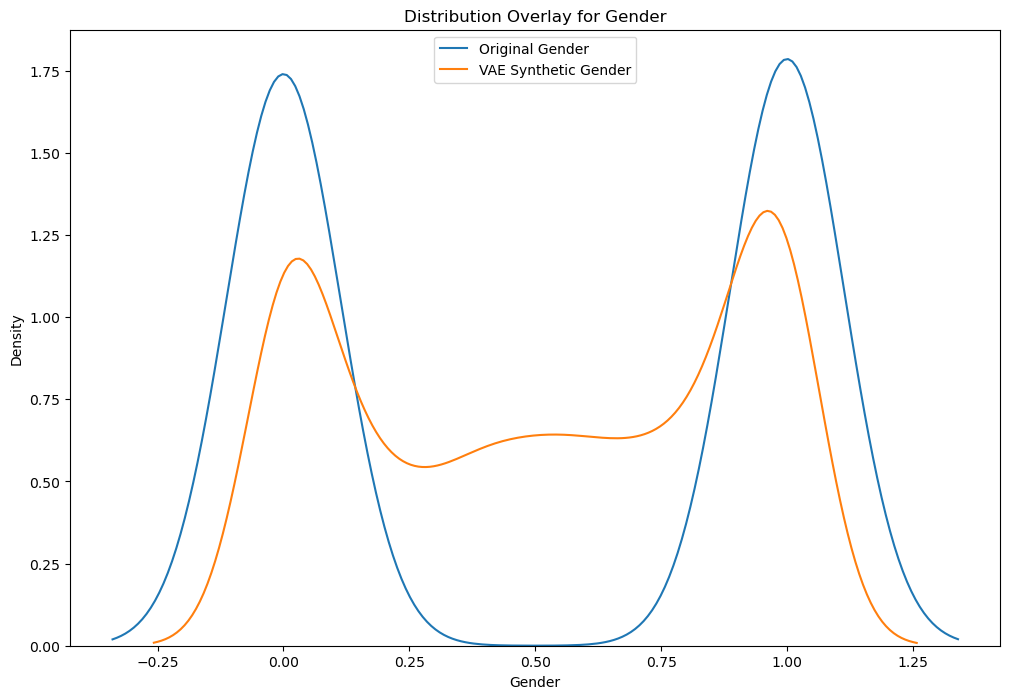

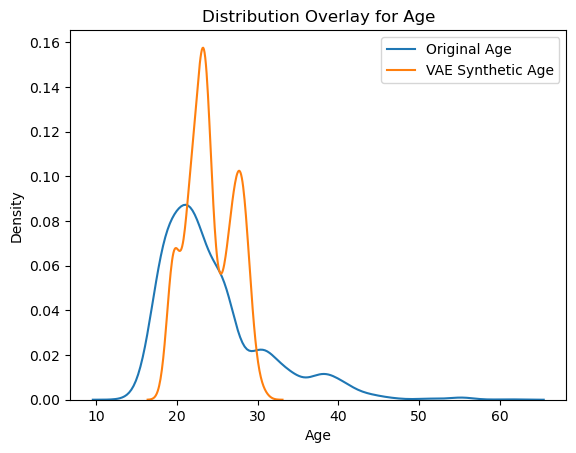

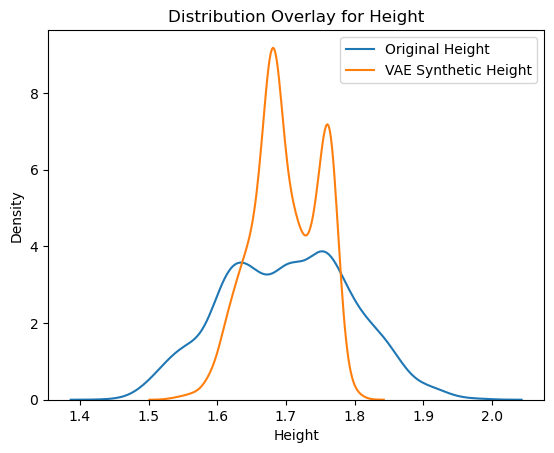

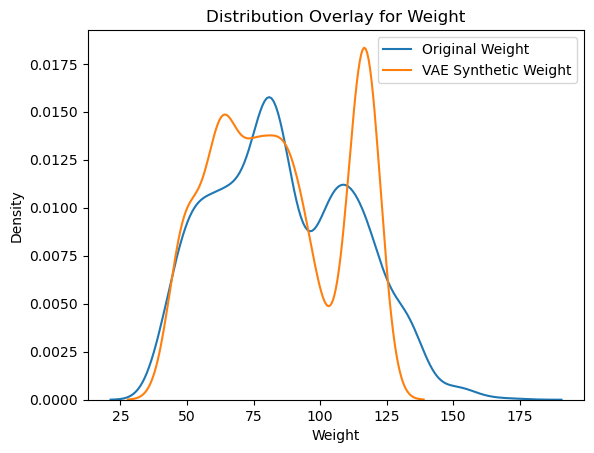

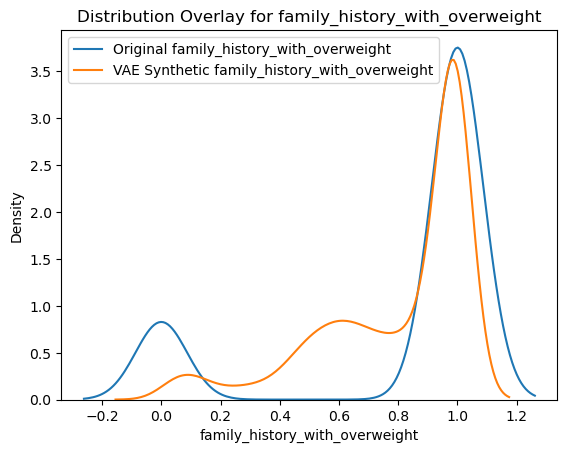

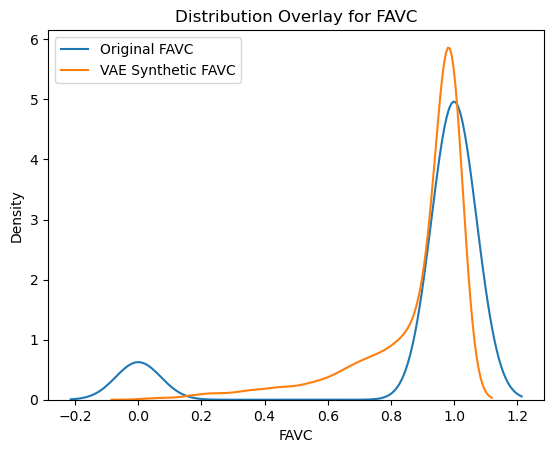

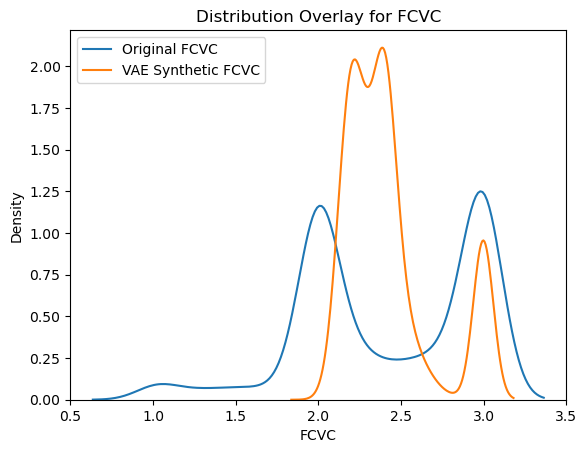

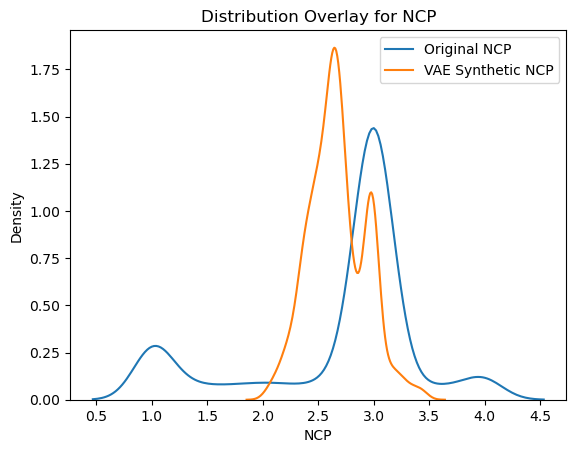

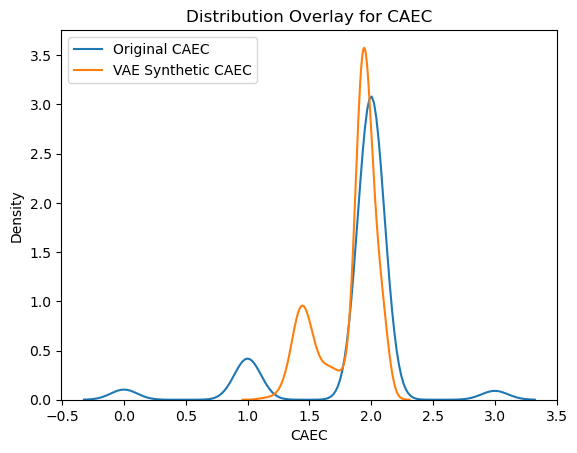

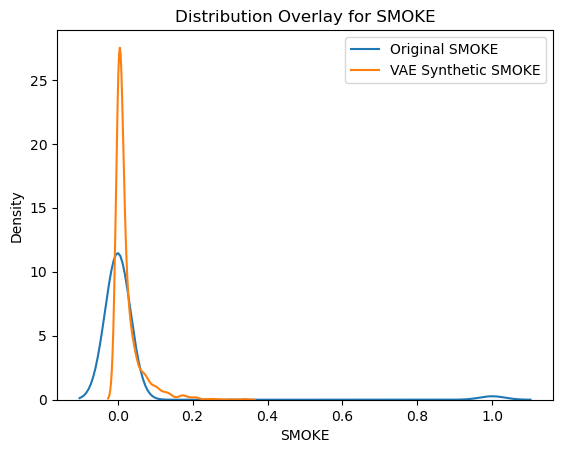

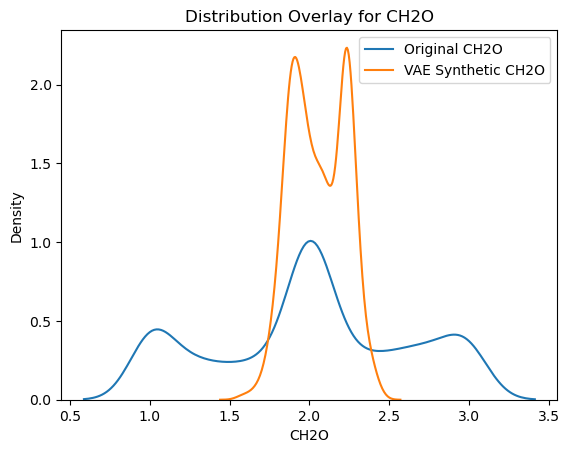

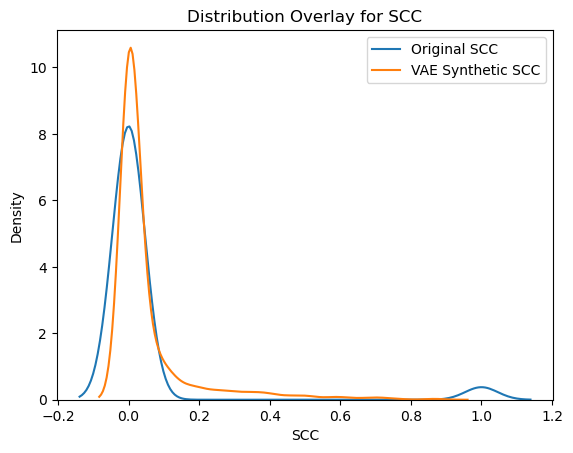

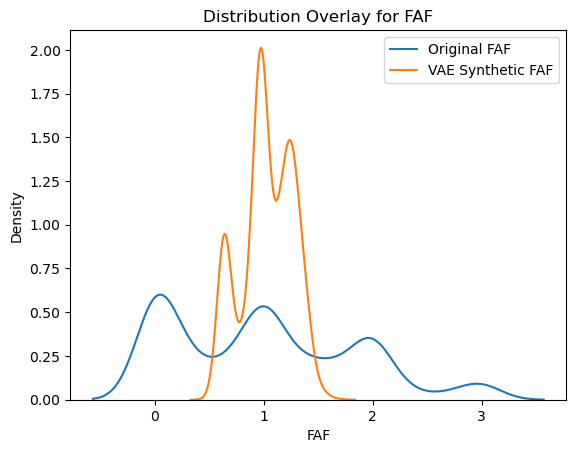

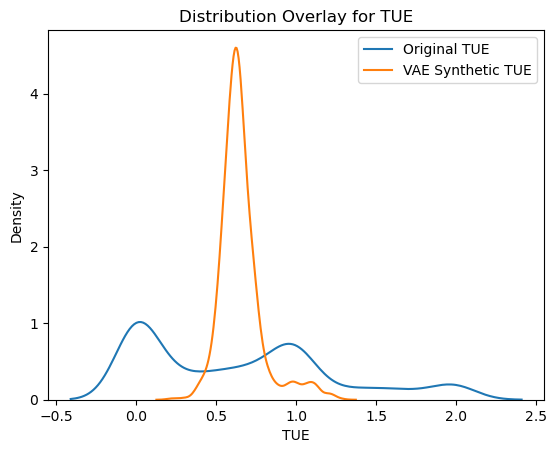

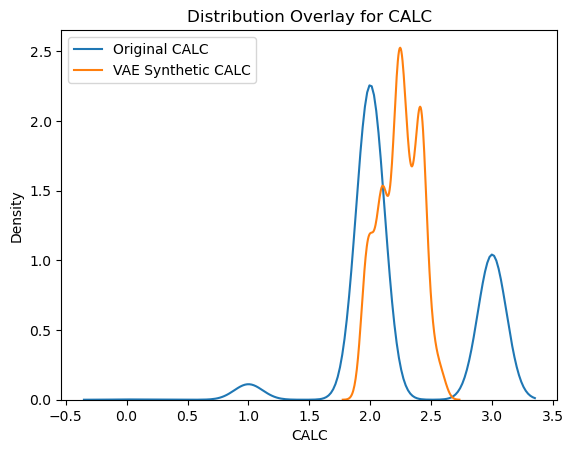

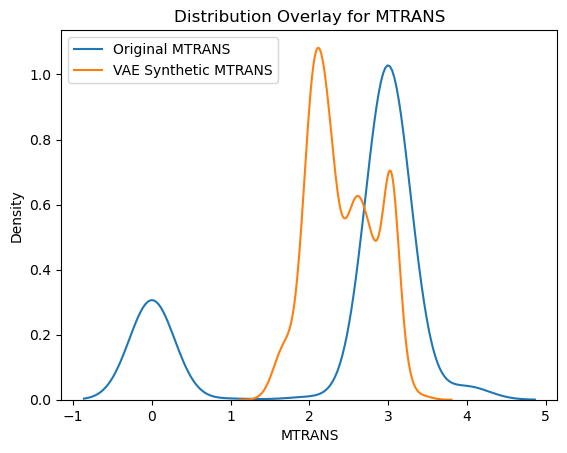

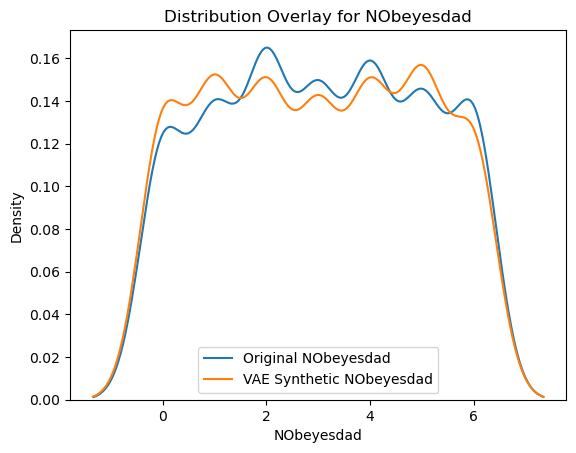

NameError: name 'error_metrics' is not defined

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
ks_stats = [0.5065, 0.2274, 0.2050, 0.1072, 0.8193, 0.8880, 0.4058, 0.5823, 0.6783, 0.9769, 0.2731, 0.9562, 0.3495, 0.4135, 0.6013, 0.6161, 0.0272]
p_values = [1.91e-197, 1.09e-38, 1.94e-31, 7.21e-09, 0.0, 0.0, 1.15e-124, 2.40e-265, 0.0, 0.0, 8.68e-56, 0.0, 7.07e-92, 1.41e-129, 2.97e-284, 1.34e-299, 0.5578]

# Visual Representation: Distribution Overlay for Features
plt.figure(figsize=(12, 8))
for feature in features:
    sns.kdeplot(obesity_train_dataframe[feature], label=f'Original {feature}')
    sns.kdeplot(vae_synthetic_obesity_data_with_labels_df[feature], label=f'VAE Synthetic {feature}')
    plt.legend()
    plt.title(f'Distribution Overlay for {feature}')
    plt.show()

# Error Metrics by Features
# Assuming 'error_metrics' is a DataFrame containing MSE, RMSE, and MAE for each feature
error_metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Error Metrics by Features')
plt.ylabel('Metric Value')
plt.xticks(np.arange(len(features)), labels=features, rotation=45)
plt.legend()
plt.show()

# KS-Test Results by Features
plt.figure(figsize=(12, 8))
sns.barplot(x=features, y=ks_stats)
plt.title('KS-Test Statistic by Features')
plt.xticks(rotation=45)
plt.ylabel('KS Statistic')
plt.show()

# Display P-values in a scatter plot or color-coded chart if needed


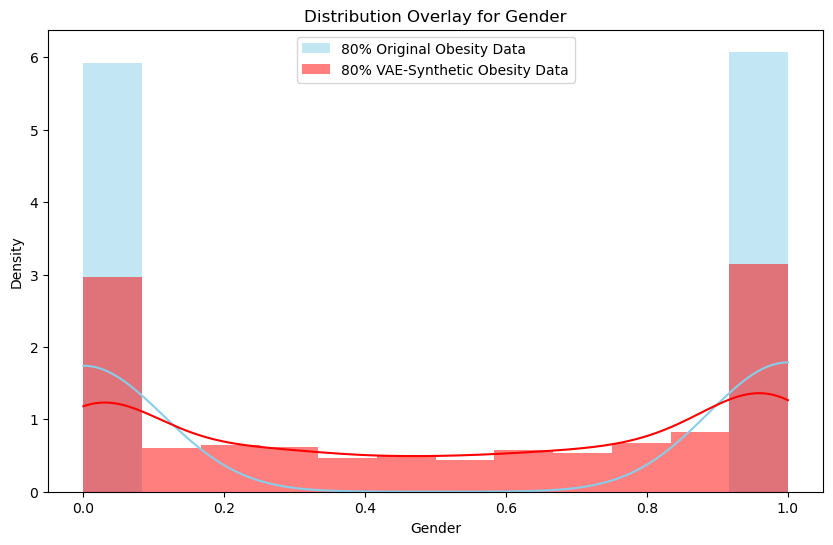

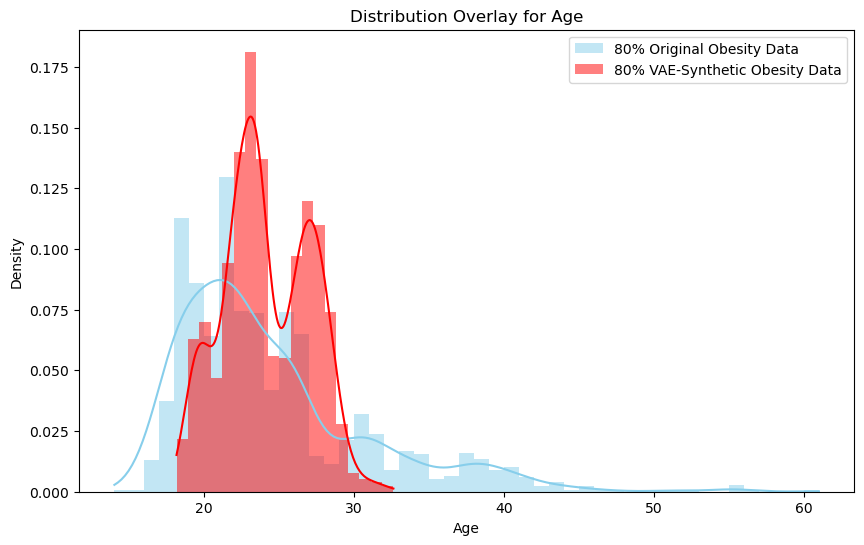

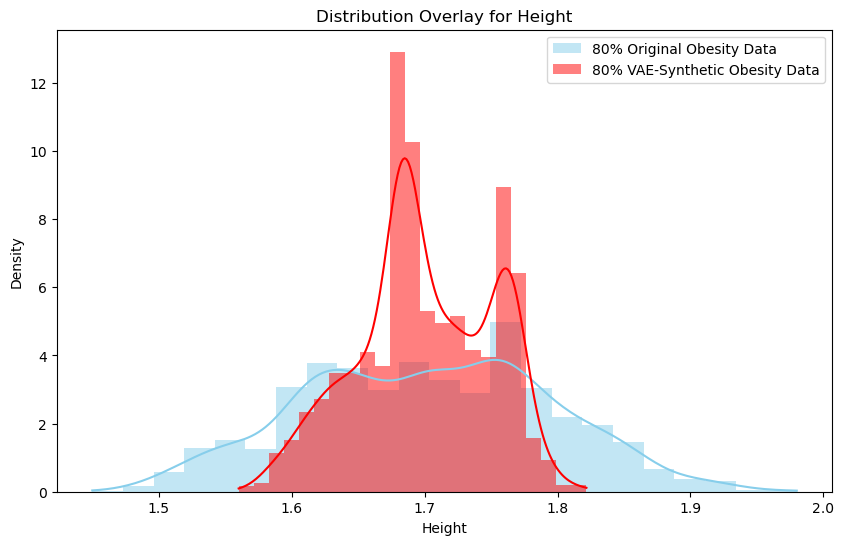

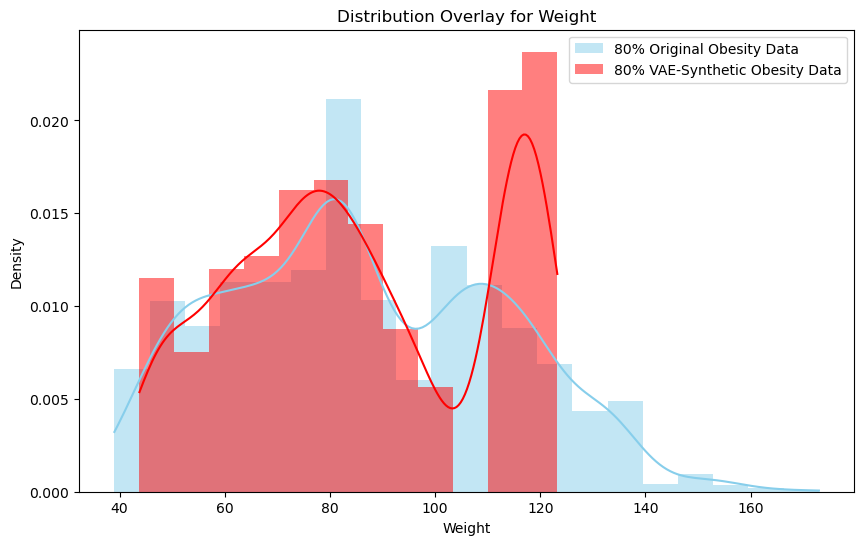

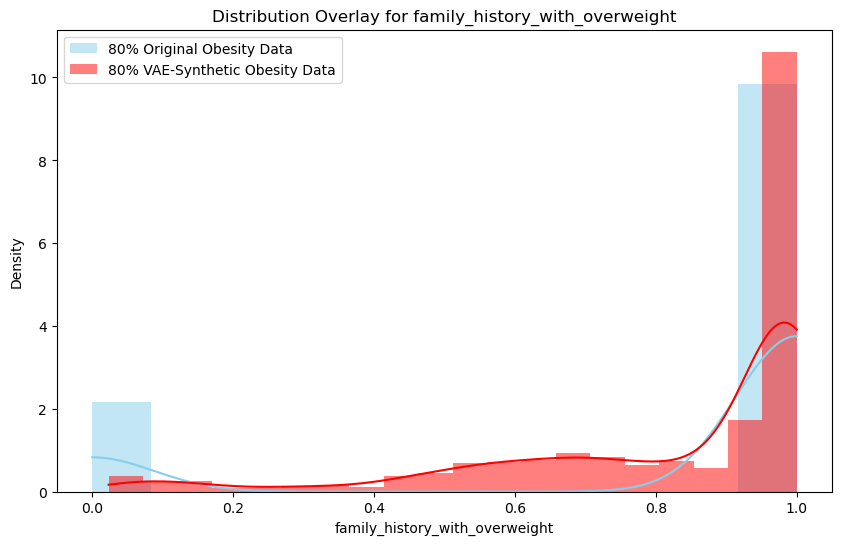

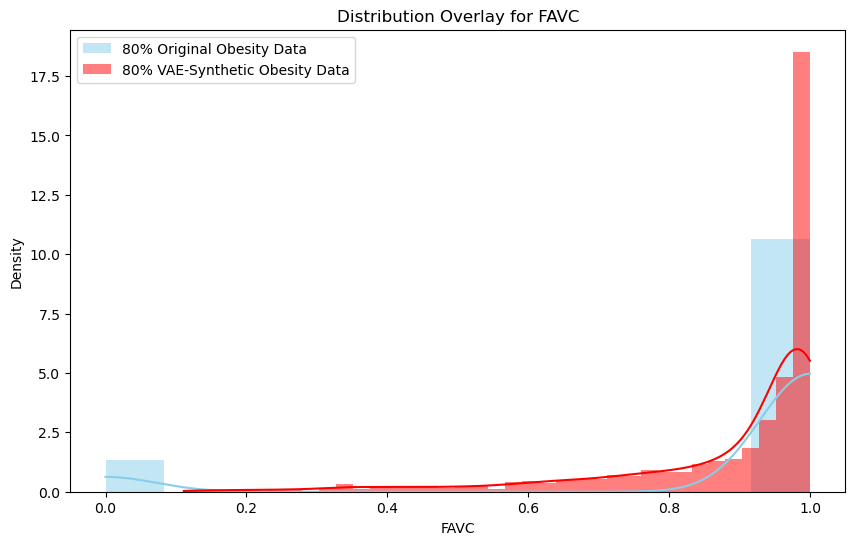

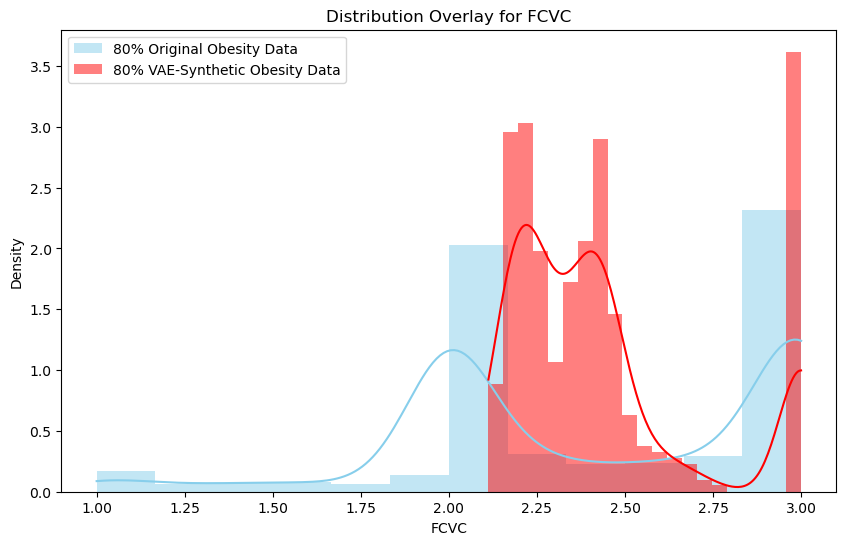

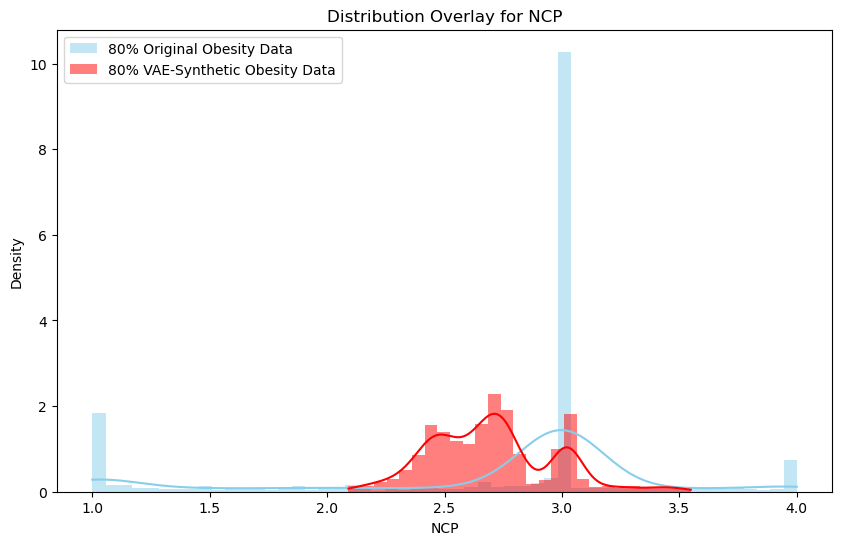

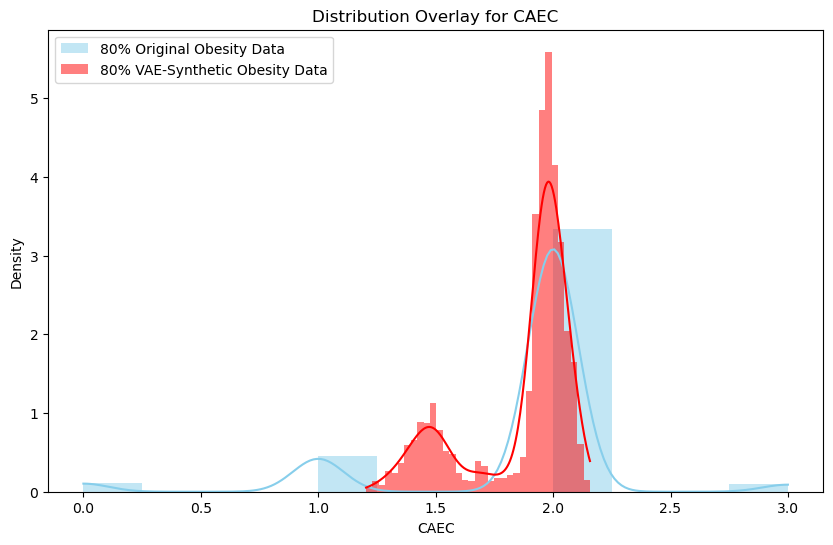

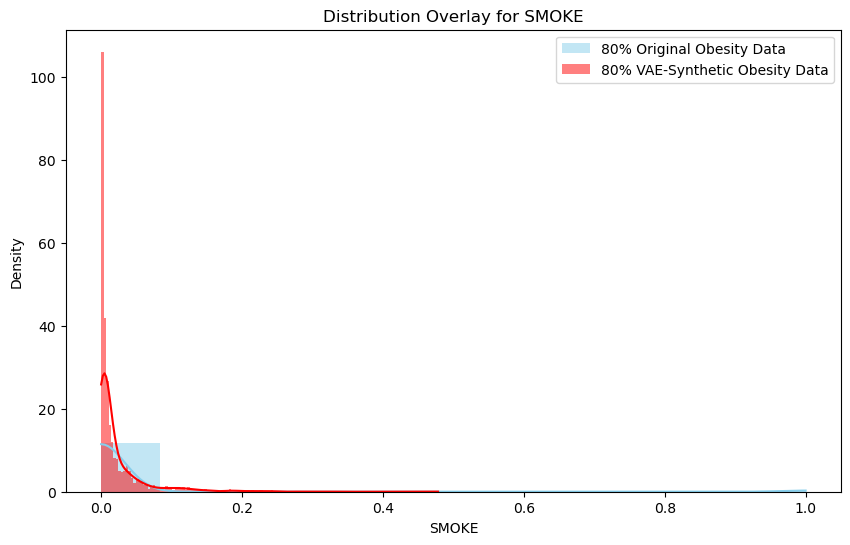

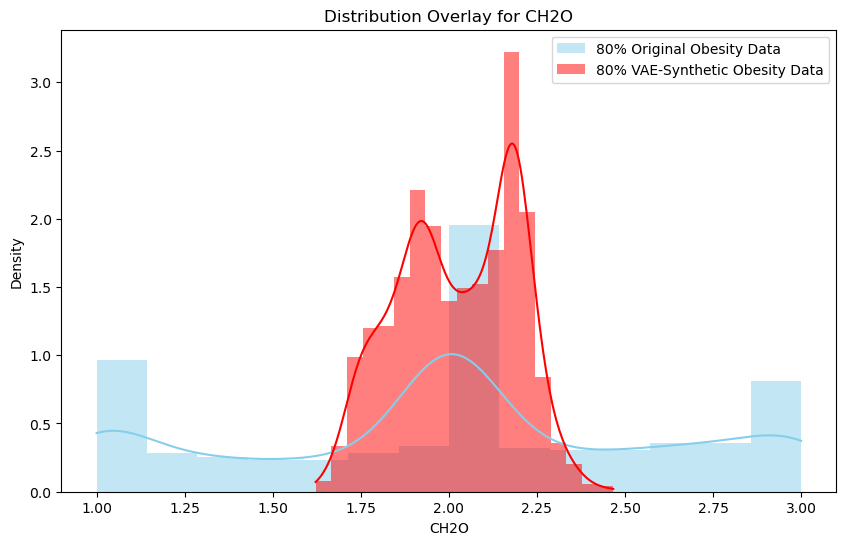

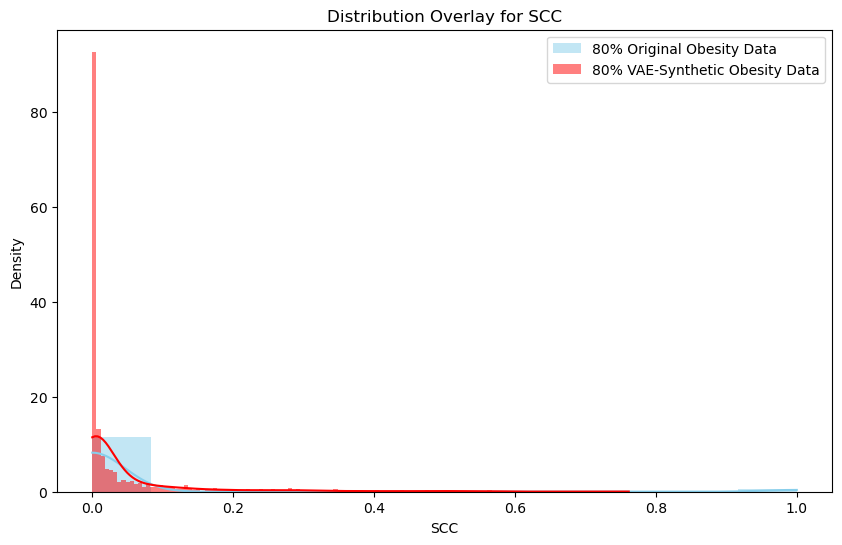

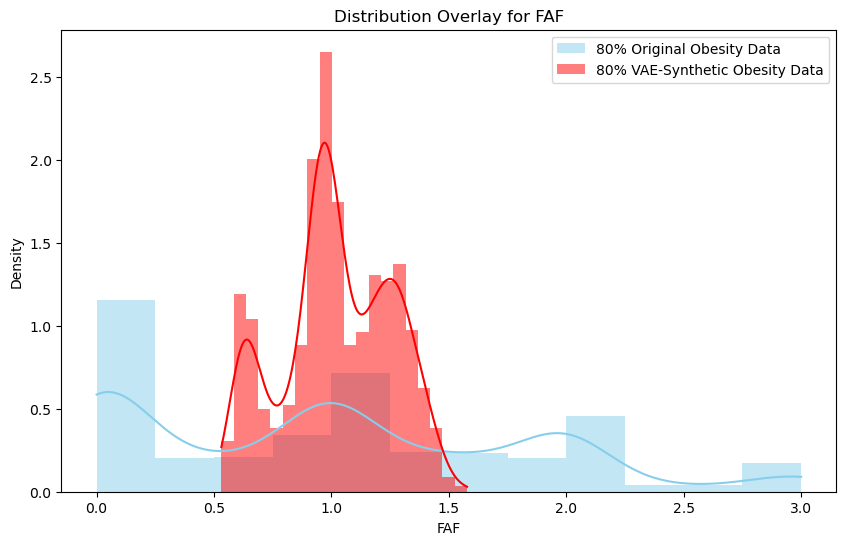

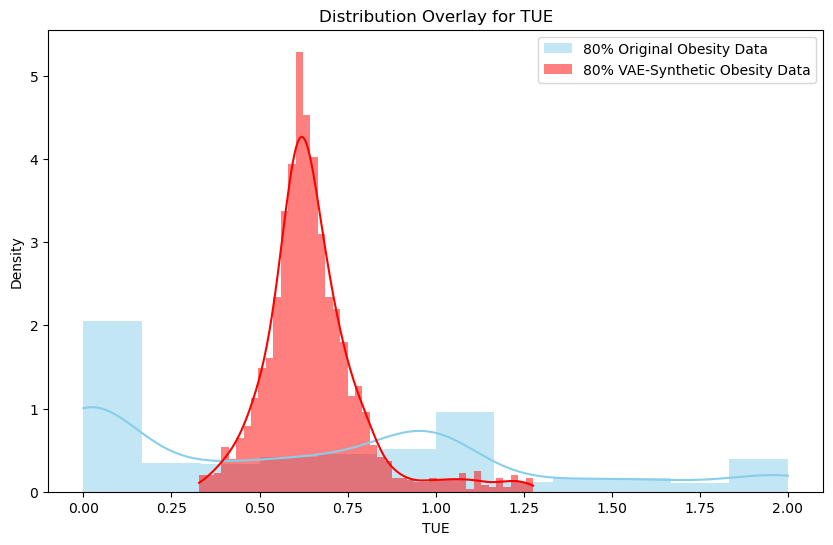

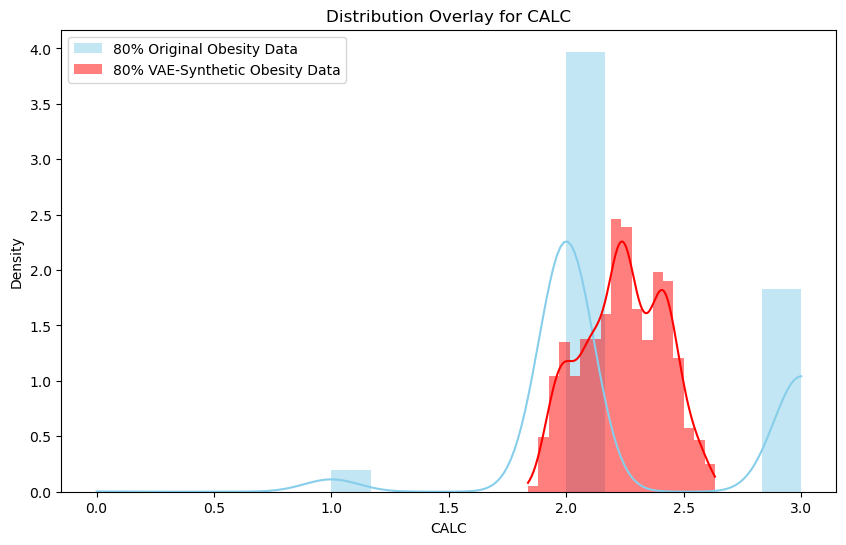

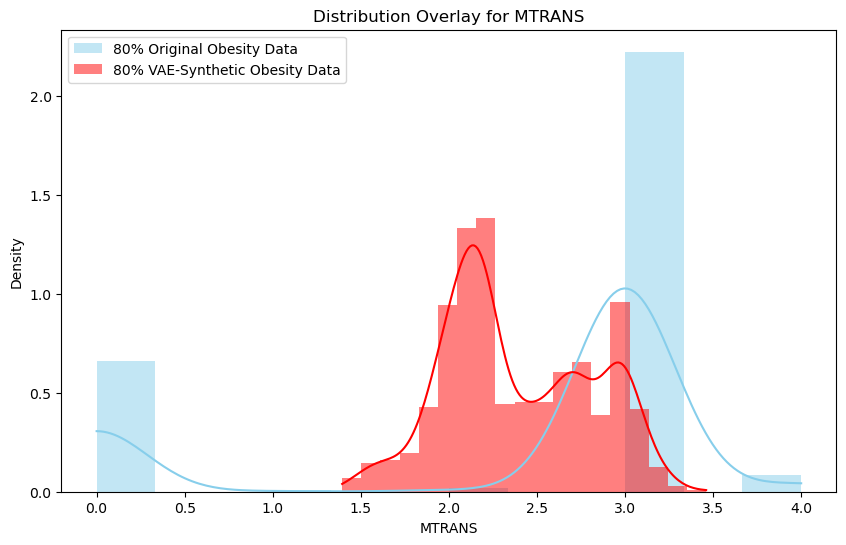

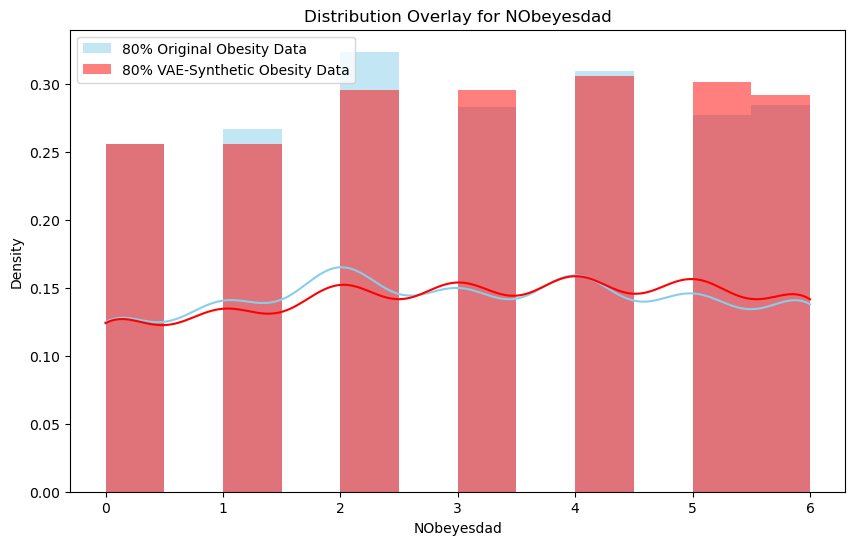

In [15]:
# Features and their respective statistics based on our results
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 
            'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 
            'CALC', 'MTRANS', 'NObeyesdad']
ks_stats = [0.5065165876777251, 0.22748815165876776, 0.20497630331753555, 0.10722748815165876, 
            0.8193127962085308, 0.8880331753554502, 0.40580568720379145, 0.582345971563981, 
            0.6783175355450237, 0.9768957345971564, 0.2731042654028436, 0.9561611374407583, 
            0.3495260663507109, 0.41350710900473936, 0.601303317535545, 0.6161137440758294, 
            0.027251184834123223]
p_values = [1.9128328888759265e-197, 1.0974587169818741e-38, 1.9498819616854355e-31, 
            7.218555783612058e-09, 0.0, 0.0, 1.156355071104976e-124, 2.4045384001379328e-265, 
            0.0, 0.0, 8.687369733846809e-56, 0.0, 7.078489466467371e-92, 
            1.414474241839703e-129, 2.9772343550480754e-284, 1.3489550413202867e-299, 
            0.5578524575493959]
mse_values = [0.39245691783952313, 50.739621593256054, 0.010977074008564536, 1211.923807943407, 
              0.20785703431857505, 0.13296195084116105, 0.36092217377644076, 0.7035615026134873, 
              0.2834676858769643, 0.023897240348954837, 0.402768578338681, 0.057407736557548564, 
              0.7644186762454928, 0.3783868475415177, 0.29982255559209386, 1.8127728507896073, 
              7.890995260663507]
rmse_values = [np.sqrt(v) for v in mse_values]
mae_values = [0.4983201421732658, 5.3782867105447485, 0.08508910759406971, 28.247170109520646, 
              0.30175061542673204, 0.20471981423796637, 0.49819459846294095, 0.6411704342499684, 
              0.3323649341037488, 0.04579217666770238, 0.5128604814593736, 0.0930497426373467, 
              0.7263423595757957, 0.5161671680242236, 0.4420934806079096, 1.0363747561571157, 
              2.268957345971564]

# Creating DataFrame for visualization
df_stats = pd.DataFrame({
    'Feature': features,
    'KS Stat': ks_stats,
    'P-Value': p_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'MAE': mae_values
})


for feature in features:
    original_data = obesity_train_dataframe[feature]  # Replace with your actual original dataset
    synthetic_data = vae_synthetic_obesity_data_with_labels_df[feature]  # Replace with your VAE synthetic dataset

    plt.figure(figsize=(10, 6))
    sns.histplot(original_data, color="skyblue", label="80% Original Obesity Data", kde=True, stat="density", linewidth=0)
    sns.histplot(synthetic_data, color="red", label="80% VAE-Synthetic Obesity Data", kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution Overlay for {feature}')
    plt.legend()
    plt.show()


# COMPUTING CROSS-VALIDATION OF ORIGINAL AND SYNTHETIC DATASETS

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Encoding categorical labels if necessary
le = LabelEncoder()
vae_synthetic_labels_ae_encoded = le.fit_transform(vae_synthetic_labels_series)  # synthetic data
obesity_labels_encoded = le.transform(labels2)  # for original data

# Splitting the synthetic dataset
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# Splitting the original dataset
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, obesity_labels_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier on synthetic data
print("Evaluating VAE-Synthetic Obesity Dataset")
for clf in classifiers:
    cv_scores_syn = cross_val_score(clf, X_train_syn_vae, y_train_syn_vae, cv=5, scoring='accuracy')
    mean_cv_score_syn = np.mean(cv_scores_syn)
    std_cv_score_syn = np.std(cv_scores_syn)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy = {mean_cv_score_syn:.4f}, Std = {std_cv_score_syn:.4f}")

# Evaluate each classifier on original data
print("\nEvaluating Original Obesity Dataset")
for clf in classifiers:
    cv_scores_orig = cross_val_score(clf, X_train_orig_new, y_train_orig_new, cv=5, scoring='accuracy')
    mean_cv_score_orig = np.mean(cv_scores_orig)
    std_cv_score_orig = np.std(cv_scores_orig)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy = {mean_cv_score_orig:.4f}, Std = {std_cv_score_orig:.4f}")


Evaluating VAE-Synthetic Obesity Dataset
DecisionTreeClassifier: Mean CV Accuracy = 0.9941, Std = 0.0038
GradientBoostingClassifier: Mean CV Accuracy = 0.9963, Std = 0.0041
RandomForestClassifier: Mean CV Accuracy = 1.0000, Std = 0.0000


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy = 0.4689, Std = 0.0508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -1.934860
[LightGBM] [Info] Start training from score -1.994284
[LightGBM] [Info] Start training from score -1.987504
[LightGBM] [Info] Start training from score -1.947764
[LightGBM] [Info] Start training from score -1.960836
[LightGBM] [Info] Start training from score -1.825661
[LightGBM] [Info] Start training from score -1.980770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy = 0.9963, Std = 0.0047
KNeighborsClassifier: Mean CV Accuracy = 0.9889, Std = 0.0097


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy = 0.9963, Std = 0.0023
SVC: Mean CV Accuracy = 0.8963, Std = 0.0162
MLPClassifier: Mean CV Accuracy = 0.9993, Std = 0.0015

Evaluating Original Obesity Dataset
DecisionTreeClassifier: Mean CV Accuracy = 0.9200, Std = 0.0073
GradientBoostingClassifier: Mean CV Accuracy = 0.9452, Std = 0.0059
RandomForestClassifier: Mean CV Accuracy = 0.9422, Std = 0.0121


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy = 0.3422, Std = 0.0266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -2.072061
[LightGBM] [Info] Start training from score -2.001110
[LightGBM] [Info] Start training from score -1.814232
[LightGBM] [Info] Start training from score -1.980770
[LightGBM] [Info] Start training from score -1.825661
[LightGBM] [Info] Start training from score -1.994284
[LightGBM] [Info] Start training from score -1.960836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy = 0.9533, Std = 0.0127
KNeighborsClassifier: Mean CV Accuracy = 0.8378, Std = 0.0201


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy = 0.7881, Std = 0.0290
SVC: Mean CV Accuracy = 0.5481, Std = 0.0318
MLPClassifier: Mean CV Accuracy = 0.7778, Std = 0.0395


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
vae_synthetic_labels_ae_encoded = le.fit_transform(vae_synthetic_labels_series)

# Splitting the dataset
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_syn_vae, y_train_syn_vae, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for VAE-Synthetic Obesity = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 0.9941, Std = 0.0038
GradientBoostingClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 0.9963, Std = 0.0041
RandomForestClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 1.0000, Std = 0.0000


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 0.4689, Std = 0.0508
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -1.934860
[LightGBM] [Info] Start training from score -1.994284
[LightGBM] [Info] Start training from score -1.987504
[LightGBM] [Info] Start training from score -1.947764
[LightGBM] [Info] Start training from score -1.960836
[LightGBM] [Info] Start training from score -1.825661
[LightGBM] [Info] Start training from score -1.980770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 0.9963, Std = 0.0047
KNeighborsClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 0.9889, Std = 0.0097


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy for VAE-Synthetic Obesity = 0.9963, Std = 0.0023
SVC: Mean CV Accuracy for VAE-Synthetic Obesity = 0.8963, Std = 0.0162
MLPClassifier: Mean CV Accuracy for VAE-Synthetic Obesity = 0.9993, Std = 0.0015


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Encoding categorical labels if necessary
le = LabelEncoder()
original_labels_ae_encoded = le.fit_transform(labels2)

# Splitting the dataset
X_train_orig_new, X_test_orig_new, y_train_orig_new, y_test_orig_new = train_test_split(features2, original_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_orig_new, y_train_orig_new, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for Original Obesity Data= {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for Original Obesity Data= 0.9200, Std = 0.0073
GradientBoostingClassifier: Mean CV Accuracy for Original Obesity Data= 0.9452, Std = 0.0059
RandomForestClassifier: Mean CV Accuracy for Original Obesity Data= 0.9422, Std = 0.0121


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for Original Obesity Data= 0.3422, Std = 0.0266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2059
[LightGBM] [Info] Number of data points in the train set: 1080, number of used features: 16
[LightGBM] [Info] Start training from score -2.072061
[LightGBM] [Info] Start training from score -2.001110
[LightGBM] [Info] Start training from score -1.814232
[LightGBM] [Info] Start training from score -1.980770
[LightGBM] [Info] Start training from score -1.825661
[LightGBM] [Info] Start training from score -1.994284
[LightGBM] [Info] Start training from score -1.960836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

XGBClassifier: Mean CV Accuracy for Original Obesity Data= 0.9533, Std = 0.0127
KNeighborsClassifier: Mean CV Accuracy for Original Obesity Data= 0.8378, Std = 0.0201


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

LogisticRegression: Mean CV Accuracy for Original Obesity Data= 0.7881, Std = 0.0290
SVC: Mean CV Accuracy for Original Obesity Data= 0.5481, Std = 0.0318
MLPClassifier: Mean CV Accuracy for Original Obesity Data= 0.7778, Std = 0.0395


# GRAPHICAL REPRESENTATION OF THE ABOVE MEAN CV OF ORIGINAL AND SYNTHETIC DATASETS

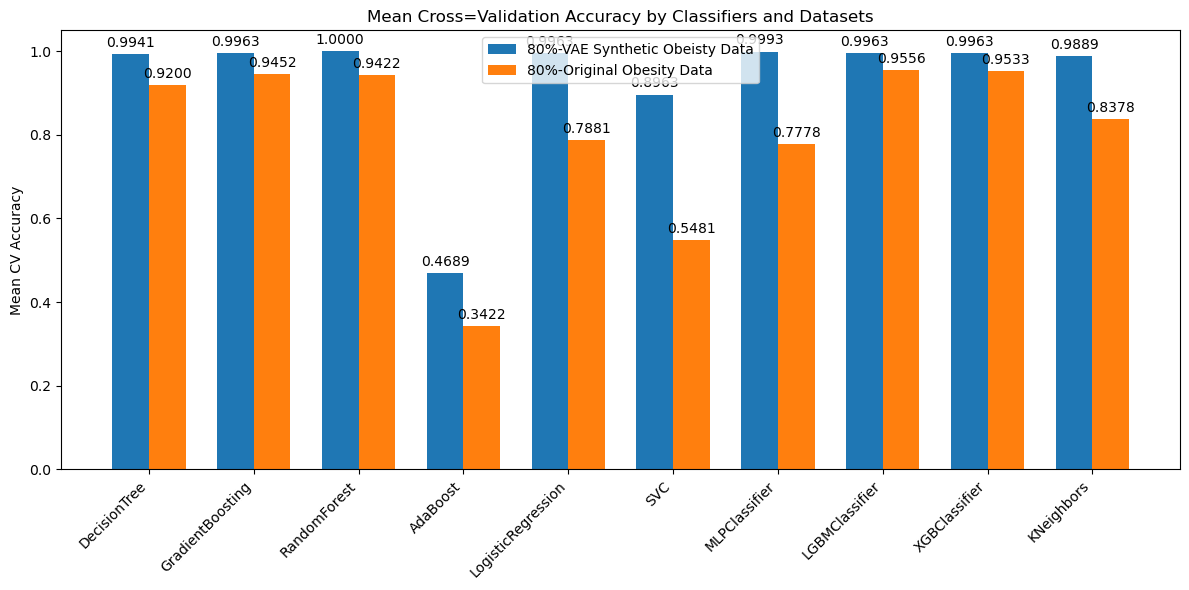

In [17]:
# Re-importing matplotlib and numpy due to execution environment reset
import matplotlib.pyplot as plt
import numpy as np

# Updated classifier names and their accuracies for both datasets
classifiers_updated = ['DecisionTree', 'GradientBoosting', 'RandomForest', 'AdaBoost', 'LogisticRegression', 'SVC', 'MLPClassifier', 'LGBMClassifier', 'XGBClassifier', 'KNeighbors']
vae_accuracies_complete = [0.9941, 0.9963, 1.0000, 0.4689, 0.9963, 0.8963, 0.9993, 0.9963, 0.9963, 0.9889]
original_accuracies_complete = [0.9200, 0.9452, 0.9422, 0.3422, 0.7881, 0.5481, 0.7778, 0.9556, 0.9533, 0.8378]

# Setting up the figure for plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Bar width
x = np.arange(len(classifiers_updated))  # Label locations

# Plotting both datasets
bars1 = ax.bar(x - width/2, vae_accuracies_complete, width, label='80%-VAE Synthetic Obeisty Data')
bars2 = ax.bar(x + width/2, original_accuracies_complete, width, label='80%-Original Obesity Data')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('Mean Cross=Validation Accuracy by Classifiers and Datasets')
ax.set_xticks(x)
ax.set_xticklabels(classifiers_updated, rotation=45, ha='right')
ax.legend()

# Labeling the bars with their heights for clarity
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()


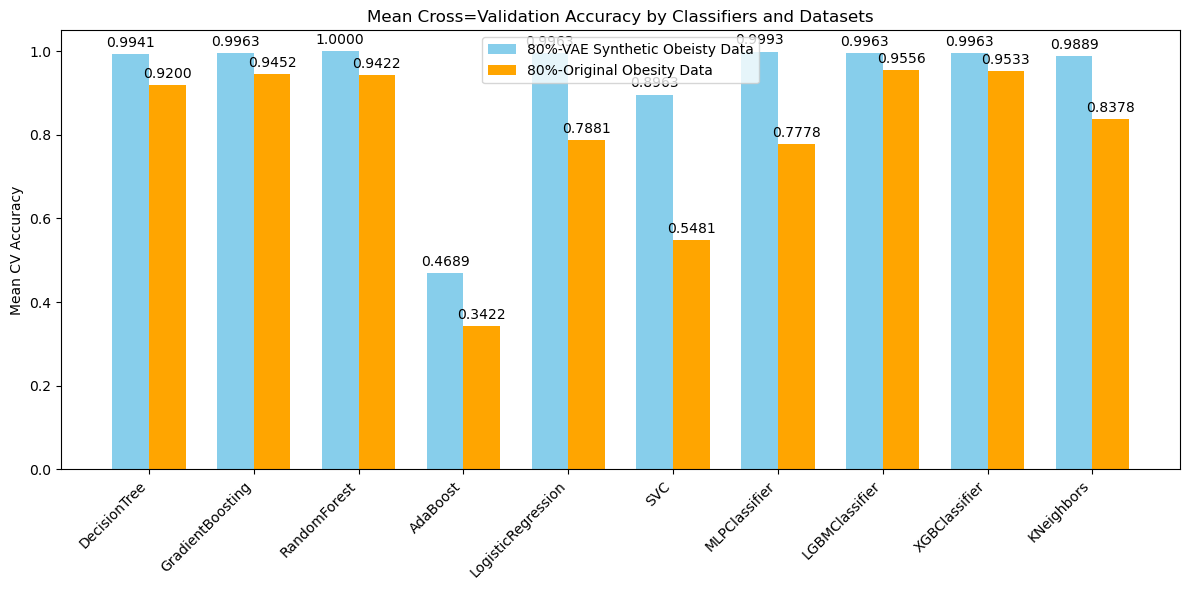

In [25]:
# Re-importing matplotlib and numpy due to execution environment reset
import matplotlib.pyplot as plt
import numpy as np

# Updated classifier names and their accuracies for both datasets
classifiers_updated = ['DecisionTree', 'GradientBoosting', 'RandomForest', 'AdaBoost', 'LogisticRegression', 'SVC', 'MLPClassifier', 'LGBMClassifier', 'XGBClassifier', 'KNeighbors']
vae_accuracies_complete = [0.9941, 0.9963, 1.0000, 0.4689, 0.9963, 0.8963, 0.9993, 0.9963, 0.9963, 0.9889]
original_accuracies_complete = [0.9200, 0.9452, 0.9422, 0.3422, 0.7881, 0.5481, 0.7778, 0.9556, 0.9533, 0.8378]

# Setting up the figure for plotting
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # Bar width
x = np.arange(len(classifiers_updated))  # Label locations

# Plotting both datasets
bars1 = ax.bar(x - width/2, vae_accuracies_complete, width, label='80%-VAE Synthetic Obeisty Data', color='skyblue')
bars2 = ax.bar(x + width/2, original_accuracies_complete, width, label='80%-Original Obesity Data', color='orange')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('Mean Cross=Validation Accuracy by Classifiers and Datasets')
ax.set_xticks(x)
ax.set_xticklabels(classifiers_updated, rotation=45, ha='right')
ax.legend()

# Labeling the bars with their heights for clarity
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()


# CORRELATION HEATMAP

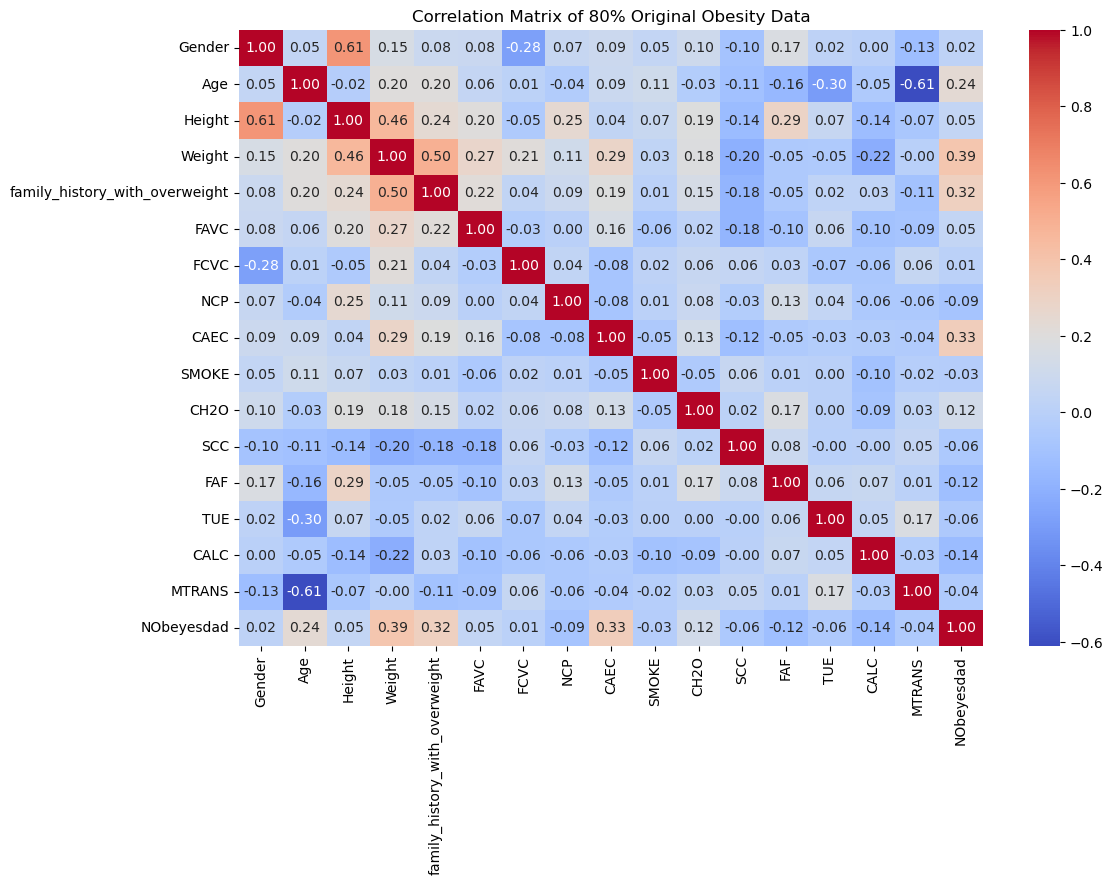

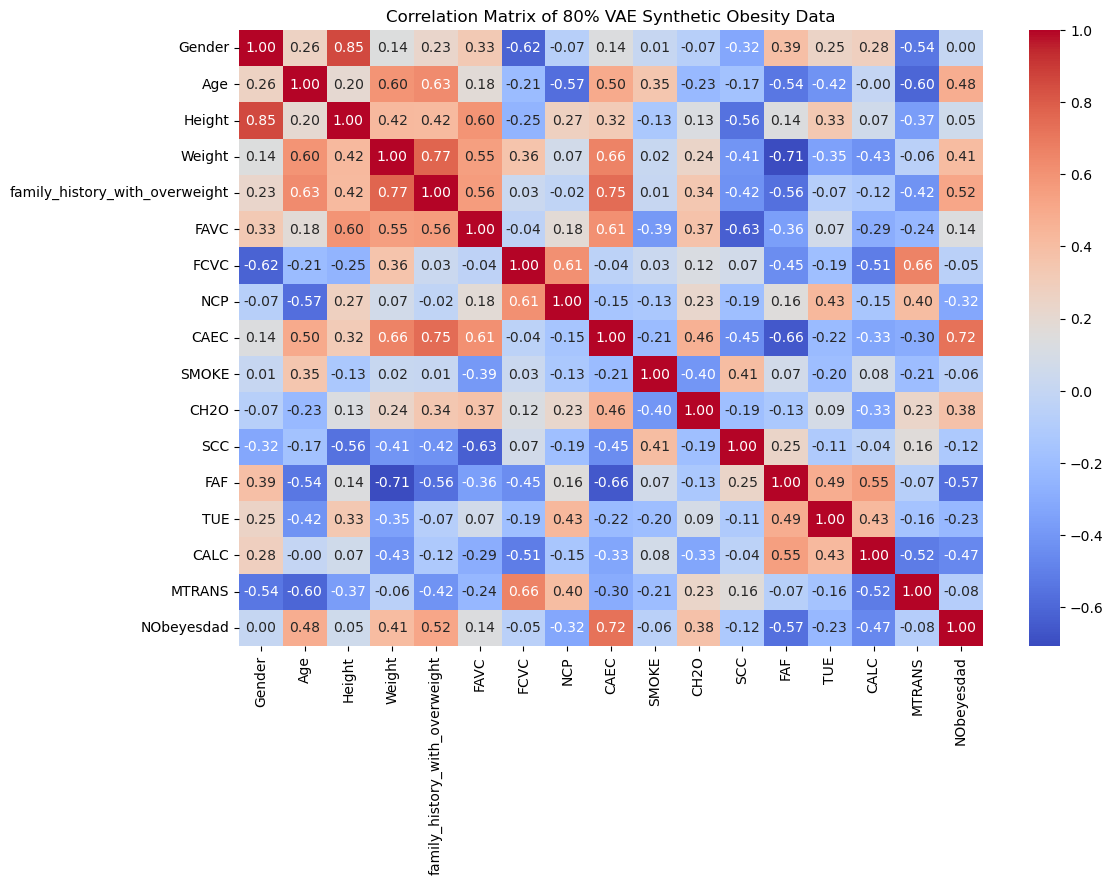

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_correlation_matrix(data, title):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()


# Plot correlation matrix for original data
plot_correlation_matrix(obesity_train_dataframe, "Correlation Matrix of 80% Original Obesity Data")

# Plot correlation matrix for synthetic data
plot_correlation_matrix(vae_synthetic_obesity_data_with_labels_df, "Correlation Matrix of 80% VAE Synthetic Obesity Data")


# Computing Numerical Correlation Matrices of Original and Synthetic Datasets

In [20]:
# For the original dataset
print('80% Original Obesity Numerical Correlation Matrix:')
print(obesity_train_dataframe.corr())

# For the AE synthetic dataset
print('80% VAE-Synthetic Obesity Numerical Correlation Matrix:')
print(vae_synthetic_obesity_data_with_labels_df.corr())


80% Original Obesity Numerical Correlation Matrix:
                                  Gender       Age    Height    Weight  \
Gender                          1.000000  0.046235  0.611942  0.154033   
Age                             0.046235  1.000000 -0.019937  0.202307   
Height                          0.611942 -0.019937  1.000000  0.462794   
Weight                          0.154033  0.202307  0.462794  1.000000   
family_history_with_overweight  0.084653  0.201558  0.243760  0.496725   
FAVC                            0.077906  0.055623  0.204282  0.271688   
FCVC                           -0.281415  0.012487 -0.050780  0.208799   
NCP                             0.068170 -0.036081  0.247588  0.114597   
CAEC                            0.088335  0.085702  0.043209  0.288039   
SMOKE                           0.049262  0.106354  0.070718  0.030947   
CH2O                            0.103245 -0.028330  0.194362  0.182809   
SCC                            -0.101180 -0.108534 -0.143624 

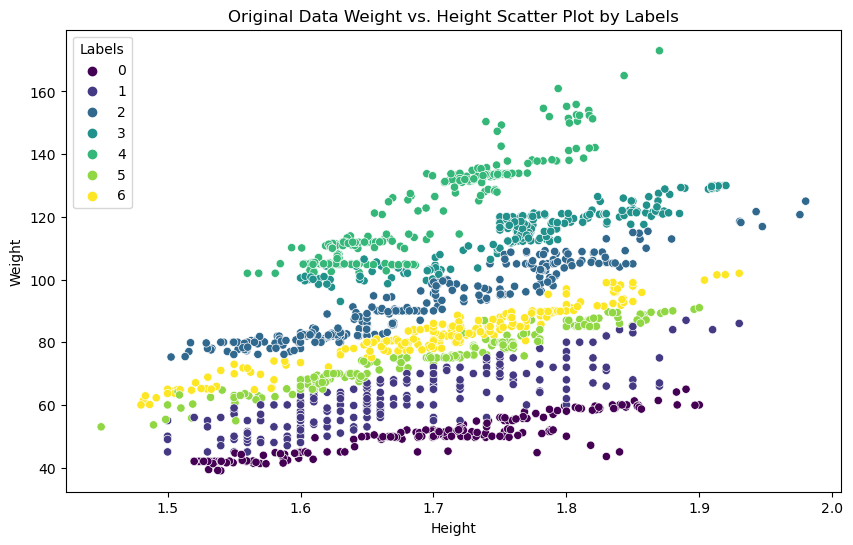

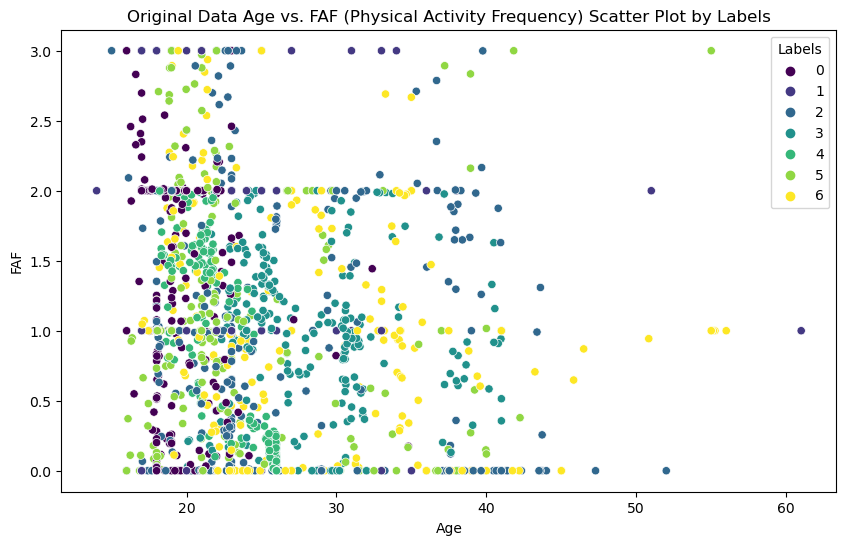

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Weight vs. Height with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_train_dataframe, x='Height', y='Weight', hue='NObeyesdad', palette='viridis')
plt.title('Original Data Weight vs. Height Scatter Plot by Labels')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Labels')
plt.show()

# Plot for Age vs. FAF with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_train_dataframe, x='Age', y='FAF', hue='NObeyesdad', palette='viridis')
plt.title('Original Data Age vs. FAF (Physical Activity Frequency) Scatter Plot by Labels')
plt.xlabel('Age')
plt.ylabel('FAF')
plt.legend(title='Labels')
plt.show()


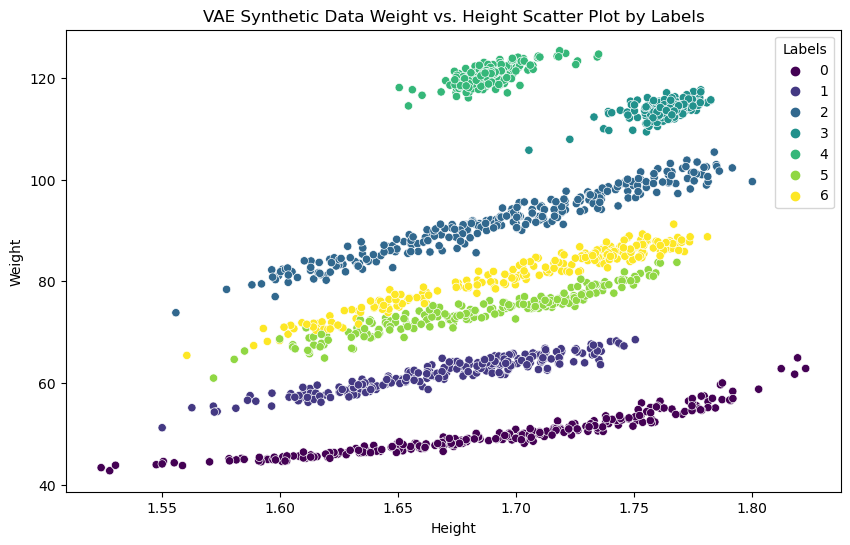

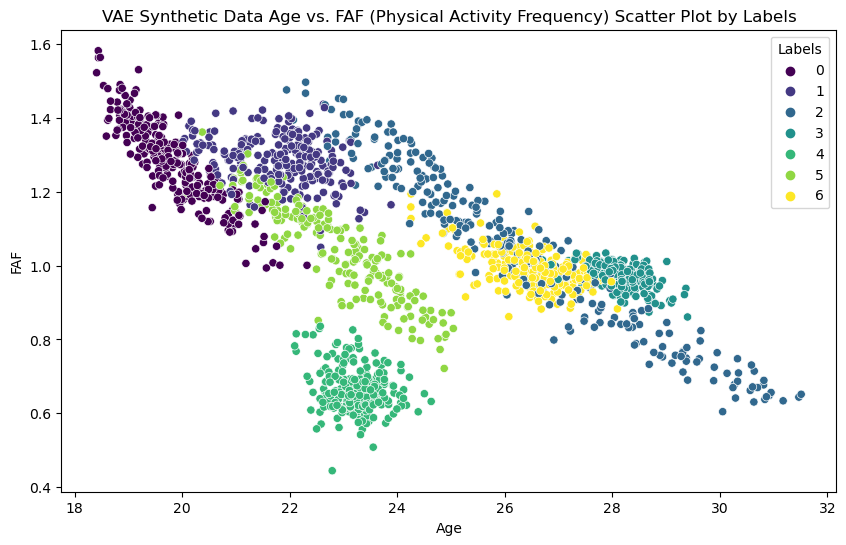

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Weight vs. Height with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vae_synthetic_obesity_data_with_labels_df, x='Height', y='Weight', hue='NObeyesdad', palette='viridis')
plt.title('VAE Synthetic Data Weight vs. Height Scatter Plot by Labels')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Labels')
plt.show()

# Plot for Age vs. FAF with Labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vae_synthetic_obesity_data_with_labels_df, x='Age', y='FAF', hue='NObeyesdad', palette='viridis')
plt.title('VAE Synthetic Data Age vs. FAF (Physical Activity Frequency) Scatter Plot by Labels')
plt.xlabel('Age')
plt.ylabel('FAF')
plt.legend(title='Labels')
plt.show()


# INSTALL THE PRIVACY ASSESSMENT TOOL KITS KNOWN AS ANONYMETER AS MENTIONED ABOVE IN STEP 2

In [ ]:
!pip install anonymeter

# IMPORTING THE INSTALLED ANONYMETER'S PRIVACY RISK EVALUATORS FOR PRIVACY PRESERVATION ASSESSMENT ON THE GENERATED SYNTHETIC DATASET
For more detailed information on the usage of this tool do visit the author's website(blogger) via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [29]:
import pandas as pd
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

# STEP 3A: SINGLING OUT UNIVARIATE RISK ASSESSMENT ON 80% VAE SYNTHETIC OBESITY DISEASE DATA

In [45]:
singling_out_evaluatorV = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                              syn=vae_synthetic_obesity_data_with_labels_df, 
                                              control=control_dataframe,
                                              n_attacks=1500)

try:
    singling_out_evaluatorV.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out_evaluatorV.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [46]:
res = singling_out_evaluatorV.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=1500:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=1500:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [81]:
singling_out_evaluatorVs = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                              syn=vae_synthetic_obesity_data_with_labels_df, 
                                              control=control_dataframe,
                                              n_attacks=500)

try:
    singling_out_evaluatorVs.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_out_evaluatorVs.risk()
    print("Singling Out Risk:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [84]:
rese = singling_out_evaluatorVs.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=500:")
print("Successs rate of main attack:", rese.attack_rate)
print("Successs rate of baseline attack:", rese.baseline_rate)
print("Successs rate of control attack:", rese.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=500:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

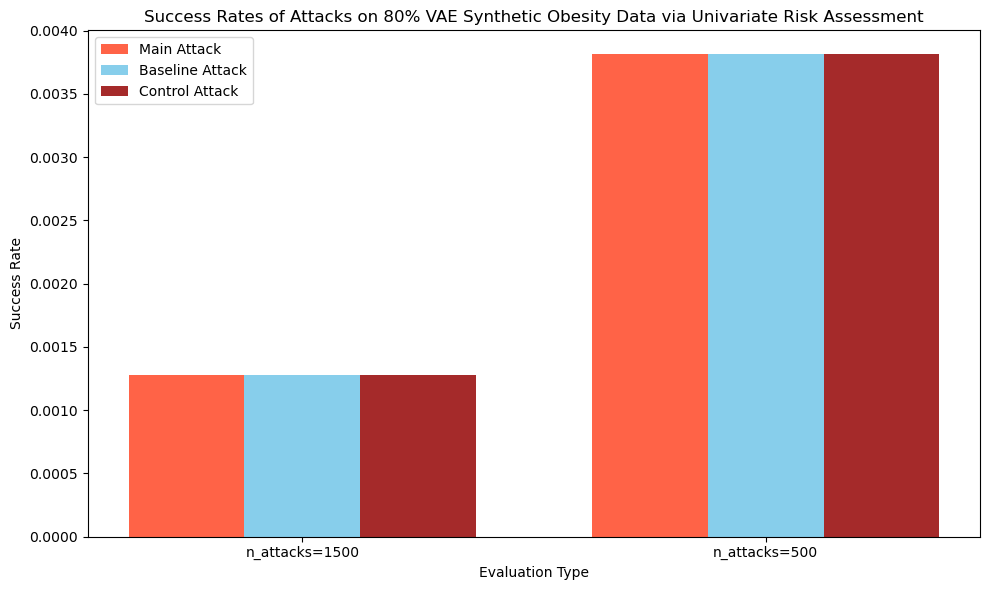

In [92]:
# Singling out risk data in univariate mode
data_singling_out_univariate = [
    ('n_attacks=1500', 0.001277215360090744),
    ('n_attacks=500', 0.0038121702307761206)
]

# Convert to DataFrame
df_singling_out_univariate = pd.DataFrame(data_singling_out_univariate, columns=['Evaluation', 'SuccessRateMainAttack'])

# Add baseline and control attack success rates (same as main attack in univariate)
df_singling_out_univariate['SuccessRateBaselineAttack'] = df_singling_out_univariate['SuccessRateMainAttack']
df_singling_out_univariate['SuccessRateControlAttack'] = df_singling_out_univariate['SuccessRateMainAttack']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(df_singling_out_univariate))
bar_width = 0.25

bars1 = plt.bar(index, df_singling_out_univariate['SuccessRateMainAttack'], bar_width, label='Main Attack', color='tomato')
bars2 = plt.bar(index + bar_width, df_singling_out_univariate['SuccessRateBaselineAttack'], bar_width, label='Baseline Attack', color='skyblue')
bars3 = plt.bar(index + 2 * bar_width, df_singling_out_univariate['SuccessRateControlAttack'], bar_width, label='Control Attack', color='brown')

plt.xlabel('Evaluation Type')
plt.ylabel('Success Rate')
plt.title('Success Rates of Attacks on 80% VAE Synthetic Obesity Data via Univariate Risk Assessment')
plt.xticks(index + bar_width, df_singling_out_univariate['Evaluation'])
plt.legend()

plt.tight_layout()
plt.show()


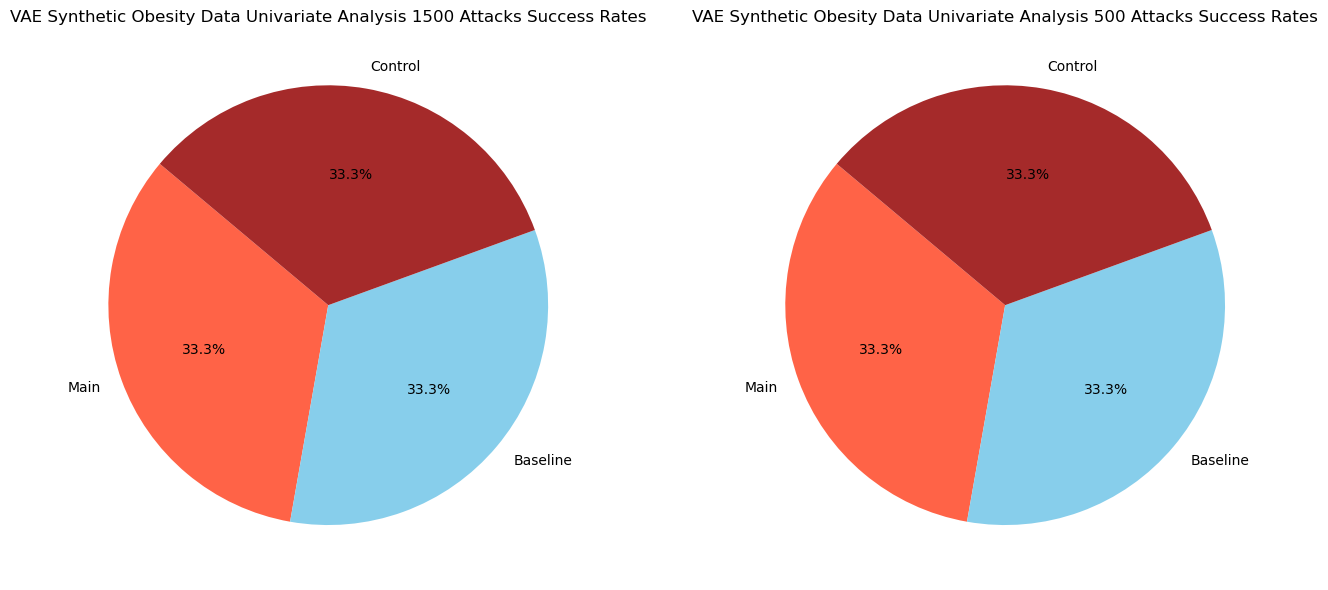

In [132]:
import matplotlib.pyplot as plt

# Data for plotting
attacks_1500 = ['Main', 'Baseline', 'Control']
success_rates_1500 = [0.001277,  0.001277, 0.001277]  # Success rates for 1500 attacks
attacks_500 = ['Main', 'Baseline', 'Control']
success_rates_500 = [0.003812, 0.003812, 0.003812]  # Success rates for 500 attacks
colors = ['tomato', 'skyblue', 'brown']

# Plot for 1500 Attacks
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(success_rates_1500, labels=attacks_1500, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('VAE Synthetic Obesity Data Univariate Analysis 1500 Attacks Success Rates')

# Plot for 500 Attacks
plt.subplot(1, 2, 2)
plt.pie(success_rates_500, labels=attacks_500, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('VAE Synthetic Obesity Data Univariate Analysis 500 Attacks Success Rates')

plt.tight_layout()
plt.show()


Univariate Risk Assessment Success vs. Failure Rates on 80% VAE Synthetic Obesity Data


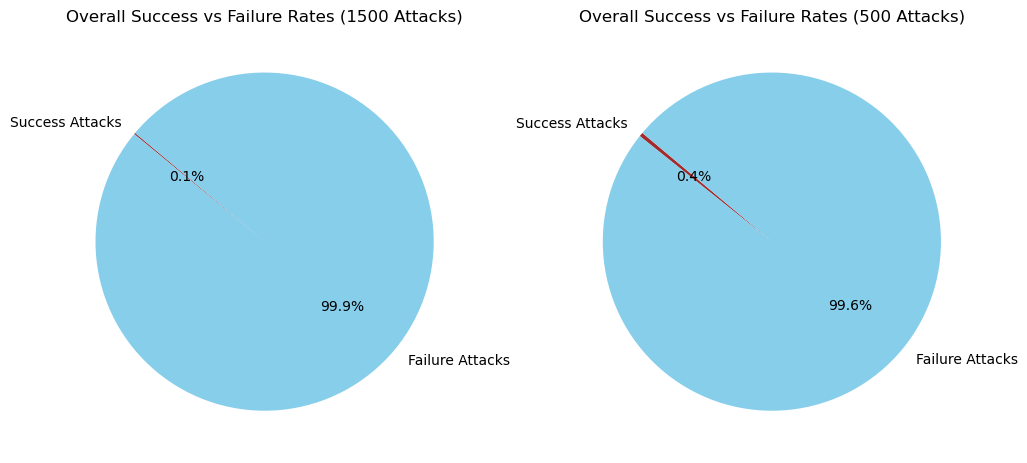

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation
attacks = ['1500 Attacks', '500 Attacks']
success_rates = np.array([0.0013, 0.0038])
failure_rates = 1 - success_rates
attack_categories = ['Main Attack', 'Baseline Attack', 'Control Attack']
success_rates_categories = np.array([success_rates, success_rates, success_rates])

print('Univariate Risk Assessment Success vs. Failure Rates on 80% VAE Synthetic Obesity Data')

# Pie Chart for n_attacks=1500
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie([success_rates[0], failure_rates[0]], labels=['Success Attacks', 'Failure Attacks'], autopct='%1.1f%%', startangle=140, colors=['brown', 'skyblue'])
plt.title('Overall Success vs Failure Rates (1500 Attacks)')

# Pie Chart for n_attacks=500
plt.subplot(1, 2, 2)
plt.pie([success_rates[1], failure_rates[1]], labels=['Success Attacks', 'Failure Attacks'], autopct='%1.1f%%', startangle=140, colors=['brown', 'skyblue'])
plt.title('Overall Success vs Failure Rates (500 Attacks)')

plt.show()




# STEP 3B: SINGLING OUT MULTIVARIATE RISK ASSESSMENT ON 80% VAE SYNTHETIC OBESITY DISEASE DATA

In [18]:
testD = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                 syn=vae_synthetic_obesity_data_with_labels_df, 
                                 control=control_dataframe,
                                 n_attacks=1500, # this attack takes longer
                                 n_cols=4)


try:
    testC.evaluate(mode='multivariate')
    risk = testD.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

PrivacyRisk(value=0.04015886980895638, ci=(0.024276008250932835, 0.05604173136697993))


In [19]:
checkA = testD.results()

print("The Singling Out Risk Type in Multivariate Analysis When n_columns=4 and n_attacks=1500 on 80% VAE Synthetic Obesity Data:")
print("Successs rate of main attack:", checkA.attack_rate)
print("Successs rate of baseline attack:", checkA.baseline_rate)
print("Successs rate of control attack:", checkA.control_rate)

The Singling Out Risk Type in Multivariate Analysis When n_columns=4 and n_attacks=1500 on 80% VAE Synthetic Obesity Data:
Successs rate of main attack: SuccessRate(value=0.07043344149682483, error=0.012885573416541557)
Successs rate of baseline attack: SuccessRate(value=0.01125167105288893, error=0.005182233548812405)
Successs rate of control attack: SuccessRate(value=0.0315412319139134, error=0.008751742142230538)


In [20]:
testH = SinglingOutEvaluator(ori=obesity_train_dataframe, 
                                 syn=vae_synthetic_obesity_data_with_labels_df, 
                                 control=control_dataframe,
                                 n_attacks=500, # this attack takes longer
                                 n_cols=4)


try:
    testH.evaluate(mode='multivariate')
    risk = testH.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

PrivacyRisk(value=0.036076861996735966, ci=(0.00916446998963514, 0.06298925400383679))


In [22]:
checkK = testH.results()

print("The Singling Out Risk Type in Multivariate Analysis When n_columns=4 and n_attacks=500 on 80% VAE Synthetic Obesity Data:")
print("Successs rate of main attack:", checkK.attack_rate)
print("Successs rate of baseline attack:", checkK.baseline_rate)
print("Successs rate of control attack:", checkK.control_rate)

The Singling Out Risk Type in Multivariate Analysis When n_columns=4 and n_attacks=500 on 80% VAE Synthetic Obesity Data:
Successs rate of main attack: SuccessRate(value=0.06732421244123678, error=0.021628196396447367)
Successs rate of baseline attack: SuccessRate(value=0.015720678145237494, error=0.010209682971209794)
Successs rate of control attack: SuccessRate(value=0.032416848618478745, error=0.01504453632484502)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

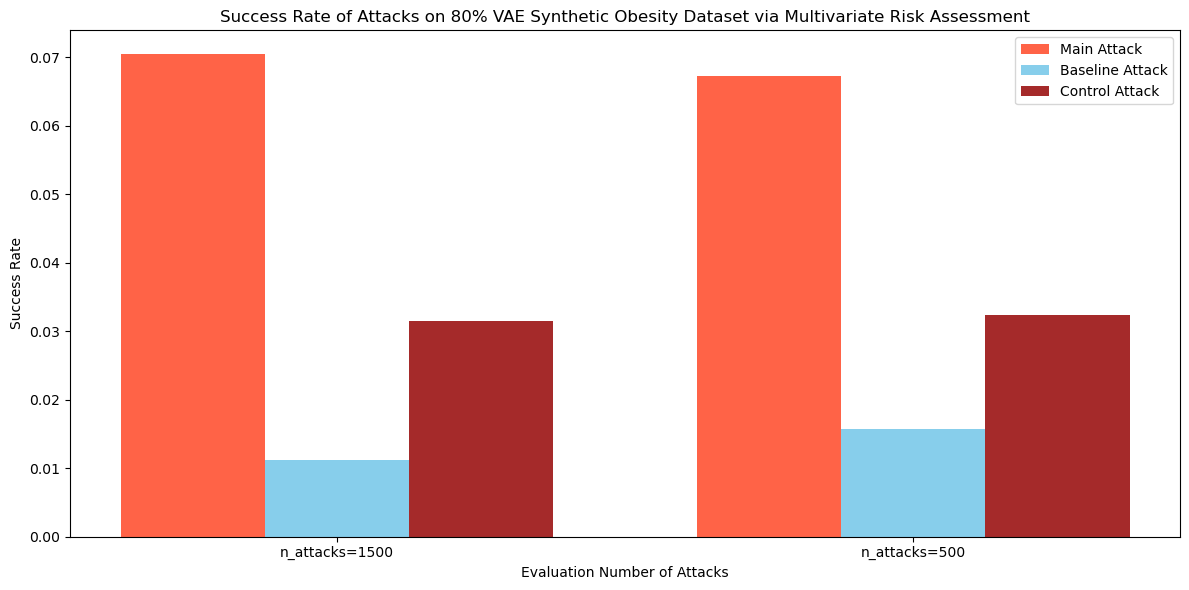

In [29]:
# Re-importing pandas for DataFrame manipulation due to execution environment reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Singling out risk data with correct result values
data_singling_out_corrected = [
    ('n_attacks=1500', 0.07043344149682483),
    ('n_attacks=500', 0.06732421244123678)
]

# Convert to DataFrame
df_singling_out_corrected = pd.DataFrame(data_singling_out_corrected, columns=['Evaluation', 'SuccessRateMainAttack'])

# Add baseline and control attack success rates with corrected values
df_singling_out_corrected['SuccessRateBaselineAttack'] = [0.01125167105288893, 0.015720678145237494]
df_singling_out_corrected['SuccessRateControlAttack'] = [0.0315412319139134, 0.032416848618478745]

# Plotting with corrected data
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(df_singling_out_corrected))
bar_width = 0.25

bars1 = plt.bar(index, df_singling_out_corrected['SuccessRateMainAttack'], bar_width, label='Main Attack', color='tomato')
bars2 = plt.bar(index + bar_width, df_singling_out_corrected['SuccessRateBaselineAttack'], bar_width, label='Baseline Attack', color='skyblue')
bars3 = plt.bar(index + 2 * bar_width, df_singling_out_corrected['SuccessRateControlAttack'], bar_width, label='Control Attack', color='brown')

plt.xlabel('Evaluation Number of Attacks')
plt.ylabel('Success Rate')
plt.title('Success Rate of Attacks on 80% VAE Synthetic Obesity Dataset via Multivariate Risk Assessment')
plt.xticks(index + bar_width, df_singling_out_corrected['Evaluation'])
plt.legend()

plt.tight_layout()
plt.show()


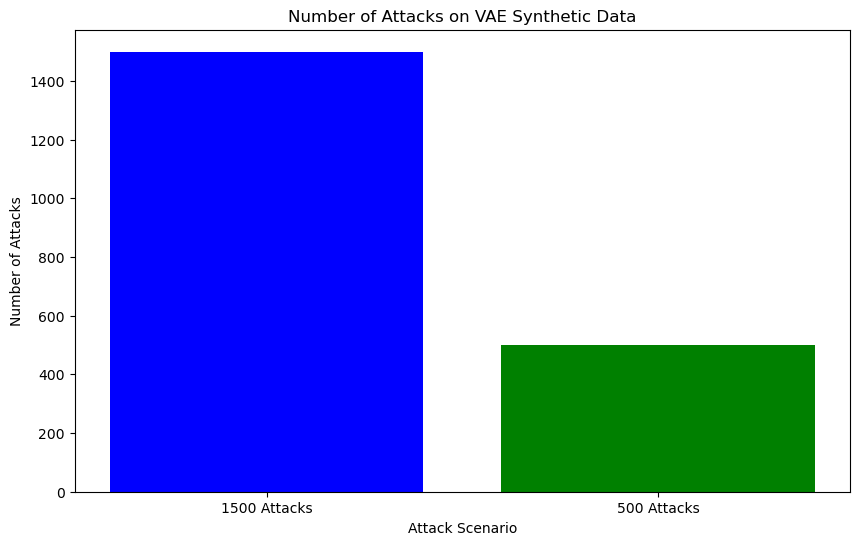

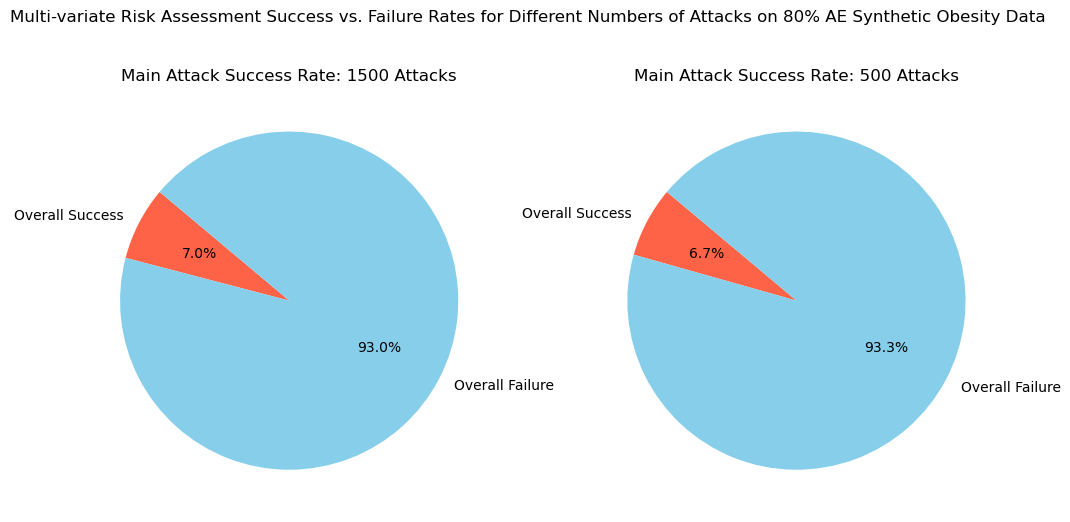

In [32]:
# Preparing data for the visualizations
attack_counts = [1500, 500]
privacy_risks = [4.02, 3.61]
main_attack_success_rates = [7.04, 6.73]
baseline_attack_success_rates = [1.13, 1.57]
control_attack_success_rates = [3.15, 3.24]

# Vertical Bar Chart for Number of Attacks
plt.figure(figsize=(10, 6))
plt.bar(['1500 Attacks', '500 Attacks'], attack_counts, color=['blue', 'green'])
plt.title('Number of Attacks on VAE Synthetic Data')
plt.ylabel('Number of Attacks')
plt.xlabel('Attack Scenario')
plt.show()

# Pie Charts for Success vs. Failure Rates
success_failure_rates = [main_attack_success_rates, baseline_attack_success_rates, control_attack_success_rates]
titles = ['Main Attack Success Rate', 'Baseline Attack Success Rate', 'Control Attack Success Rate']
colors = ['tomato', 'skyblue']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    success_rate = success_failure_rates[0][i]
    failure_rate = 100 - success_rate
    sizes = [success_rate, failure_rate]
    ax.pie(sizes, labels=['Overall Success', 'Overall Failure'], colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{titles[0]}: {attack_counts[i]} Attacks')

plt.suptitle('Multi-variate Risk Assessment Success vs. Failure Rates for Different Numbers of Attacks on 80% AE Synthetic Obesity Data')
plt.show()


# STEP 4: LINKABILITY RISK ASSESSMENT ON 80% VAE SYNTHETIC OBESITY DATA 

In [51]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(obesity_train_dataframe), len(vae_synthetic_obesity_data_with_labels_df), len(control_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

aux_cols = [
    ['Gender', 'FAF'],  # Attributes in dataset A
    ['Age', 'FCVC']     # Attributes in dataset B
]

linkability_evaluatorV = LinkabilityEvaluator(ori=obesity_train_dataframe, 
                                             syn=vae_synthetic_obesity_data_with_labels_df, 
                                             control=control_dataframe,
                                             n_attacks=n_attacks,
                                             aux_cols=aux_cols,
                                             n_neighbors=10)

linkability_evaluatorV.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_evaluatorV.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10:", linkability_risk1)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10: PrivacyRisk(value=0.0, ci=(0.0, 0.008057070260497932))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.060726831648365585, baseline = 0.06306962187957431. Analysis results cannot be trusted.
  self._sanity_check()


In [52]:
linkability = linkability_evaluatorV.results()

print("Linkability When n_neighbors=10:")
print("Successs rate of main attack:", linkability.attack_rate)
print("Successs rate of baseline attack:", linkability.baseline_rate)
print("Successs rate of control attack:", linkability.control_rate)

Linkability When n_neighbors=10:
Successs rate of main attack: SuccessRate(value=0.060726831648365585, error=0.022306179402846193)
Successs rate of baseline attack: SuccessRate(value=0.06306962187957431, error=0.022720204961132334)
Successs rate of control attack: SuccessRate(value=0.08884031442287019, error=0.02673370477760686)


In [53]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(obesity_train_dataframe), len(vae_synthetic_obesity_data_with_labels_df), len(control_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

aux_cols = [
    ['Gender', 'FAF'],  # Attributes in dataset A
    ['Age', 'FCVC']     # Attributes in dataset B
]

linkability_evaluatorV = LinkabilityEvaluator(ori=obesity_train_dataframe, 
                                             syn=vae_synthetic_obesity_data_with_labels_df, 
                                             control=control_dataframe,
                                             n_attacks=n_attacks,
                                             aux_cols=aux_cols,
                                             n_neighbors=5)

linkability_evaluatorV.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk2 = linkability_evaluatorV.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5:", linkability_risk2)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5: PrivacyRisk(value=0.0, ci=(0.0, 0.007933536250474712))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.013871027024191246, baseline = 0.013871027024191246. Analysis results cannot be trusted.
  self._sanity_check()


In [54]:
linkability1 = linkability_evaluatorV.results()

print("Linkability When n_neighbors=5:")
print("Successs rate of main attack:", linkability1.attack_rate)
print("Successs rate of baseline attack:", linkability1.baseline_rate)
print("Successs rate of control attack:", linkability1.control_rate)

Linkability When n_neighbors=5:
Successs rate of main attack: SuccessRate(value=0.013871027024191246, error=0.010187699040882316)
Successs rate of baseline attack: SuccessRate(value=0.013871027024191246, error=0.010187699040882316)
Successs rate of control attack: SuccessRate(value=0.023242187949026112, error=0.013628447630777956)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

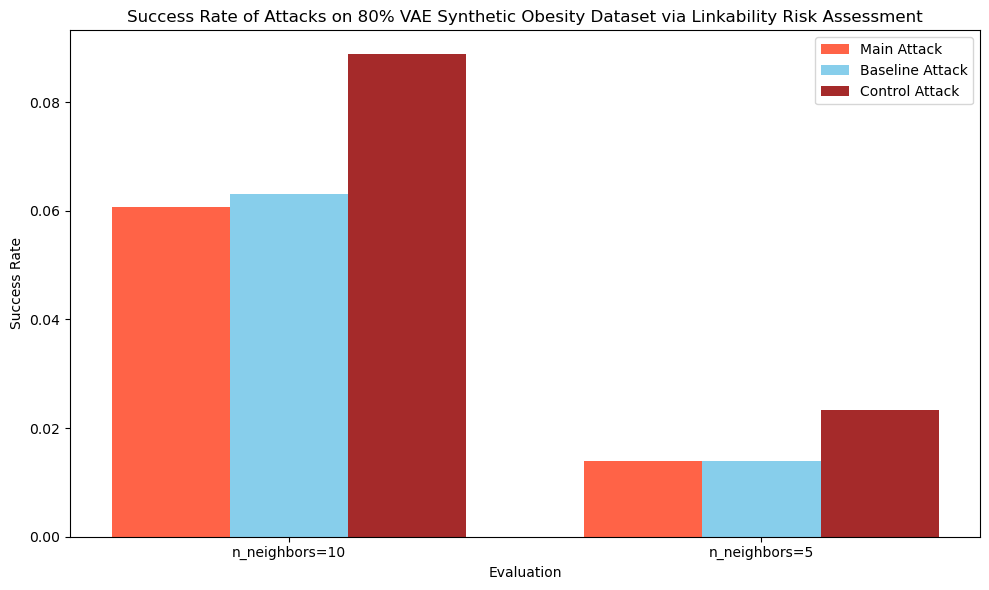

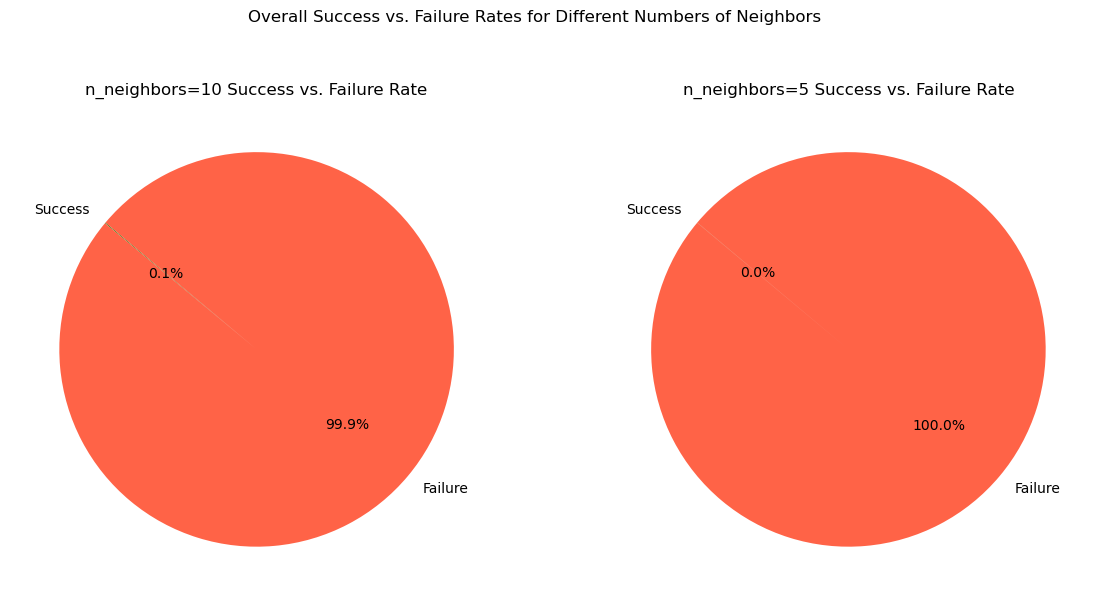

In [61]:
# Re-importing matplotlib and numpy due to execution environment reset
import matplotlib.pyplot as plt
import numpy as np

# Data preparation for visualizations
n_neighbors = ['n_neighbors=10', 'n_neighbors=5']
main_attack_success_rates = [0.060726831648365585, 0.013871027024191246]
baseline_attack_success_rates = [0.06306962187957431, 0.013871027024191246]
control_attack_success_rates = [0.08884031442287019, 0.023242187949026112]

# Vertical Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(n_neighbors))
bar_width = 0.25

# Plotting
bars1 = ax.bar(index, main_attack_success_rates, bar_width, label='Main Attack', color='tomato')
bars2 = ax.bar(index + bar_width, baseline_attack_success_rates, bar_width, label='Baseline Attack', color='skyblue')
bars3 = ax.bar(index + 2 * bar_width, control_attack_success_rates, bar_width, label='Control Attack', color='brown')

ax.set_xlabel('Evaluation')
ax.set_ylabel('Success Rate')
ax.set_title('Success Rate of Attacks on 80% VAE Synthetic Obesity Dataset via Linkability Risk Assessment')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(n_neighbors)
ax.legend()

plt.tight_layout()
plt.show()

# Pie Charts for Success vs. Failure Rates for n_neighbors=10 and n_neighbors=5
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Success vs. Failure rates calculation and plotting for each n_neighbors setting
for i, ax in enumerate(axes.flat):
    success_rate = main_attack_success_rates[i]
    failure_rate = 100 - success_rate  # Assuming the failure rate complements the success rate to 100%
    sizes = [success_rate, failure_rate]
    ax.pie(sizes, labels=['Success', 'Failure'], colors=['#008000', 'tomato'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{n_neighbors[i]} Success vs. Failure Rate')

plt.suptitle('Overall Success vs. Failure Rates for Different Numbers of Neighbors')
plt.show()


Linkability Risk Assessment


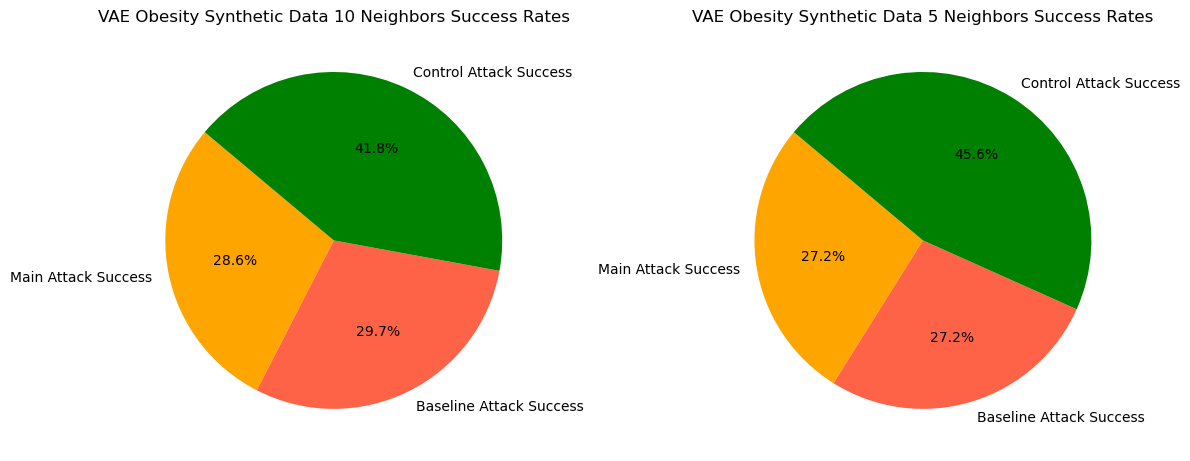

In [111]:
import matplotlib.pyplot as plt

# Data for Pie Charts
success_rates_10_neighbors = [0.060726831648365585, 0.06306962187957431, 0.08884031442287019]  # Main, Baseline, Control for 10 Neighbors
success_rates_5_neighbors = [0.013871027024191246, 0.013871027024191246, 0.023242187949026112]  # Main, Baseline, Control for 5 Neighbors
labels = ['Main Attack Success', 'Baseline Attack Success', 'Control Attack Success']
colors = ['orange', 'tomato', '#008000']  # Using hex codes for 'medium blue' and a valid name for green
# #0000CD
print('Linkability Risk Assessment')

plt.figure(figsize=(12, 6))

# Plot for 10 Neighbors
plt.subplot(1, 2, 1)
plt.pie(success_rates_10_neighbors, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('VAE Obesity Synthetic Data 10 Neighbors Success Rates')

# Plot for 5 Neighbors
plt.subplot(1, 2, 2)
plt.pie(success_rates_5_neighbors, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('VAE Obesity Synthetic Data 5 Neighbors Success Rates')

plt.tight_layout()
plt.show()


# STEP 5: INFERENCE RISK ASSESSMENT IN VAE OBESITY SYNTHETIC DATA
Iterate over each column in your dataset to assess inference risk. For a more detailed example, you might select fewer columns to speed up the process.

C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.004499866099356377, baseline = 0.004499866099356377. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.004499866099356377, baseline = 0.004499866099356377. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.03964171956748713, baseline = 0.05369846095473944. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0279277684

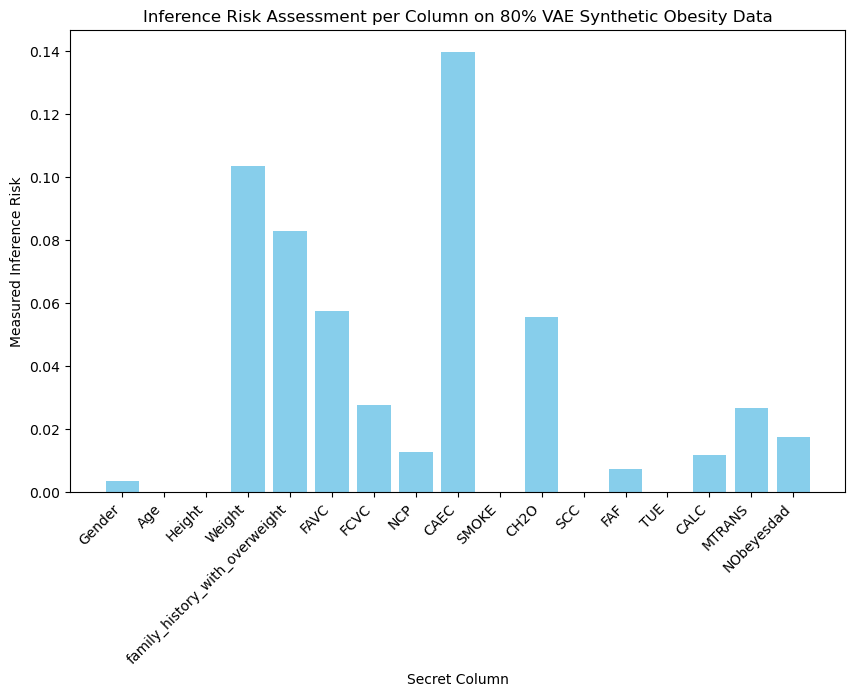

In [30]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(obesity_train_dataframe), len(vae_synthetic_obesity_data_with_labels_df_new1), len(control_dataframe))
n_attacks_attempted = min_dataset_size  # Or some fraction of the smallest size, if desired


columns = obesity_train_dataframe.columns
inference_result = []

for secret in columns:
    aux_cols = [col for col in columns if col != secret]
    
    evaluator_infere = InferenceEvaluator(ori=obesity_train_dataframe, 
                                   syn=vae_synthetic_obesity_data_with_labels_df_new1, 
                                   control=control_dataframe,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks_attempted) # Use the dynamically set value
    evaluator_infere.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
    inference_result.append((secret,  evaluator_infere.risk()))

# Plotting the inference risks
import matplotlib.pyplot as plt

risks = [res[1].value for res in inference_result]
columns = [res[0] for res in inference_result]

plt.figure(figsize=(10, 6))
plt.bar(columns, risks, color='skyblue')
plt.xlabel('Secret Column')
plt.ylabel('Measured Inference Risk')
plt.xticks(rotation=45, ha='right')
plt.title('Inference Risk Assessment per Column on 80% VAE Synthetic Obesity Data')
plt.show()

In [32]:
print('Inference Risk Assessment on 80% VAE Synthetic Obesity Data when n_attempted_attacks = smallest dataset size used:', inference_result)

Inference Risk Assessment on 80% VAE Synthetic Obesity Data when n_attempted_attacks = smallest dataset size used: [('Gender', PrivacyRisk(value=0.003334214350458613, ci=(0.0, 0.0904863156943513))), ('Age', PrivacyRisk(value=0.0, ci=(0.0, 0.04226698439723465))), ('Height', PrivacyRisk(value=0.0, ci=(0.0, 0.12749979222551205))), ('Weight', PrivacyRisk(value=0.10325220923712647, ci=(0.022021904150929486, 0.18448251432332347))), ('family_history_with_overweight', PrivacyRisk(value=0.0829092390290911, ci=(0.0, 0.2318522397901564))), ('FAVC', PrivacyRisk(value=0.05735379916865573, ci=(0.0, 0.22709262756442275))), ('FCVC', PrivacyRisk(value=0.02761407663845964, ci=(0.0, 0.10223961538751924))), ('NCP', PrivacyRisk(value=0.012581752713699627, ci=(0.0, 0.09097700490035787))), ('CAEC', PrivacyRisk(value=0.13968951923674888, ci=(0.01976942627598134, 0.25960961219751644))), ('SMOKE', PrivacyRisk(value=0.0, ci=(0.0, 0.006392537228134462))), ('CH2O', PrivacyRisk(value=0.055567208585687713, ci=(0.004

In [31]:
Infer = evaluator_infere.results()

print("Inference Risk When n_attacks_attempted = min_dataset_size for VAE Synthetic Obesity Data:")
print("Successs rate of main attack:", Infer.attack_rate)
print("Successs rate of baseline attack:", Infer.baseline_rate)
print("Successs rate of control attack:", Infer.control_rate)

Inference Risk When n_attacks_attempted = min_dataset_size for VAE Synthetic Obesity Data:
Successs rate of main attack: SuccessRate(value=0.5995685848263704, error=0.046474727608622986)
Successs rate of baseline attack: SuccessRate(value=0.1310105385846271, error=0.03183492743973389)
Successs rate of control attack: SuccessRate(value=0.5925402141327443, error=0.04660646098114324)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

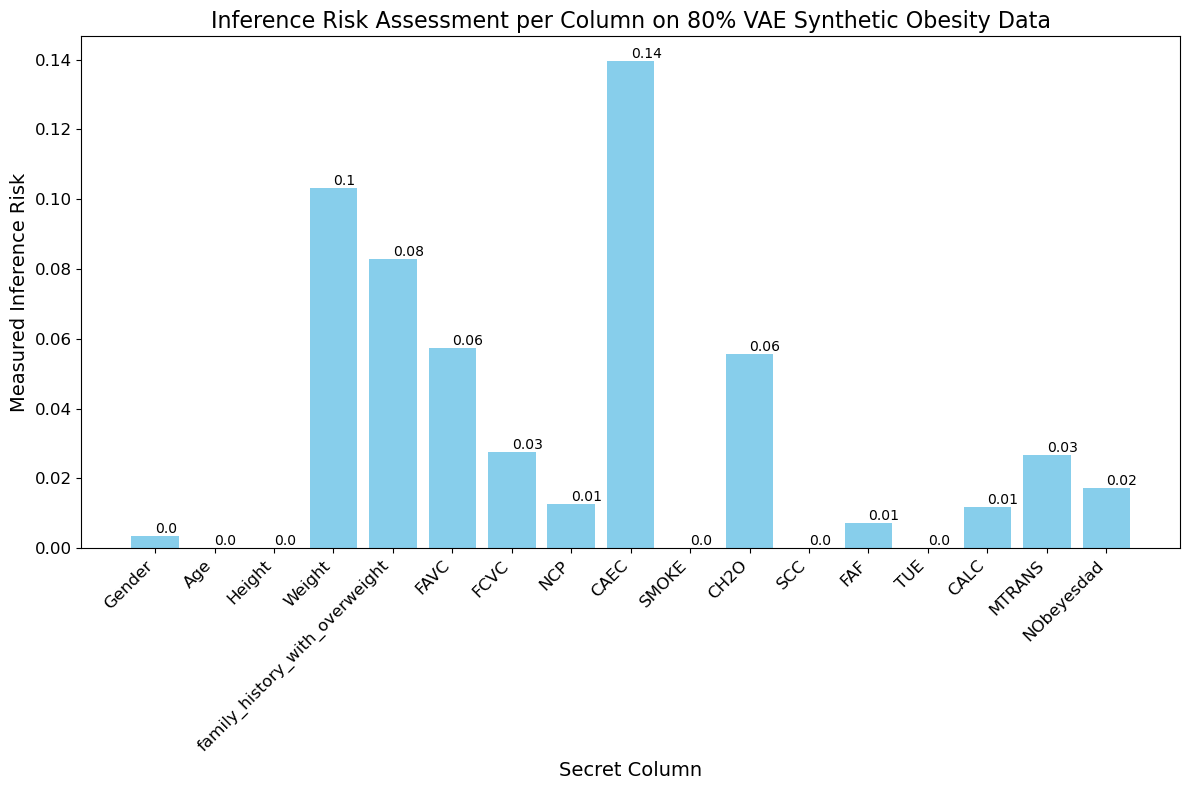

In [39]:
import matplotlib.pyplot as plt

# Extracting risk values and columns for plotting
risks = [res[1].value for res in inference_result]
columns = [res[0] for res in inference_result]

plt.figure(figsize=(12, 8))
bars = plt.bar(columns, risks, color='skyblue')

plt.xlabel('Secret Column', fontsize=14)
plt.ylabel('Measured Inference Risk', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Inference Risk Assessment per Column on 80% VAE Synthetic Obesity Data', fontsize=16)

# Adding the risk value above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom') # va: vertical alignment

plt.tight_layout()
plt.show()


Inference Risk Assessment Success Rates for Types of Attacks and Overall Success vs. Failure Rates on 80% VAE Synthetic Obesity


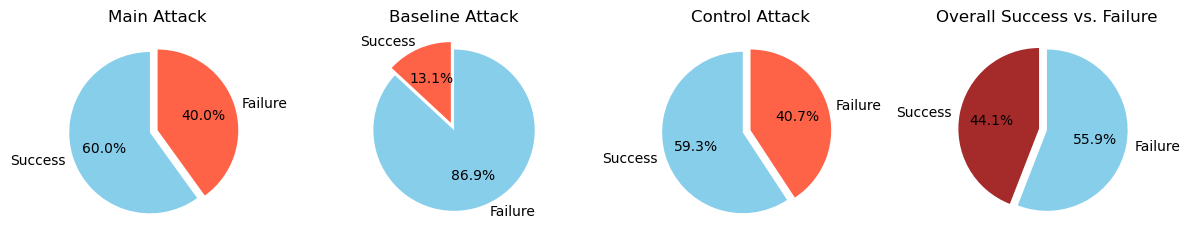

In [38]:
import matplotlib.pyplot as plt

print('Inference Risk Assessment Success Rates for Types of Attacks and Overall Success vs. Failure Rates on 80% VAE Synthetic Obesity')
# Success rates for each attack type
success_rates = [0.5995685848263704, 0.1310105385846271, 0.5925402141327443]
attack_labels = ['Main Attack', 'Baseline Attack', 'Control Attack']

# Colors for success and failure in each pie chart
colors_main = ['skyblue', 'tomato']  # Colors for Main Attack pie chart
colors_baseline = ['tomato', 'skyblue']  # Colors for Baseline Attack pie chart
colors_control = ['skyblue', 'tomato']  # Colors for Control Attack pie chart
colors_overall = ['brown', 'skyblue']  # Colors for Overall Success vs. Failure pie chart

# Explode settings for each pie chart (to highlight the success slice)
explode_main = (0.1, 0)  # Explode the success slice for Main Attack
explode_baseline = (0.1, 0)  # Explode the success slice for Baseline Attack
explode_control = (0.1, 0)  # Explode the success slice for Control Attack
explode_overall = (0.1, 0)  # Explode the success slice for Overall Success vs. Failure

# Calculate overall success and failure rates
overall_success = sum(success_rates) / len(success_rates)
overall_failure = 1 - overall_success

# Individual Pie Charts with Custom Colors and Explode Settings
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
pie_colors = [colors_main, colors_baseline, colors_control, colors_overall]
pie_explode = [explode_main, explode_baseline, explode_control, explode_overall]

for i, (rate, color, expl) in enumerate(zip(success_rates + [overall_success], pie_colors, pie_explode)):
    axs[i].pie([rate, 1-rate], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=color, explode=expl)
    if i < len(attack_labels):  # For individual attacks
        axs[i].set_title(attack_labels[i])
    else:  # For overall success vs. failure
        axs[i].set_title('Overall Success vs. Failure')

plt.tight_layout()
plt.show()
